# Ford GoBike System Data
## Jerry Yip

## Preliminary Wrangling

> I'll be exploring the "Lyft Bay Wheel's" dataset (formerly known as the Ford GoBike System Dataset) on public bike sharing in the California Bay Area.  Note that starting in the summer of 2019 the bike sharing program was transitioned from Ford's to Lyft's external branding and operation.  Like it's predecessor Ford, Lyft provides this dataset free for the public dating back to 2017 with updates each month.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [222]:
go_bike17 = pd.read_csv('../lyft_bike_data/2017-fordgobike-tripdata.csv')

In [223]:
#Let's look at some sample data first
go_bike17.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [224]:
go_bike17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


Reviewing the 2017 data, it's not clear how useful it is for in-depth analysis given it doesn't even have timestamps for when rides took place.  This is important given bike rides in the middle of cold and rainy winter days is going to vastly differ from those during relatively sunny warm summer days.  Furthermore, I'd prefer to use more recent data if possible to capture the latest information and avoid any outdated details.  

Lastly, as I'm interested on recent bike rental trends, including how the recent transition from Ford to Lyft may have affected bike rentals, we'll focus on the data from January 2018 to present day (August 2019).

In [225]:
go_bike1801 = pd.read_csv('../lyft_bike_data/201801-fordgobike-tripdata.csv')

In [226]:
go_bike1801.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [227]:
go_bike1801.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


The 2018 data looks much more promising given there are also time stamps included detailing when the bike trips actually occurred.  Given the data is split by month, we'll need to combine the monthly data to get a full year of data.  Let's inspect the other months to make sure there aren't any glaring issues prior to combining

In [228]:
go_bike1802 = pd.read_csv('../lyft_bike_data/201802-fordgobike-tripdata.csv')

In [229]:
go_bike1803 = pd.read_csv('../lyft_bike_data/201803-fordgobike-tripdata.csv')

In [230]:
go_bike1804 = pd.read_csv('../lyft_bike_data/201804-fordgobike-tripdata.csv')

In [231]:
go_bike1805 = pd.read_csv('../lyft_bike_data/201805-fordgobike-tripdata.csv')

In [232]:
go_bike1806 = pd.read_csv('../lyft_bike_data/201806-fordgobike-tripdata.csv')

In [233]:
go_bike1807 = pd.read_csv('../lyft_bike_data/201807-fordgobike-tripdata.csv')

In [234]:
go_bike1808 = pd.read_csv('../lyft_bike_data/201808-fordgobike-tripdata.csv')

In [235]:
go_bike1809 = pd.read_csv('../lyft_bike_data/201809-fordgobike-tripdata.csv')

In [236]:
go_bike1810 = pd.read_csv('../lyft_bike_data/201810-fordgobike-tripdata.csv')

In [237]:
go_bike1811 = pd.read_csv('../lyft_bike_data/201811-fordgobike-tripdata.csv')

In [238]:
go_bike1812 = pd.read_csv('../lyft_bike_data/201812-fordgobike-tripdata.csv')

In [239]:
go_bike1901 = pd.read_csv('../lyft_bike_data/201901-fordgobike-tripdata.csv')

In [240]:
go_bike1902 = pd.read_csv('../lyft_bike_data/201902-fordgobike-tripdata.csv')

In [241]:
go_bike1903 = pd.read_csv('../lyft_bike_data/201903-fordgobike-tripdata.csv')

In [242]:
go_bike1904 = pd.read_csv('../lyft_bike_data/201904-fordgobike-tripdata.csv')

In [243]:
#Starting in May 2019, the data files are now rebranded as Lyft's bay wheels data
go_bike1905 = pd.read_csv('../lyft_bike_data/201905-baywheels-tripdata.csv')

In [244]:
go_bike1906 = pd.read_csv('../lyft_bike_data/201906-baywheels-tripdata.csv', 
                          dtype={"duration_sec":int, "start_time":str, "end_time":str,
                                 "member_birth_year":float,"member_gender":str,
                                "bike_share_for_all_trip":str,"rental_access_method":str})

In [245]:
go_bike1906.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191772 entries, 0 to 191771
Data columns (total 17 columns):
duration_sec               191772 non-null int64
start_time                 191772 non-null object
end_time                   191772 non-null object
start_station_id           189612 non-null float64
start_station_name         189612 non-null object
start_station_latitude     191772 non-null float64
start_station_longitude    191772 non-null float64
end_station_id             189510 non-null float64
end_station_name           189510 non-null object
end_station_latitude       191772 non-null float64
end_station_longitude      191772 non-null float64
bike_id                    191772 non-null int64
user_type                  191772 non-null object
member_birth_year          172635 non-null float64
member_gender              172853 non-null object
bike_share_for_all_trip    187879 non-null object
rental_access_method       3893 non-null object
dtypes: float64(7), int64(2), object

In [246]:
go_bike1906.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
0,81695,2019-06-30 18:16:09.7730,2019-07-01 16:57:45.5920,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,-122.427317,1502,Subscriber,1957.0,Male,No,NaN
1,74260,2019-06-30 18:09:55.8300,2019-07-01 14:47:36.6810,50.0,2nd St at Townsend St,37.780526,-122.390288,101.0,15th St at Potrero Ave,37.767079,-122.407359,2526,Customer,NaN,NaN,No,NaN
2,59603,2019-06-30 15:40:31.0380,2019-07-01 08:13:54.3490,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2427,Subscriber,1985.0,Male,No,NaN
3,67932,2019-06-30 12:49:47.7810,2019-07-01 07:42:00.5430,169.0,Bushrod Park,37.846516,-122.265304,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,1261,Customer,NaN,NaN,No,NaN
4,48894,2019-06-30 17:21:00.0550,2019-07-01 06:55:54.9960,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1070,Customer,NaN,NaN,No,NaN


In [247]:
go_bike1906.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [248]:
go_bike1907 = pd.read_csv('../lyft_bike_data/201907-baywheels-tripdata.csv', 
                          dtype={"duration_sec":int, "start_time":str, "end_time":str,
                                 "member_birth_year":float,"member_gender":str,
                                "bike_share_for_all_trip":str,"rental_access_method":str})

In [249]:
go_bike1907.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199872 entries, 0 to 199871
Data columns (total 17 columns):
duration_sec               199872 non-null int64
start_time                 199872 non-null object
end_time                   199872 non-null object
start_station_id           180833 non-null float64
start_station_name         180837 non-null object
start_station_latitude     199872 non-null float64
start_station_longitude    199872 non-null float64
end_station_id             180207 non-null float64
end_station_name           180210 non-null object
end_station_latitude       199872 non-null float64
end_station_longitude      199872 non-null float64
bike_id                    199872 non-null int64
user_type                  199872 non-null object
member_birth_year          166419 non-null float64
member_gender              168796 non-null object
bike_share_for_all_trip    170248 non-null object
rental_access_method       29624 non-null object
dtypes: float64(7), int64(2), objec

When reviewing manually, the last 'Unnamed' column for July 2019 data corresponds to 'rental_access_method'.  I've updated the file and reloaded below

In [251]:
go_bike1907 = pd.read_csv('../lyft_bike_data/201907-baywheels-tripdata.csv', 
                          dtype={"duration_sec":int, "start_time":str, "end_time":str,
                                 "member_birth_year":float,"member_gender":str,
                                "bike_share_for_all_trip":str,"rental_access_method":str})

In [252]:
go_bike1907.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199872 entries, 0 to 199871
Data columns (total 17 columns):
duration_sec               199872 non-null int64
start_time                 199872 non-null object
end_time                   199872 non-null object
start_station_id           180833 non-null float64
start_station_name         180837 non-null object
start_station_latitude     199872 non-null float64
start_station_longitude    199872 non-null float64
end_station_id             180207 non-null float64
end_station_name           180210 non-null object
end_station_latitude       199872 non-null float64
end_station_longitude      199872 non-null float64
bike_id                    199872 non-null int64
user_type                  199872 non-null object
member_birth_year          166419 non-null float64
member_gender              168796 non-null object
bike_share_for_all_trip    170248 non-null object
rental_access_method       29624 non-null object
dtypes: float64(7), int64(2), objec

In [253]:
go_bike1907.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [254]:
go_bike1908 = pd.read_csv('../lyft_bike_data/201908-baywheels-tripdata.csv')

In [255]:
go_bike1908.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210563 entries, 0 to 210562
Data columns (total 16 columns):
duration_sec               210563 non-null int64
start_time                 210563 non-null object
end_time                   210563 non-null object
start_station_id           210563 non-null int64
start_station_name         210563 non-null object
start_station_latitude     210563 non-null float64
start_station_longitude    210563 non-null float64
end_station_id             210563 non-null int64
end_station_name           210563 non-null object
end_station_latitude       210563 non-null float64
end_station_longitude      210563 non-null float64
bike_id                    210563 non-null int64
user_type                  210563 non-null object
member_birth_year          170774 non-null float64
member_gender              170777 non-null object
bike_share_for_all_trip    210563 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 25.7+ MB


In [256]:
print(go_bike1801.shape, go_bike1802.shape, go_bike1803.shape, go_bike1804.shape,
      go_bike1805.shape, go_bike1806.shape, go_bike1807.shape, go_bike1808.shape,
      go_bike1809.shape, go_bike1810.shape, go_bike1811.shape, go_bike1812.shape, 
      go_bike1901.shape, go_bike1902.shape, go_bike1903.shape, go_bike1904.shape,
       go_bike1905.shape, go_bike1906.shape, go_bike1907.shape, go_bike1908.shape
     )
# the June and July 2019 data have 1 extra column, "rental_access_method", which we'll drop for consistency

(94802, 16) (106718, 16) (111382, 16) (131169, 16) (179125, 16) (195968, 16) (199222, 16) (192162, 16) (186217, 16) (201458, 16) (134135, 16) (131363, 16) (192082, 16) (183412, 16) (256299, 16) (239111, 16) (182163, 16) (191772, 17) (199872, 17) (210563, 16)


In [257]:
go_bike1906.drop(['rental_access_method'], axis=1, inplace=True)
go_bike1907.drop(['rental_access_method'], axis=1, inplace=True)

In [258]:
#now we'll concatenate the different data frames into a single dataframe for subsequent data cleaning
bike_df = pd.concat([go_bike1801, go_bike1802, go_bike1803, go_bike1804, go_bike1805, go_bike1806,
                    go_bike1807, go_bike1808, go_bike1809, go_bike1810, go_bike1811, go_bike1812,
                    go_bike1901, go_bike1902, go_bike1903, go_bike1904, go_bike1905, go_bike1906,
                    go_bike1907, go_bike1908], ignore_index=True)
bike_df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3518990,728,2019-08-01 00:07:37.0390,2019-08-01 00:19:45.7760,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2500,Subscriber,1983.0,Male,No
3518991,761,2019-08-01 00:06:23.8300,2019-08-01 00:19:05.5500,151.0,53rd St at Hollis St,37.836182,-122.287180,159.0,24th St at Market St,37.816060,-122.278244,613,Subscriber,1982.0,Female,No
3518992,331,2019-08-01 00:08:28.7570,2019-08-01 00:14:00.1350,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,2904,Subscriber,1994.0,Male,No
3518993,111,2019-08-01 00:11:02.5820,2019-08-01 00:12:54.1340,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,1910,Subscriber,1993.0,Male,No
3518994,255,2019-08-01 00:04:27.9530,2019-08-01 00:08:43.3370,104.0,4th St at 16th St,37.767045,-122.390833,104.0,4th St at 16th St,37.767045,-122.390833,3703,Subscriber,1990.0,Male,No


In [259]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,3.518995e+06,3.485280e+06,3.518995e+06,3.518995e+06,3.484552e+06,3.518995e+06,3.518995e+06,3.518995e+06,3.266522e+06
mean,8.298237e+02,1.294564e+02,3.776704e+01,-1.223494e+02,1.276377e+02,3.776700e+01,-1.223483e+02,7.170071e+03,1.983872e+03
std,2.161287e+03,1.084568e+02,1.080059e-01,1.690059e-01,1.082490e+02,1.361370e-01,3.174114e-01,4.966053e+04,1.032794e+01
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.100000e+01,1.878000e+03
25%,3.500000e+02,4.100000e+01,3.777041e+01,-1.224117e+02,3.600000e+01,3.777106e+01,-1.224108e+02,1.395000e+03,1.979000e+03
50%,5.570000e+02,9.300000e+01,3.778101e+01,-1.223974e+02,9.200000e+01,3.778107e+01,-1.223971e+02,2.684000e+03,1.986000e+03
75%,8.720000e+02,2.010000e+02,3.779728e+01,-1.222872e+02,1.980000e+02,3.779728e+01,-1.222894e+02,3.897000e+03,1.991000e+03
max,8.636600e+04,4.590000e+02,4.551000e+01,0.000000e+00,4.590000e+02,4.551000e+01,0.000000e+00,9.969630e+05,2.001000e+03


In [260]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518995 entries, 0 to 3518994
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 429.6+ MB


Preliminary Data Cleaning Observations
1. start_time and end_time need to be of date time datatype
2. member_birth_year should not have decimals (datatype needs updating)
3. abbreviations need to be cleaned up for consistency
4. missing and incorrect values should be explored further
5. we should calculate the duration in minutes for readability
6. we should calculate distance traveled in a more intuitive format (e.g. miles etc.) using latitude and longitude as part of calculation 

In [300]:
#We'll start by making a copy of the merged dataframe
bike_clean = bike_df.copy()

Initial Data Cleaning Steps

In [577]:
# convert start_time and end_time to datetime
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3518976 entries, 0 to 3518994
Data columns (total 27 columns):
duration_min               float64
ride_dist_est              float64
ride_month                 object
start_day                  object
end_day                    object
start_hour                 int64
end_hour                   int64
start_station_name         object
end_station_name           object
member_gender              object
member_age                 float64
user_type                  object
bike_share_for_all_trip    object
start_station_id           float64
end_station_id             float64
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
member_birth_year          float64
ride_dist                  float64
start_srv_area

In [302]:
# update member_birth_year to be a non-decimal integer
bike_clean.member_birth_year = bike_clean.member_birth_year.astype('Int64')
bike_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
931407,1046,2018-07-15 10:05:21.766,2018-07-15 10:22:48.293,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4042,Subscriber,1994,Male,No
3371137,333,2019-08-22 17:58:03.633,2019-08-22 18:03:36.697,74.0,Laguna St at Hayes St,37.776435,-122.426244,58.0,Market St at 10th St,37.776619,-122.417385,3154,Subscriber,1992,Male,No
2382776,971,2019-03-15 11:46:38.489,2019-03-15 12:02:49.740,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,5238,Subscriber,1988,Male,No
2538639,557,2019-04-24 09:19:13.648,2019-04-24 09:28:30.859,390.0,Indiana St at Cesar Chavez St,37.750434,-122.390447,104.0,4th St at 16th St,37.767045,-122.390833,99,Subscriber,1984,Male,No
3339508,1044,2019-08-27 15:56:06.201,2019-08-27 16:13:30.856,104.0,4th St at 16th St,37.767045,-122.390833,22.0,Howard St at Beale St,37.789756,-122.394643,9597,Subscriber,1980,Female,No


In [303]:
#check for duplicate rows
bike_clean.duplicated().any()

False

Additional Data Cleaning observations and Enhancements
* member_gender should be a categorical data type
* bike_share_for_all_trip should be a categorical data type after changing to True/False
* user_type should be a categorical data type
* We should also consider enhancing the data with user age (derived from member_birth_year and start_time)
* We should consider enhancing the data to include month, day, hour of the day and whether it is a weekday or not (derived from start_time and end_time)

In [304]:
bike_clean.member_gender.unique()
#'M' can be replaced with 'Male', 'F' can be replaced with 'Female', 
#'O' can be replaced with 'Other, '?' can be replaced with NaN or otherwise grouped with Other also


array(['Male', nan, 'Female', 'Other', 'M', '?', 'F', 'O'], dtype=object)

In [47]:
bike_clean.member_gender.isna().any()#.count()

True

In [305]:
bike_clean.loc[bike_clean.member_gender == '?', 'member_gender'] = np.NaN
bike_clean.loc[bike_clean.member_gender == 'M', 'member_gender'] = 'Male'
bike_clean.loc[bike_clean.member_gender == 'F', 'member_gender'] = 'Female'
bike_clean.loc[bike_clean.member_gender == 'O', 'member_gender'] = 'Other'
bike_clean.member_gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [306]:
bike_clean.member_gender = bike_clean.member_gender.astype('category')
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518995 entries, 0 to 3518994
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          Int64
member_gender              category
bike_share_for_all_trip    object
dtypes: Int64(1), category(1), datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 409.4+ MB


In [307]:
#bike_clean.bike_share_for_all_trip.unique()
bike_clean.bike_share_for_all_trip = bike_clean.bike_share_for_all_trip.astype('category')
# given the NaN values, we can't change 'bike_share_for_all_trip' column to boolean

In [308]:
bike_clean.user_type = bike_clean.user_type.astype('category')
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518995 entries, 0 to 3518994
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          Int64
member_gender              category
bike_share_for_all_trip    category
dtypes: Int64(1), category(3), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 362.4+ MB


In [309]:
#Let's create a new column for the duration in minutes as that's a little easier to analyze
bike_clean['duration_min'] = bike_clean.duration_sec/60

In [310]:
cols = bike_clean.columns.tolist()
cols = cols[-1:] + cols[:-1]
bike_clean = bike_clean[cols]
bike_clean.sample(5)

,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3421812,4.000000,240,2019-08-15 15:32:46.808,2019-08-15 15:36:47.475,288.0,Mission St at 1st St,37.350964,-121.902016,288.0,Mission St at 1st St,37.350964,-121.902016,7192,Customer,NaN,NaN,No
832458,15.250000,915,2018-07-30 08:23:44.658,2018-07-30 08:38:59.897,121.0,Mission Playground,37.759210,-122.421339,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,3675,Customer,1976,Male,No
3044585,21.083333,1265,2019-06-10 18:07:25.275,2019-06-10 18:28:30.883,262.0,West St at University Ave,37.869967,-122.286533,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,3232,Customer,1993,Male,No
2808852,29.750000,1785,2019-05-19 16:16:58.413,2019-05-19 16:46:44.171,134.0,Valencia St at 24th St,37.752428,-122.420628,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2200,Subscriber,1986,Male,No
3511413,10.183333,611,2019-08-02 06:44:11.998,2019-08-02 06:54:23.486,213.0,32nd St at Adeline St,37.823847,-122.281193,157.0,65th St at Hollis St,37.846784,-122.291376,1439,Customer,NaN,NaN,No


In [312]:
# create a new column for (approximate) member age
bike_clean['member_age'] = bike_clean.start_time.dt.year - bike_clean.member_birth_year

In [326]:
# create new columns for day of the week of ride
bike_clean['start_day'] = bike_clean.start_time.dt.day_name()
bike_clean['end_day'] = bike_clean.end_time.dt.day_name()

In [335]:
# create new columns for hour that ride starts and ends
bike_clean['start_hour'] = bike_clean.start_time.dt.hour
bike_clean['end_hour'] = bike_clean.end_time.dt.hour
bike_clean.sample(5)

,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_day,end_day,start_hour,end_hour
1722385,5.616667,337,2018-11-02 10:52:14.323,2018-11-02 10:57:51.461,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,89.0,Division St at Potrero Ave,...,2516,Subscriber,1986,Male,No,32,Friday,Friday,10,10
817065,9.016667,541,2018-06-01 10:12:37.996,2018-06-01 10:21:39.981,58.0,Market St at 10th St,37.776619,-122.417385,21.0,Montgomery St BART Station (Market St at 2nd St),...,3909,Subscriber,1990,Male,No,28,Friday,Friday,10,10
3072520,14.516667,871,2019-06-06 08:25:22.223,2019-06-06 08:39:53.368,386.0,24th St at Bartlett St,37.752105,-122.419724,361.0,Mendell St at Fairfax Ave,...,2715,Subscriber,1992,Male,No,27,Thursday,Thursday,8,8
3005201,6.600000,396,2019-06-17 09:08:15.904,2019-06-17 09:14:52.685,195.0,Bay Pl at Vernon St,37.812314,-122.260779,7.0,Frank H Ogawa Plaza,...,2557,Subscriber,1992,Male,No,27,Monday,Monday,9,9
1396831,4.383333,263,2018-10-31 23:22:25.826,2018-10-31 23:26:49.423,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,...,4455,Subscriber,1963,Male,No,55,Wednesday,Wednesday,23,23


In [376]:
# create a new column to capture month of ride
bike_clean['ride_month'] = bike_clean.start_time.dt.month_name()

In [578]:
# We'll need a ride_year column to better differentiate between when Lyft (2019) and Ford (2018) operated the bikes
bike_clean['ride_year'] = bike_clean.start_time.dt.year
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3518976 entries, 0 to 3518994
Data columns (total 28 columns):
duration_min               float64
ride_dist_est              float64
ride_month                 object
start_day                  object
end_day                    object
start_hour                 int64
end_hour                   int64
start_station_name         object
end_station_name           object
member_gender              object
member_age                 float64
user_type                  object
bike_share_for_all_trip    object
start_station_id           float64
end_station_id             float64
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
member_birth_year          float64
ride_dist                  float64
start_srv_area

In [20]:
# Import geopy.distance package for calculating approximate bike ride distances 
#Approach assumes non-circular paths which can of course occur
import geopy.distance

In [371]:
# test-run for calculating distance
coords_1 = (go_bike1908.start_station_latitude[0], go_bike1908.start_station_longitude[0])
coords_2 = (go_bike1908.end_station_latitude[0], go_bike1908.end_station_longitude[0])

geopy.distance.distance(coords_1, coords_2).miles

0.9437907443759781

In [369]:
# test-run for calculating distance across dataframe
go_bike1908['ride_dist'] = go_bike1908.apply(
    lambda x: geopy.distance.distance((x.start_station_latitude, x.start_station_longitude), 
                                      (x.end_station_latitude, x.end_station_longitude)).miles, axis = 1)
go_bike1908.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_dist
174232,162,2019-08-06 18:46:57.8320,2019-08-06 18:49:40.8230,98,Valencia St at 16th St,37.765052,-122.421866,97,14th St at Mission St,37.768265,-122.420110,2954,Subscriber,1985.0,Female,No,0.241521
49238,839,2019-08-24 18:20:27.9170,2019-08-24 18:34:27.8010,95,Sanchez St at 15th St,37.766219,-122.431060,285,Webster St at O'Farrell St,37.783521,-122.431158,3208,Customer,NaN,NaN,No,1.193309
118050,272,2019-08-14 20:44:41.2570,2019-08-14 20:49:13.9880,419,Fern St at Polk St,37.788197,-122.420373,59,S Van Ness Ave at Market St,37.774814,-122.418954,1047,Customer,1986.0,Male,No,0.926246
192291,666,2019-08-03 21:12:34.3540,2019-08-03 21:23:40.9490,60,8th St at Ringold St,37.774520,-122.409449,125,20th St at Bryant St,37.759200,-122.409851,542,Subscriber,1987.0,Female,No,1.056801
92176,984,2019-08-19 08:07:50.2940,2019-08-19 08:24:15.2360,27,Beale St at Harrison St,37.788059,-122.391865,126,Esprit Park,37.761634,-122.390648,3540,Subscriber,1986.0,Female,No,1.823680


In [374]:
# Create new column for distance
# Note, this is approximate straight line distance which doesn't account for navigating traffic
bike_clean['ride_dist'] = bike_clean.apply(
    lambda x: geopy.distance.distance((x.start_station_latitude, x.start_station_longitude), 
                                      (x.end_station_latitude, x.end_station_longitude)).miles, axis = 1)
bike_clean.sample(5)

,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_day,end_day,start_hour,end_hour,ride_dist
690388,9.033333,542,2018-06-21 07:58:32.852,2018-06-21 08:07:35.352,97.0,14th St at Mission St,37.768265,-122.420110,67.0,San Francisco Caltrain Station 2 (Townsend St...,...,Subscriber,1974,Male,No,44,Thursday,Thursday,7,8,1.464540
141105,3.350000,201,2018-02-15 09:53:34.610,2018-02-15 09:56:55.902,212.0,Mosswood Park,37.824931,-122.260479,176.0,MacArthur BART Station,...,Subscriber,1988,Male,No,30,Thursday,Thursday,9,9,0.399361
1600224,13.450000,807,2018-11-30 16:38:32.237,2018-11-30 16:52:00.116,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,368.0,Myrtle St at Polk St,...,Subscriber,1987,Male,No,31,Friday,Friday,16,16,0.638425
1179050,9.966667,598,2018-08-06 12:02:02.462,2018-08-06 12:12:00.861,36.0,Folsom St at 3rd St,37.783830,-122.398870,5.0,Powell St BART Station (Market St at 5th St),...,Subscriber,1998,Male,No,20,Monday,Monday,12,12,0.524116
1354369,8.133333,488,2018-09-08 16:27:40.920,2018-09-08 16:35:49.094,97.0,14th St at Mission St,37.768265,-122.420110,122.0,19th St at Mission St,...,Customer,NaN,NaN,No,NaN,Saturday,Saturday,16,16,0.553399


In [554]:
# To account for the fact that the distance between stations is not a straight line, we multiply
# our earlier calculation by a 'detour index' of 1.417 as per the conclusions in the following study: 
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3835347/

bike_clean['ride_dist_est'] = bike_clean.ride_dist * 1.417
bike_clean.sample(5)

,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_gender,bike_share_for_all_trip,member_age,start_day,end_day,start_hour,end_hour,ride_dist,ride_month,ride_dist_est
2798279,2.400000,144,2019-05-21 12:05:43.658,2019-05-21 12:08:07.959,80.0,Townsend St at 5th St,37.775235,-122.397437,90.0,Townsend St at 7th St,...,Male,No,37.0,Tuesday,Tuesday,12,12,0.408080,May,0.578250
1344326,8.433333,506,2018-09-10 17:21:32.523,2018-09-10 17:29:58.760,27.0,Beale St at Harrison St,37.788059,-122.391865,67.0,San Francisco Caltrain Station 2 (Townsend St...,...,Female,No,37.0,Monday,Monday,17,17,0.812715,September,1.151618
2637623,27.000000,1620,2019-04-10 18:12:54.325,2019-04-10 18:39:55.253,399.0,Bay St at Fillmore St,37.802636,-122.436289,81.0,Berry St at 4th St,...,Male,No,36.0,Wednesday,Wednesday,18,18,2.995780,April,4.245020
2047623,6.533333,392,2019-01-02 22:35:25.038,2019-01-02 22:41:57.936,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,267.0,Derby St at College Ave,...,Male,No,37.0,Wednesday,Wednesday,22,22,0.527803,January,0.747897
458145,7.816667,469,2018-05-29 20:38:53.540,2018-05-29 20:46:42.645,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,60.0,8th St at Ringold St,...,Male,No,31.0,Tuesday,Tuesday,20,20,0.854374,May,1.210647


In [378]:
bike_clean.sample(5)

,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_day,end_day,start_hour,end_hour,ride_dist,ride_month
1809055,6.916667,415,2018-12-12 17:18:26.100,2018-12-12 17:25:21.407,100.0,Bryant St at 15th St,37.767100,-122.410662,97.0,14th St at Mission St,...,1983,Male,No,35,Wednesday,Wednesday,17,17,0.523467,December
1765453,7.116667,427,2018-12-20 16:08:44.257,2018-12-20 16:15:52.073,306.0,Saint James Park,37.339301,-121.889937,282.0,Market St at Park St,...,1973,Male,No,45,Thursday,Thursday,16,16,0.474638,December
2916986,16.350000,981,2019-06-30 20:59:44.300,2019-06-30 21:16:05.428,278.0,The Alameda at Bush St,37.331932,-121.904888,416.0,Auzerais Ave at Los Gatos Creek Trail,...,1987,Female,No,32,Sunday,Sunday,20,21,0.747961,June
224521,9.000000,540,2018-03-27 07:53:56.022,2018-03-27 08:02:56.853,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,23.0,The Embarcadero at Steuart St,...,1966,Male,No,52,Tuesday,Tuesday,7,8,1.051582,March
548054,14.400000,864,2018-05-14 08:06:39.365,2018-05-14 08:21:03.689,52.0,McAllister St at Baker St,37.777416,-122.441838,5.0,Powell St BART Station (Market St at 5th St),...,1982,Female,No,36,Monday,Monday,8,8,1.881775,May


In [556]:
#Save off our cleaned dataframe to capture our progress so far
bike_clean.to_csv('lyft_bike_data.csv', index=False)

In [391]:
#Let's re-check stats for new observations to determine any necessary further data cleaning or enhancement steps
bike_clean.describe()

,duration_min,ride_dist_est,start_hour,end_hour,member_age,start_station_id,end_station_id,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist
count,3.518995e+06,3.518995e+06,3.518995e+06,3.518995e+06,3.266522e+06,3.485280e+06,3.484552e+06,3.518995e+06,3.518995e+06,3.518995e+06,3.518995e+06,3.518995e+06,3.518995e+06,3.266522e+06,3.518995e+06
mean,1.383040e+01,1.502805e+00,1.355924e+01,1.372654e+01,3.459181e+01,1.294564e+02,1.276377e+02,8.298237e+02,3.776704e+01,-1.223494e+02,3.776700e+01,-1.223483e+02,7.170071e+03,1.983872e+03,1.060554e+00
std,3.602144e+01,2.621167e+01,4.767115e+00,4.790972e+00,1.029922e+01,1.084568e+02,1.082490e+02,2.161287e+03,1.080059e-01,1.690059e-01,1.361370e-01,3.174114e-01,4.966053e+04,1.032794e+01,1.849800e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,3.000000e+00,3.000000e+00,6.000000e+01,0.000000e+00,-1.224737e+02,0.000000e+00,-1.224737e+02,1.100000e+01,1.878000e+03,0.000000e+00
25%,5.833333e+00,7.801494e-01,9.000000e+00,9.000000e+00,2.700000e+01,4.100000e+01,3.600000e+01,3.500000e+02,3.777041e+01,-1.224117e+02,3.777106e+01,-1.224108e+02,1.395000e+03,1.979000e+03,5.505641e-01
50%,9.283333e+00,1.236168e+00,1.400000e+01,1.400000e+01,3.200000e+01,9.300000e+01,9.200000e+01,5.570000e+02,3.778101e+01,-1.223974e+02,3.778107e+01,-1.223971e+02,2.684000e+03,1.986000e+03,8.723840e-01
75%,1.453333e+01,1.896309e+00,1.700000e+01,1.800000e+01,4.000000e+01,2.010000e+02,1.980000e+02,8.720000e+02,3.779728e+01,-1.222872e+02,3.779728e+01,-1.222894e+02,3.897000e+03,1.991000e+03,1.338256e+00
max,1.439433e+03,1.127767e+04,2.300000e+01,2.300000e+01,1.410000e+02,4.590000e+02,4.590000e+02,8.636600e+04,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00,9.969630e+05,2.001000e+03,7.958838e+03


Observations
* There are outliers that likely represent false data including:
    * max age of 141 (corresponding to minimum birth year of 1878)
    * max ride distance of 11,277 miles
    * start/end station latitude of 0
* These outliers should be removed from the data set to avoid inaccurate statistics

In [406]:
bike_clean.query("end_station_name == 'SF Test Station' or start_station_name == 'SF Test Station'")
# it appears entries with start or end stations of "SF Test Station" are invalid

,duration_min,ride_dist_est,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,member_gender,...,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist
2496691,39.416667,11272.787132,April,Tuesday,Tuesday,18,19,2nd St at Townsend St,SF Test Station,Female,...,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,37.780526,-122.390288,0.00000,0.00000,1612,1995,7955.389649
2497457,32.733333,11275.619797,April,Tuesday,Tuesday,17,18,Valencia St at 16th St,SF Test Station,Female,...,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,37.765052,-122.421866,0.00000,0.00000,3507,1981,7957.388706
2497611,9.100000,11274.204390,April,Tuesday,Tuesday,17,17,Jones St at Post St,SF Test Station,Female,...,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,37.787327,-122.413278,0.00000,0.00000,1142,1991,7956.389831
2497690,10.500000,11273.222239,April,Tuesday,Tuesday,17,17,Montgomery St BART Station (Market St at 2nd St),SF Test Station,Male,...,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,37.789625,-122.400811,0.00000,0.00000,3500,1991,7955.696711
2498143,7.216667,11272.777550,April,Tuesday,Tuesday,17,17,Davis St at Jackson St,SF Test Station,Male,...,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,37.797280,-122.398436,0.00000,0.00000,1181,1995,7955.382887
2498226,20.550000,11273.160999,April,Tuesday,Tuesday,16,17,Berry St at 4th St,SF Test Station,Male,...,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,37.775880,-122.393170,0.00000,0.00000,2535,1970,7955.653493
2498258,21.766667,11273.492169,April,Tuesday,Tuesday,16,17,Townsend St at 5th St,SF Test Station,Male,...,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,37.775235,-122.397437,0.00000,0.00000,462,1992,7955.887205
2498549,12.733333,11272.600781,April,Tuesday,Tuesday,16,16,Steuart St at Market St,SF Test Station,Male,...,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,37.794130,-122.394430,0.00000,0.00000,1880,1976,7955.258138
2510800,24.850000,11277.673578,April,Sunday,Sunday,18,19,Fell St at Stanyan St,SF Test Station,Male,...,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,37.771917,-122.453704,0.00000,0.00000,150,1981,7958.838093
2510853,11.333333,11275.400935,April,Sunday,Sunday,18,18,Garfield Square (25th St at Harrison St),SF Test Station,Female,...,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,37.751017,-122.411901,0.00000,0.00000,311,1981,7957.234252


In [405]:
bike_clean.query('ride_dist_est > 50').sort_values('ride_dist_est')
#indeed the distances are inaccurate for any starting or endpoint of 'SF Test Station'

,duration_min,ride_dist_est,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,member_gender,...,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist
1964791,122.400000,53.906556,January,Friday,Friday,11,13,Lake Merritt BART Station,San Fernando St at 7th St,Male,...,7344,2019-01-18 11:36:51.405,2019-01-18 13:39:15.464,37.797320,-122.265320,37.337122,-121.883215,5413,1985,38.042735
209420,363.933333,57.502692,March,Thursday,Thursday,14,20,Steuart St at Market St,San Pedro St at Hedding St,Female,...,21836,2018-03-29 14:25:47.670,2018-03-29 20:29:44.284,37.794130,-122.394430,37.352601,-121.905733,319,1974,40.580587
2903737,365.733333,58.523643,May,Thursday,Thursday,11,17,Bryant St at 6th St,Santa Clara St at Almaden Blvd,NaN,...,21944,2019-05-02 11:32:40.311,2019-05-02 17:38:24.347,37.775910,-122.402575,37.333988,-121.894902,1312,NaN,41.301089
3343124,99.766667,59.398767,August,Tuesday,Tuesday,6,8,Ryland Park,Page St at Scott St,Male,...,5986,2019-08-27 06:32:46.668,2019-08-27 08:12:33.077,37.342725,-121.895617,37.772406,-122.435650,9244,1977,41.918678
2167841,115.750000,61.163611,February,Tuesday,Tuesday,14,16,Montgomery St BART Station (Market St at 2nd St),Palm St at Willow St,Female,...,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,37.789625,-122.400811,37.317298,-121.884995,4780,1985,43.164157
2498549,12.733333,11272.600781,April,Tuesday,Tuesday,16,16,Steuart St at Market St,SF Test Station,Male,...,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,37.794130,-122.394430,0.000000,0.000000,1880,1976,7955.258138
2498143,7.216667,11272.777550,April,Tuesday,Tuesday,17,17,Davis St at Jackson St,SF Test Station,Male,...,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,37.797280,-122.398436,0.000000,0.000000,1181,1995,7955.382887
2496691,39.416667,11272.787132,April,Tuesday,Tuesday,18,19,2nd St at Townsend St,SF Test Station,Female,...,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,37.780526,-122.390288,0.000000,0.000000,1612,1995,7955.389649
2545133,15.350000,11273.035401,April,Tuesday,Tuesday,13,13,Mechanics Monument Plaza (Market St at Bush St),SF Test Station,Male,...,921,2019-04-23 13:14:09.492,2019-04-23 13:29:31.333,37.791300,-122.399051,0.000000,0.000000,1768,1967,7955.564856
2498226,20.550000,11273.160999,April,Tuesday,Tuesday,16,17,Berry St at 4th St,SF Test Station,Male,...,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,37.775880,-122.393170,0.000000,0.000000,2535,1970,7955.653493


In [557]:
# remove those rows corresponding to test rides
bike_clean.drop(bike_clean.query("end_station_name == 'SF Test Station' or start_station_name == 'SF Test Station'").index, 
                inplace=True)

In [558]:
bike_clean.query('ride_dist_est > 50').sort_values('ride_dist_est')
# confirmed outliers corresonding to SF Test Station were removed
#It appears a few of these riders transported their bikes on bart, bus or car as some of these trips are not accessible by bike (e.g. crossing the bay)

,duration_min,ride_dist_est,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,member_gender,...,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist
1964791,122.400000,53.906556,January,Friday,Friday,11,13,Lake Merritt BART Station,San Fernando St at 7th St,Male,...,7344,2019-01-18 11:36:51.405,2019-01-18 13:39:15.464,37.797320,-122.265320,37.337122,-121.883215,5413,1985.0,38.042735
209420,363.933333,57.502692,March,Thursday,Thursday,14,20,Steuart St at Market St,San Pedro St at Hedding St,Female,...,21836,2018-03-29 14:25:47.670,2018-03-29 20:29:44.284,37.794130,-122.394430,37.352601,-121.905733,319,1974.0,40.580587
2903737,365.733333,58.523643,May,Thursday,Thursday,11,17,Bryant St at 6th St,Santa Clara St at Almaden Blvd,NaN,...,21944,2019-05-02 11:32:40.311,2019-05-02 17:38:24.347,37.775910,-122.402575,37.333988,-121.894902,1312,NaN,41.301089
3343124,99.766667,59.398767,August,Tuesday,Tuesday,6,8,Ryland Park,Page St at Scott St,Male,...,5986,2019-08-27 06:32:46.668,2019-08-27 08:12:33.077,37.342725,-121.895617,37.772406,-122.435650,9244,1977.0,41.918678
2167841,115.750000,61.163611,February,Tuesday,Tuesday,14,16,Montgomery St BART Station (Market St at 2nd St),Palm St at Willow St,Female,...,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,37.789625,-122.400811,37.317298,-121.884995,4780,1985.0,43.164157


In [559]:
bike_clean[bike_clean.member_age>100]
#I believe these are outliers corresponding to false data, however we'll leave them here for now until further analysis


,duration_min,ride_dist_est,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,member_gender,...,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist
93,7.750000,1.210988,January,Wednesday,Wednesday,21,22,Powell St BART Station (Market St at 4th St),8th St at Ringold St,Other,...,465,2018-01-31 21:56:17.633,2018-01-31 22:04:02.828,37.786375,-122.404904,37.774520,-122.409449,1168,1911.0,0.854614
1065,9.150000,1.025594,January,Wednesday,Wednesday,18,18,Folsom St at 9th St,Powell St BART Station (Market St at 5th St),Other,...,549,2018-01-31 18:01:24.729,2018-01-31 18:10:34.268,37.773717,-122.411647,37.783899,-122.408445,2920,1911.0,0.723779
1254,9.466667,1.261102,January,Wednesday,Wednesday,17,17,16th St Mission BART Station 2,8th St at Ringold St,Other,...,568,2018-01-31 17:40:47.701,2018-01-31 17:50:16.502,37.764765,-122.420091,37.774520,-122.409449,3363,1911.0,0.889980
1532,10.966667,1.365506,January,Wednesday,Wednesday,17,17,Post St at Kearny St,San Francisco Caltrain (Townsend St at 4th St),Male,...,658,2018-01-31 17:11:03.424,2018-01-31 17:22:01.953,37.788975,-122.403452,37.776598,-122.395282,2992,1902.0,0.963660
2983,28.016667,4.141803,January,Wednesday,Wednesday,9,10,The Embarcadero at Sansome St,Valencia St at 16th St,Other,...,1681,2018-01-31 09:37:00.045,2018-01-31 10:05:01.897,37.804770,-122.403234,37.765052,-122.421866,3447,1911.0,2.922938
3409,9.150000,1.333653,January,Wednesday,Wednesday,9,9,San Francisco Caltrain Station 2 (Townsend St...,Montgomery St BART Station (Market St at 2nd St),Male,...,549,2018-01-31 09:02:28.385,2018-01-31 09:11:38.324,37.776639,-122.395526,37.789625,-122.400811,3210,1902.0,0.941180
3768,20.250000,2.625897,January,Wednesday,Wednesday,8,8,8th St at Ringold St,The Embarcadero at Vallejo St,Other,...,1215,2018-01-31 08:17:13.815,2018-01-31 08:37:29.425,37.774520,-122.409449,37.799953,-122.398525,982,1911.0,1.853138
5343,13.116667,2.517494,January,Tuesday,Tuesday,18,18,16th St Mission BART,3rd St at Townsend St,Other,...,787,2018-01-30 18:25:32.383,2018-01-30 18:38:39.692,37.764710,-122.419957,37.778742,-122.392741,617,1911.0,1.776636
6043,10.166667,1.353228,January,Tuesday,Tuesday,17,17,Post St at Kearny St,San Francisco Caltrain Station 2 (Townsend St...,Male,...,610,2018-01-30 17:13:48.813,2018-01-30 17:23:59.255,37.788975,-122.403452,37.776639,-122.395526,3168,1902.0,0.954995
6196,22.083333,2.809411,January,Tuesday,Tuesday,16,17,Grand Ave at Webster St,Genoa St at 55th St,Other,...,1325,2018-01-30 16:48:10.170,2018-01-30 17:10:15.543,37.811377,-122.265192,37.839649,-122.271756,2584,1900.0,1.982647


According to Lyft's Bay Wheel's map, they service the following 3 territories in the bay area: 
* San Francisco
* East Bay
* San Jose
Lyft's Bay Wheel's map: https://member.baywheels.com/map/

Let's add a categorical column identifying each start and end station by these 3 territories.  We'll bucket the stations by territory based on their latitude and longitude.


In [502]:
# San Jose Boundary
bike_clean.query("start_station_name == 'Metro Dr at Technology Dr'").start_station_longitude.unique()

array([-121.91879421, -121.91879421])

In [504]:
# Oakland Boundary
bike_clean.query("start_station_name == 'West Oakland BART Station'").start_station_latitude.unique()

array([37.8053183])

San Jose boundaries: 
northern-most station: Metro Dr at Technology Dr: 
* longitude: -121.91879421
* condition: anything equal to or south of the above (i.e. equal to or greater than)

Oakland boundaries:
western-most station: West Oakland BART Station
* latitude: 37.8053183
* condition anything east of the above (i.e. equal to or greater than)

San Francisco boundaries:  
whatever is west of Oakland boundary and north of san jose boundary 
(i.e. less than -121.91879421 and also less than 37.8053183)

In [560]:
bike_clean['start_srv_area'] = np.nan
bike_clean['end_srv_area'] = np.nan

In [561]:
# First we'll set the service areas for San Jose
bike_clean.loc[bike_clean.start_station_longitude >= -121.91879421, 'start_srv_area'] = 'San Jose'
bike_clean.loc[bike_clean.end_station_longitude >= -121.91879421, 'end_srv_area'] = 'San Jose'

In [562]:
# quick sanity check
bike_clean[(bike_clean.start_station_longitude >= -121.91879421)]['start_srv_area'].unique()

array(['San Jose'], dtype=object)

In [563]:
# Now, we'll set the service areas for East Bay
bike_clean.loc[(bike_clean.start_station_latitude >= 37.8053183) & (bike_clean.start_srv_area.isna()), 
               'start_srv_area'] = 'East Bay'
bike_clean.loc[(bike_clean.end_station_latitude >= 37.8053183) & (bike_clean.end_srv_area.isna()), 
               'end_srv_area'] = 'East Bay'
# quick test
bike_clean[(bike_clean.start_station_latitude >= 37.8053183) & (bike_clean.start_srv_area != 'San Jose')]

,duration_min,ride_dist_est,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,member_gender,...,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist,start_srv_area,end_srv_area
18,5.833333,1.007242,January,Wednesday,Wednesday,23,23,Fulton St at Bancroft Way,Oregon St at Adeline St,NaN,...,2018-01-31 23:19:36.265,37.867789,-122.265896,37.857567,-122.267558,431,NaN,0.710827,East Bay,East Bay
20,7.500000,1.731755,January,Wednesday,Wednesday,23,23,Ashby BART Station,65th St at Hollis St,Male,...,2018-01-31 23:14:43.814,37.852477,-122.270213,37.846784,-122.291376,3583,1994.0,1.222128,East Bay,East Bay
21,4.900000,0.905259,January,Wednesday,Wednesday,23,23,Bancroft Way at Telegraph Ave,Shattuck Ave at Hearst Ave,Male,...,2018-01-31 23:13:06.636,37.868813,-122.258764,37.873792,-122.268618,2144,1983.0,0.638856,East Bay,East Bay
22,2.500000,0.133732,January,Wednesday,Wednesday,23,23,19th Street BART Station,Telegraph Ave at 19th St,Male,...,2018-01-31 23:12:40.333,37.809013,-122.268247,37.808702,-122.269927,3468,1945.0,0.094377,East Bay,East Bay
24,6.316667,1.176540,January,Wednesday,Wednesday,23,23,MacArthur BART Station,Genoa St at 55th St,Male,...,2018-01-31 23:10:46.976,37.828410,-122.266315,37.839649,-122.271756,997,1975.0,0.830303,East Bay,East Bay
27,4.316667,0.776493,January,Wednesday,Wednesday,23,23,Bancroft Way at Telegraph Ave,Parker St at Fulton St,Male,...,2018-01-31 23:05:32.157,37.868813,-122.258764,37.862464,-122.264791,1208,1994.0,0.547984,East Bay,East Bay
35,33.866667,5.230590,January,Wednesday,Wednesday,22,22,19th Street BART Station,Parker St at Fulton St,Male,...,2018-01-31 22:58:53.071,37.809013,-122.268247,37.862464,-122.264791,2169,1990.0,3.691312,East Bay,East Bay
40,8.566667,1.145732,January,Wednesday,Wednesday,22,22,14th St at Mandela Pkwy,24th St at Market St,Male,...,2018-01-31 22:52:26.223,37.810743,-122.291415,37.816060,-122.278244,3503,1986.0,0.808562,East Bay,East Bay
47,7.750000,1.677973,January,Wednesday,Wednesday,22,22,Telegraph Ave at 19th St,14th St at Mandela Pkwy,Male,...,2018-01-31 22:45:14.765,37.808702,-122.269927,37.810743,-122.291415,1958,1988.0,1.184173,East Bay,East Bay
52,3.483333,0.592821,January,Wednesday,Wednesday,22,22,West Oakland BART Station,14th St at Mandela Pkwy,Male,...,2018-01-31 22:41:34.496,37.805318,-122.294837,37.810743,-122.291415,2508,1986.0,0.418364,East Bay,East Bay


In [570]:
# Finally the remaining entries are for San Francisco
bike_clean.loc[bike_clean.start_srv_area.isna(), 'start_srv_area'] = 'San Francisco'
bike_clean.loc[bike_clean.end_srv_area.isna(), 'end_srv_area'] = 'San Francisco'

In [573]:
#quick sanity check
bike_clean.query('start_srv_area=="San Francisco"')['start_station_name'].unique()

array(['Mission Dolores Park',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Market St at Franklin St', 'Laguna St at Hayes St',
       'Market St at 8th St',
       '17th & Folsom Street Park (17th St at Folsom St)',
       'Berry St at 4th St', 'Valencia St at 24th St',
       'Valencia St at 16th St', 'Division St at Potrero Ave',
       '16th St Mission BART Station 2', 'Frank H Ogawa Plaza',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Townsend St at 5th St', '18th St at Noe St',
       'Folsom St at 19th St', "Webster St at O'Farrell St",
       'Washington St at 8th St', 'Valencia St at Cesar Chavez St',
       'Rhode Island St at 17th St',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Folsom St at 15th St', '4th St at Mission Bay Blvd S',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'McCoppin St at Valencia St', 'Market St at 10th St',
       'Golden Gate Ave at Polk St'

In [190]:
# Let's set this new column to be a ordinal category for consistent graphical presentation later
area_order = ['San Francisco', 'East Bay', 'San Jose']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = area_order)
bike_clean['start_srv_area'] = bike_clean['start_srv_area'].astype(ordered_cat)

In [191]:
# We'll do the same for end service area
area_order = ['San Francisco', 'East Bay', 'San Jose']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = area_order)
bike_clean['end_srv_area'] = bike_clean['end_srv_area'].astype(ordered_cat)

In [579]:
#Save off our cleaned dataframe to capture our latest cleaned and enhanced dataset
bike_clean.to_csv('lyft_bike_data.csv', index=False)

In [104]:
bike_clean.start_srv_area.unique()

array(['San Francisco', 'San Jose', 'East Bay'], dtype=object)

In [2]:
bike_clean = pd.read_csv('lyft_bike_data.csv')

In [3]:
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

**Further data enhancements: Let's add a column for age groups**
Common age groups for customer segmentation are as follows:
* 18 – 24
* 25 – 34
* 35 – 44
* 45 – 54
* 55 – 64
* 65+  

Reference: https://marketingartfully.com/customer-demographics-age-demographics-for-advertising/
Given the 95th percentile is 55 years of age, we'll reduce it down to the following groups:
* 18 – 24
* 25 – 34
* 35 – 44
* 45 – 54
* 55+

In [4]:
# Add a column for age groups
bike_clean['age_group'] = np.nan
bike_clean.loc[bike_clean.member_age <=24, 'age_group'] = '18-24'
bike_clean.loc[(bike_clean.member_age >24) & (bike_clean.member_age <=34), 'age_group'] = '25-34'
bike_clean.loc[(bike_clean.member_age >34) & (bike_clean.member_age <=44), 'age_group'] = '35-44'
bike_clean.loc[(bike_clean.member_age >44) & (bike_clean.member_age <=54), 'age_group'] = '45-54'
bike_clean.loc[bike_clean.member_age >54, 'age_group'] = '55+'
bike_clean.loc[bike_clean.member_age.isnull(), 'age_group'] = 'not_provided'
bike_clean.sample(5)

,duration_min,ride_dist_est,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,member_gender,...,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist,start_srv_area,end_srv_area,ride_year,age_group
2567918,6.033333,0.671692,April,Friday,Friday,10,10,San Francisco City Hall (Polk St at Grove St),Myrtle St at Polk St,Male,...,-122.418230,37.785434,-122.419622,2227,1978.0,0.474024,San Francisco,San Francisco,2019,35-44
3236111,11.866667,0.732222,July,Tuesday,Tuesday,9,9,Channing Way at Shattuck Ave,Bancroft Way at Telegraph Ave,NaN,...,-122.267443,37.868813,-122.258764,3604,NaN,0.516741,East Bay,East Bay,2019,not_provided
2573060,17.616667,2.069520,April,Thursday,Thursday,16,17,S Van Ness Ave at Market St,Eureka Valley Recreation Center,Male,...,-122.418954,37.759177,-122.436943,1115,1986.0,1.460494,San Francisco,San Francisco,2019,25-34
786217,195.383333,5.230590,June,Wednesday,Wednesday,5,9,Parker St at Fulton St,19th Street BART Station,Male,...,-122.264791,37.809013,-122.268247,2939,1991.0,3.691312,East Bay,East Bay,2018,25-34
544466,11.300000,1.429179,May,Monday,Monday,17,17,Raymond Kimbell Playground,Duboce Park,Male,...,-122.434559,37.769200,-122.433812,3806,1987.0,1.008595,San Francisco,San Francisco,2018,25-34


In [118]:
# Now we'll convert the column to an ordinal category data type (instead of nominal)
age_order = ['18-24', '25-34', '35-44', '45-54', '55+', 'not_provided']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = age_order )
bike_clean['age_group'] = bike_clean['age_group'].astype(ordered_cat)

In [3]:
# Re-order the columns for readability
cols = ['duration_min', 'ride_dist_est', 'ride_year', 'ride_month', 'start_day', 'end_day',
       'start_hour', 'end_hour', 'start_station_name', 'end_station_name',
       'member_gender', 'member_age', 'user_type', 'bike_share_for_all_trip',
       'start_station_id', 'end_station_id', 'duration_sec', 'start_time',
       'end_time', 'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'member_birth_year', 'ride_dist', 'start_srv_area', 'end_srv_area',
        'age_group']
bike_clean = bike_clean[cols]
bike_clean.sample(5)

,duration_min,ride_dist_est,ride_year,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,...,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist,start_srv_area,end_srv_area,age_group
708307,13.566667,1.854133,2018,June,Monday,Monday,17,17,Fountain Alley at S 2nd St,Julian St at The Alameda,...,37.336188,-121.889277,37.332233,-121.912516,1727,1994.0,1.308492,San Jose,San Jose,18-24
3456767,31.666667,4.086526,2019,August,Saturday,Saturday,13,14,17th St at Valencia St,Outside Lands (Temporary Station),...,37.763316,-122.421904,37.771104,-122.473658,9505,1994.0,2.883928,San Francisco,San Francisco,25-34
1922224,3.500000,0.594946,2019,January,Thursday,Thursday,19,19,Folsom St at 9th St,San Francisco Public Library (Grove St at Hyde...,...,37.773717,-122.411647,37.778768,-122.415929,4801,1979.0,0.419863,San Francisco,San Francisco,35-44
270916,11.500000,0.905259,2018,March,Tuesday,Tuesday,16,17,Shattuck Ave at Hearst Ave,Bancroft Way at Telegraph Ave,...,37.873792,-122.268618,37.868813,-122.258764,3657,1996.0,0.638856,East Bay,East Bay,18-24
642841,2.683333,0.506088,2018,June,Thursday,Thursday,6,6,2nd St at Townsend St,Berry St at 4th St,...,37.780526,-122.390288,37.775880,-122.393170,34,1997.0,0.357155,San Francisco,San Francisco,18-24


In [7]:
#Save off our cleaned dataframe one more time to capture our latest dataset
bike_clean.to_csv('lyft_bike_data.csv', index=False)

In [2]:
#Step to reload dataframe in case I ever need to stop the kernel and resume work later
bike_clean = pd.read_csv('lyft_bike_data.csv')

In [4]:
# repeat steps to set appropriate datatypes for datetime
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

bike_clean.member_birth_year = bike_clean.member_birth_year.astype('Int64')

bike_clean.member_gender = bike_clean.member_gender.astype('category')

bike_clean.bike_share_for_all_trip = bike_clean.bike_share_for_all_trip.astype('category')
bike_clean.user_type = bike_clean.user_type.astype('category')

area_order = ['San Francisco', 'East Bay', 'San Jose']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = area_order)
bike_clean['start_srv_area'] = bike_clean['start_srv_area'].astype(ordered_cat)
bike_clean['end_srv_area'] = bike_clean['end_srv_area'].astype(ordered_cat)

age_order = ['18-24', '25-34', '35-44', '45-54', '55+', 'not_provided']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = age_order )

### Update 10/11/19 ###
As of October 11th, Lyft uploaded the latest dataset for the month of September.  So as to be efficient with time, I'll apply the data clean-up and enhancements specifically to that month of data before merging it with the overall dataframe.

In [31]:
go_bike1909 = pd.read_csv('/Users/jerryyip/Desktop/jerry_docs/data_analyst_nanodegree/data visualizations/final project/Project Template/lyft_bike_data/201909-baywheels-tripdata.csv')
#go_bike1909 = pd.read_csv("../lyft_bike_data/201909-baywheels-tripdata.csv")
go_bike1909.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217986 entries, 0 to 217985
Data columns (total 16 columns):
duration_sec               217986 non-null int64
start_time                 217986 non-null object
end_time                   217986 non-null object
start_station_id           217986 non-null int64
start_station_name         217986 non-null object
start_station_latitude     217986 non-null float64
start_station_longitude    217986 non-null float64
end_station_id             217986 non-null int64
end_station_name           217986 non-null object
end_station_latitude       217986 non-null float64
end_station_longitude      217986 non-null float64
bike_id                    217986 non-null int64
user_type                  217986 non-null object
member_birth_year          170999 non-null float64
member_gender              170999 non-null object
bike_share_for_all_trip    217986 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 26.6+ MB


In [32]:
go_bike1909.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,1990.0,Female,No
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,NaN,NaN,No
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370,Jones St at Post St,37.787327,-122.413278,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,1985.0,Male,No


In [33]:
#check for duplicates
go_bike1909.duplicated().any()

False

In [34]:
# apply all data clean-up and enhancements

# convert start_time and end_time to datetime
go_bike1909.start_time = pd.to_datetime(go_bike1909.start_time)
go_bike1909.end_time = pd.to_datetime(go_bike1909.end_time)

# update member_birth_year to be a non-decimal integer
go_bike1909.member_birth_year = go_bike1909.member_birth_year.astype('Int64')

# categorize genders
go_bike1909.loc[go_bike1909.member_gender == '?', 'member_gender'] = np.NaN
go_bike1909.loc[go_bike1909.member_gender == 'M', 'member_gender'] = 'Male'
go_bike1909.loc[go_bike1909.member_gender == 'F', 'member_gender'] = 'Female'
go_bike1909.loc[go_bike1909.member_gender == 'O', 'member_gender'] = 'Other'

# For analysis purposes, let's expand the definition of 'Other' to represent both 'not-identified' and 'Other'
go_bike1909.loc[go_bike1909.member_gender.isnull(), 'member_gender'] = 'Other'

# Set appropriate columns to category datatype
go_bike1909.member_gender = go_bike1909.member_gender.astype('category')

go_bike1909.bike_share_for_all_trip = go_bike1909.bike_share_for_all_trip.astype('category')
go_bike1909.user_type = go_bike1909.user_type.astype('category')

# create duration in minutes column
go_bike1909['duration_min'] = go_bike1909.duration_sec/60

# create a new column for (approximate) member age
go_bike1909['member_age'] = go_bike1909.start_time.dt.year - go_bike1909.member_birth_year

# create new columns for day of the week of ride
go_bike1909['start_day'] = go_bike1909.start_time.dt.day_name()
go_bike1909['end_day'] = go_bike1909.end_time.dt.day_name()

# create new columns for hour that ride starts and ends
go_bike1909['start_hour'] = go_bike1909.start_time.dt.hour
go_bike1909['end_hour'] = go_bike1909.end_time.dt.hour
go_bike1909.sample(5)

# create a new column to capture month of ride
go_bike1909['ride_month'] = go_bike1909.start_time.dt.month_name()

# We'll need a ride_year column to better differentiate between when Lyft (2019) and Ford (2018) operated the bikes
go_bike1909['ride_year'] = go_bike1909.start_time.dt.year

# Create new column for distance
# Note, this is approximate straight line distance which doesn't account for navigating traffic
go_bike1909['ride_dist'] = go_bike1909.apply(
    lambda x: geopy.distance.distance((x.start_station_latitude, x.start_station_longitude), 
                                      (x.end_station_latitude, x.end_station_longitude)).miles, axis = 1)

# To account for the fact that the distance between stations is not a straight line, we multiply
# our earlier calculation by a 'detour index' of 1.417 as per the conclusions in the following study: 
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3835347/

go_bike1909['ride_dist_est'] = go_bike1909.ride_dist * 1.417

# remove those rows corresponding to test rides
go_bike1909.drop(go_bike1909.query("end_station_name == 'SF Test Station' or start_station_name == 'SF Test Station'").index, 
                inplace=True)

# Create service area start and end columns
go_bike1909['start_srv_area'] = np.nan
go_bike1909['end_srv_area'] = np.nan

# First we'll set the service areas for San Jose
go_bike1909.loc[go_bike1909.start_station_longitude >= -121.91879421, 'start_srv_area'] = 'San Jose'
go_bike1909.loc[go_bike1909.end_station_longitude >= -121.91879421, 'end_srv_area'] = 'San Jose'

# Now, we'll set the service areas for East Bay
go_bike1909.loc[(go_bike1909.start_station_latitude >= 37.8053183) & (go_bike1909.start_srv_area.isna()), 
               'start_srv_area'] = 'East Bay'
go_bike1909.loc[(go_bike1909.end_station_latitude >= 37.8053183) & (go_bike1909.end_srv_area.isna()), 
               'end_srv_area'] = 'East Bay'

# Finally the remaining entries are for San Francisco
go_bike1909.loc[go_bike1909.start_srv_area.isna(), 'start_srv_area'] = 'San Francisco'
go_bike1909.loc[go_bike1909.end_srv_area.isna(), 'end_srv_area'] = 'San Francisco'

# Let's set this new column to be a ordinal category for consistent graphical presentation later
area_order = ['San Francisco', 'East Bay', 'San Jose']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = area_order)
go_bike1909['start_srv_area'] = go_bike1909['start_srv_area'].astype(ordered_cat)

# We'll do the same for end service area
area_order = ['San Francisco', 'East Bay', 'San Jose']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = area_order)
go_bike1909['end_srv_area'] = go_bike1909['end_srv_area'].astype(ordered_cat)

# Add a column for age groups
go_bike1909['age_group'] = np.nan
go_bike1909.loc[go_bike1909.member_age <=24, 'age_group'] = '18-24'
go_bike1909.loc[(go_bike1909.member_age >24) & (go_bike1909.member_age <=34), 'age_group'] = '25-34'
go_bike1909.loc[(go_bike1909.member_age >34) & (go_bike1909.member_age <=44), 'age_group'] = '35-44'
go_bike1909.loc[(go_bike1909.member_age >44) & (go_bike1909.member_age <=54), 'age_group'] = '45-54'
go_bike1909.loc[go_bike1909.member_age >54, 'age_group'] = '55+'
go_bike1909.loc[go_bike1909.member_age.isnull(), 'age_group'] = 'not_provided'

# Now we'll convert the column to an ordinal category data type (instead of nominal)
age_order = ['18-24', '25-34', '35-44', '45-54', '55+', 'not_provided']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = age_order )
go_bike1909['age_group'] = go_bike1909['age_group'].astype(ordered_cat)

# Re-order the columns for readability
cols = ['duration_min', 'ride_dist_est', 'ride_year', 'ride_month', 'start_day', 'end_day',
       'start_hour', 'end_hour', 'start_station_name', 'end_station_name',
       'member_gender', 'member_age', 'user_type', 'bike_share_for_all_trip',
       'start_station_id', 'end_station_id', 'duration_sec', 'start_time',
       'end_time', 'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'member_birth_year', 'ride_dist', 'start_srv_area', 'end_srv_area',
        'age_group']
go_bike1909 = go_bike1909[cols]
go_bike1909.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217986 entries, 0 to 217985
Data columns (total 29 columns):
duration_min               217986 non-null float64
ride_dist_est              217986 non-null float64
ride_year                  217986 non-null int64
ride_month                 217986 non-null object
start_day                  217986 non-null object
end_day                    217986 non-null object
start_hour                 217986 non-null int64
end_hour                   217986 non-null int64
start_station_name         217986 non-null object
end_station_name           217986 non-null object
member_gender              217986 non-null category
member_age                 170999 non-null Int64
user_type                  217986 non-null category
bike_share_for_all_trip    217986 non-null category
start_station_id           217986 non-null int64
end_station_id             217986 non-null int64
duration_sec               217986 non-null int64
start_time                 217986 non-

In [36]:
go_bike1909.reset_index(inplace=True, drop = True)

In [37]:
go_bike1909.head(5)

,duration_min,ride_dist_est,ride_year,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,...,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist,start_srv_area,end_srv_area,age_group
0,1014.383333,0.000000,2019,September,Monday,Tuesday,11,4,San Francisco Caltrain Station (King St at 4th...,San Francisco Caltrain Station (King St at 4th...,...,37.776329,-122.394438,37.776329,-122.394438,12904,1990,0.000000,San Francisco,San Francisco,25-34
1,600.316667,0.920944,2019,September,Monday,Tuesday,16,2,Pierce Ave at Market St,3rd St at Keyes St,...,37.327581,-121.884559,37.320866,-121.876279,163,NaN,0.649925,San Jose,San Jose,not_provided
2,93.583333,0.366730,2019,September,Monday,Tuesday,23,0,Jones St at Post St,Cyril Magnin St at Ellis St,...,37.787327,-122.413278,37.785881,-122.408915,10737,1985,0.258807,San Francisco,San Francisco,25-34
3,24.700000,2.816804,2019,September,Monday,Tuesday,23,0,17th St at Valencia St,Terry Francois Blvd at Warriors Way,...,37.763316,-122.421904,37.769095,-122.386333,10346,NaN,1.987864,San Francisco,San Francisco,not_provided
4,21.200000,1.212397,2019,September,Monday,Tuesday,23,0,Sanchez St at 15th St,Valencia St at 21st St,...,37.766219,-122.431060,37.756708,-122.421025,1349,1989,0.855609,San Francisco,San Francisco,25-34


In [38]:
#Now we'll concatenate to get the latest combined dataframe
bike_clean = pd.concat([bike_clean, go_bike1909], ignore_index=True)
bike_clean.tail()

,duration_min,ride_dist_est,ride_year,ride_month,start_day,end_day,start_hour,end_hour,start_station_name,end_station_name,...,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist,start_srv_area,end_srv_area,age_group
3736957,6.100000,1.189792,2019,September,Sunday,Sunday,0,0,Haste St at College Ave,Downtown Berkeley BART,...,37.866418,-122.253799,37.870139,-122.268422,3605,1997,0.839655,East Bay,East Bay,18-24
3736958,4.700000,0.853513,2019,September,Sunday,Sunday,0,0,Valencia St at Cesar Chavez St,Valencia St at 21st St,...,37.747998,-122.420219,37.756708,-122.421025,9885,1961,0.602338,San Francisco,San Francisco,55+
3736959,3.033333,0.000000,2019,September,Sunday,Sunday,0,0,Yerba Buena Center for the Arts (Howard St at ...,Yerba Buena Center for the Arts (Howard St at ...,...,37.784872,-122.400876,37.784872,-122.400876,10431,1986,0.000000,San Francisco,San Francisco,25-34
3736960,6.533333,0.759581,2019,September,Sunday,Sunday,0,0,Folsom St at 3rd St,San Francisco Caltrain (Townsend St at 4th St),...,37.783830,-122.398870,37.776598,-122.395282,369,1985,0.536049,San Francisco,San Francisco,25-34
3736961,4.033333,0.712237,2019,September,Sunday,Sunday,0,0,Jackson Playground,Esprit Park,...,37.765026,-122.398773,37.761634,-122.390648,9677,1980,0.502637,San Francisco,San Francisco,35-44


In [42]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736962 entries, 0 to 3736961
Data columns (total 29 columns):
duration_min               float64
ride_dist_est              float64
ride_year                  int64
ride_month                 object
start_day                  object
end_day                    object
start_hour                 int64
end_hour                   int64
start_station_name         object
end_station_name           object
member_gender              category
member_age                 object
user_type                  category
bike_share_for_all_trip    category
start_station_id           float64
end_station_id             float64
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
member_birth_year          Int64
ride_dist    

In [41]:
#Save off our cleaned dataframe one more time to capture our latest dataset
bike_clean.to_csv('lyft_bike_data_v2.csv', index=False)

### What is the structure of your dataset? ###


> The [Lyft Bay Wheel dataset](https://www.lyft.com/bikes/bay-wheels/system-data) (formerly known as 'Ford GoBike' dataset) includes data from 2017 to present day (Sep 2019), however I focused my analysis on data for 2018 and 2019.  I excluded data from 2017  for several reasons, including:
* the 2017 data does not include date or timestamps of bike rides which severely limits analysis
* the 2017 data is not as recent and may include outdated details  

>For the 2018 and 2019 dataset, data was provided in separate files divided by calendar month, for which I combined the data into a single dataframe named 'bike_clean' for better analysis. 
> Upon consolidation, my combined dataframe has 3,736,961 rows and 29 columns.  The dataset covers bike rentals servicing the following 3 service areas in the bay area:  
* San Francisco
* East Bay
* San Jose  

>This dataset originally included the following 16 attributes:
* duration_sec
* start_time
* end_time
* start_station_id
* start_station_name
* start_station_latitude
* start_station_longitude
* end_station_id
* end_station_name
* end_station_latitude
* end_station_longitude
* bike_id
* user_type
* member_birth_year
* member_gender
* bike_share_for_all_trip  

> The dataset was further enhanced to include the following additional derived attributes:  
* ride_dist (approx ride distance assuming a straight line)
* ride_dist_est (approx ride distance accounting for street paths and traffic detours)
* duration_min (duration of rental in minutes)
* ride_year (year of rental)
* ride_month (month of rental)
* start_day (day of the week for start of rental)
* end_day (day of the week for end of rental
* start_hour (hour of the day for start of rental)
* end_hour (hour of the day for end of rental)
* member_age (approximate age of renter)
* age_group (age group of customer)
* start_srv_area (start service area)
* end_srv_area (end service area)  

> In addition to consolidating the data to a single dataframe and adding the above attributes, there were a few other data wrangling steps I performed to assist with data analysis efforts.  These steps included:  
* cleaning up inconsistencies in data representation(abbreviations vs non-abbreviations)
* correcting data types (converting timestamps captured as string datatypes to datetime datatypes) etc
* setting certain columns to categorical datatypes with nominal ordering (e.g. age_group etc.)
* converting missing values to null or appropriate 'other' values
* dropping the column 'rental_access_method' which was only available for the months of June and July 2019
* re-ordering the columns to put the most useful columns towards the left side of the dataframe
* to account for the fact that the distance between rental stations is not a straight line, multiplying the straight line distance between stations by a 'detour index' of 1.417 in order to calculate an approximate ride distance as per the column 'ride_dist_est' -- see the following [national study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3835347/) for more details


### What is/are the main feature(s) of interest in your dataset?

> My understanding is Lyft is interested in maximizing the number, duration and distance of bike rentals and so I am most interested in the following features of the dataset:

* total number of bike rentals
* total duration of bike rentals
* estimated total distance traveled

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will be investigating factors that influence the primary features of interest listed above, including the following:
    * Time of bike rental (e.g. month/season, day of week and time of rental)
    * gender of rider
    * age of rider
    * whether rider is a subscribing member or not
    * service area of rental
    * station location of rental
    * difference in rental and customer acquisition experience between Ford GoBike and Lyft

### Preliminary Exploration ###
Let's do some initial exploration

In [43]:
# Let's rerun stats after our recent clean up steps
bike_clean.describe()

,duration_min,ride_dist_est,ride_year,start_hour,end_hour,start_station_id,end_station_id,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_dist
count,3.736962e+06,3.736962e+06,3.736962e+06,3.736962e+06,3.736962e+06,3.703247e+06,3.702519e+06,3.736962e+06,3.736962e+06,3.736962e+06,3.736962e+06,3.736962e+06,3.736962e+06,3.437502e+06,3.736962e+06
mean,1.384451e+01,1.444333e+00,2.018501e+03,1.355812e+01,1.372517e+01,1.310083e+02,1.289549e+02,8.306708e+02,3.776703e+01,-1.223495e+02,3.776718e+01,-1.223490e+02,7.172958e+03,1.983932e+03,1.019290e+00
std,3.580724e+01,9.324651e-01,4.999984e-01,4.771189e+00,4.795321e+00,1.098855e+02,1.095572e+02,2.148434e+03,1.061065e-01,1.542097e-01,1.059990e-01,1.537768e-01,4.820236e+04,1.032279e+01,6.580559e-01
min,1.000000e+00,0.000000e+00,2.018000e+03,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,6.000000e+01,3.726331e+01,-1.224737e+02,3.724499e+01,-1.224737e+02,1.100000e+01,1.878000e+03,0.000000e+00
25%,5.866667e+00,7.801494e-01,2.018000e+03,9.000000e+00,9.000000e+00,4.100000e+01,3.600000e+01,3.520000e+02,3.777041e+01,-1.224117e+02,3.777041e+01,-1.224108e+02,1.429000e+03,1.979000e+03,5.505641e-01
50%,9.333333e+00,1.237736e+00,2.019000e+03,1.400000e+01,1.400000e+01,9.300000e+01,9.300000e+01,5.600000e+02,3.778101e+01,-1.223974e+02,3.778107e+01,-1.223971e+02,2.743000e+03,1.986000e+03,8.734908e-01
75%,1.458333e+01,1.899740e+00,2.019000e+03,1.700000e+01,1.800000e+01,2.030000e+02,2.000000e+02,8.750000e+02,3.779728e+01,-1.222876e+02,3.779728e+01,-1.222894e+02,4.054000e+03,1.991000e+03,1.340678e+00
max,1.439433e+03,6.116361e+01,2.019000e+03,2.300000e+01,2.300000e+01,4.700000e+02,4.700000e+02,8.636600e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01,9.969630e+05,2.001000e+03,4.316416e+01


In [44]:
bike_clean.member_age.quantile(.95)

55.0

In [45]:
bike_clean.duration_min.quantile(.01)

1.7999999999999998

In [46]:
bike_clean.duration_min.quantile(.98)

48.11666666666667

Les than 2% of customers ride longer than 48.22 minutes and less than another 1% ride less than 1.784 minutes

In [47]:
bike_clean.ride_dist_est.quantile(.98)

3.8754909421932773

Less than 2% of customers ride further than 3.874 miles

In [48]:
bike_clean.member_age.quantile(.98)

61.0

Less than 2 % of customer are older than 61

In [49]:
# To aid our analysis, let's exclude the tiny 2-3% percent of outliers including:
# customers who rent longer than 48.12 minutes or shorter than 1.80 minutes
# customer who ride further than 3.875 miles and are older 61
bike_norm = bike_clean.query('duration_min <= 48.11666666666667')
bike_norm = bike_norm.query('duration_min >= 1.7999999999999998')
bike_norm = bike_norm.query('ride_dist_est <= 3.8754909421932773')
bike_norm = bike_norm.query('member_age <= 61')
bike_norm.reset_index(inplace=True, drop = True)

In [50]:
# For quicker rendering and initial analysis, let's create a 10k sample 
sample_small = np.random.choice(bike_norm.shape[0], 10000, replace=False)
bike_sample_small = bike_norm.loc[sample_small, :]
bike_sample_small.reset_index(inplace=True, drop = True)
bike_sample_small = bike_sample_small[['duration_min', 'ride_dist_est', 'start_hour', 'member_age', 'start_station_latitude', 'start_station_longitude', 'ride_year']]

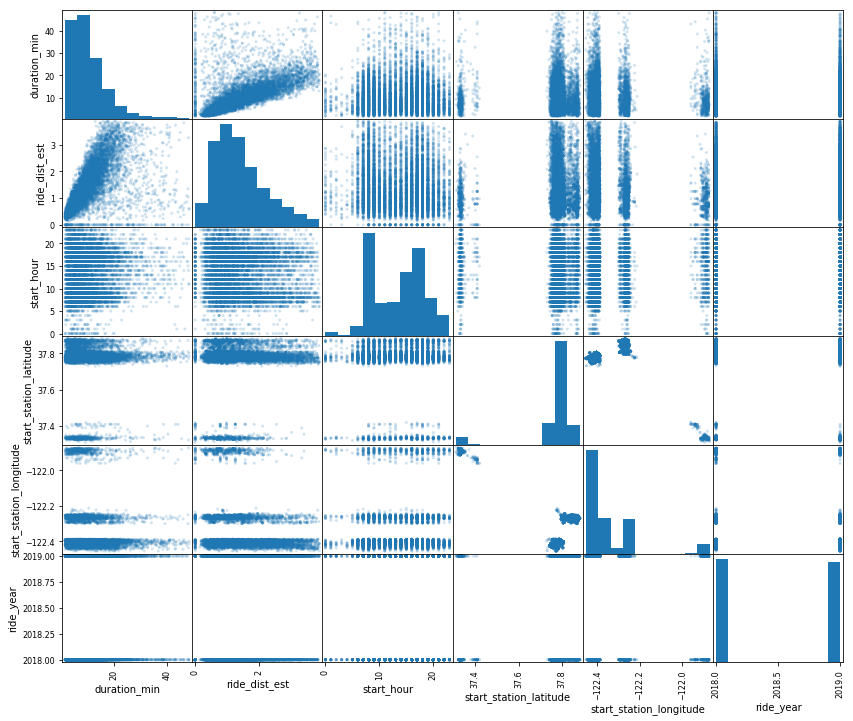

In [51]:
# Now let's run a scatter matrix to observe correlations between variables
axs = pd.plotting.scatter_matrix(bike_sample_small, alpha = .2, figsize=(14,12), diagonal = 'hist');

**Analysis**  
Excluding for extreme outliers, I have the following observations using a random sampling of the bike rental data:  

There is a strong positive correlation between:
* estimated ride distance (ride_dist_est) and rental duration in minutes (duration_min).  This makes sense given the longer you ride the longer it takes.   

There is a weak negative correlation between:
* member age and rental duration
* member age and estimated ride distance  

There is a bimodal distribution for start hour of rentals with the two peaks corresponding to morning and evening commute hours

## Univariate Exploration

> In this section, I investigate distributions of individual variables.

### Duration of bike rentals

In [52]:
bike_clean.duration_min.quantile(.8)

16.3

In [53]:
bike_clean.duration_min.quantile(.9)

22.2

In [54]:
bike_clean.duration_min.quantile(.95)
#95% of rides are less than 30 minutes

29.85

In [55]:
bike_clean.duration_min.quantile(.975)
# At least 97.5% of rentals are within 45 minutes which is inline with the fact that subscribing members have unlimited
# rentals up to 45 minutes included

42.35

In [56]:
bike_clean.duration_min.quantile(.985)

58.91666666666666

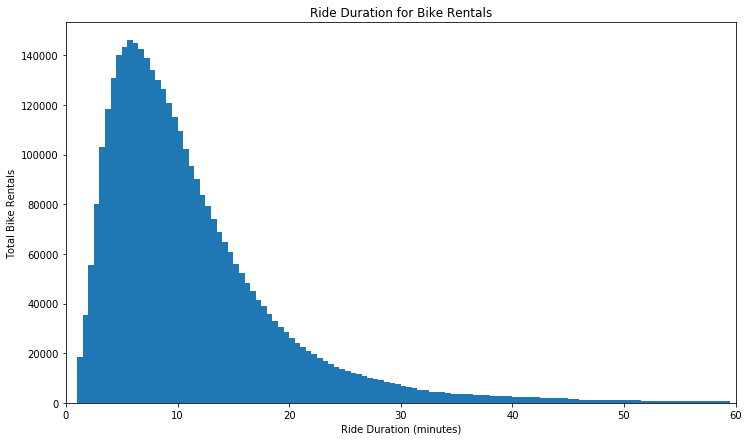

In [57]:
# Let's look at the distribution of ride duration
# Recall, 95% of rides are less than 30 minutes
# Given the vast majority of rides are less than 60 minutes (around 98.5 percentile), I've set a limit at 60 minutes for readability
plt.figure(figsize = (12, 7))
bin_edges = np.arange(0, 60, .5)
plt.hist(data = bike_clean, x ='duration_min', bins=bin_edges)
plt.xlim(0, 60)
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Total Bike Rentals')
plt.title('Ride Duration for Bike Rentals');

In [58]:
bike_clean.duration_min.describe()

count    3.736962e+06
mean     1.384451e+01
std      3.580724e+01
min      1.000000e+00
25%      5.866667e+00
50%      9.333333e+00
75%      1.458333e+01
max      1.439433e+03
Name: duration_min, dtype: float64

**Analysis:**  
The average bike rental is approximately 13.84 minutes long with 80% of rides being 16.3 minutes or less.  I'm reporting on the 80th percentile as a general rule of thumb in reference to the 80/20 rule often used to give a general picture in business decisions.  For added color, 90% of rides are 22.2 minutes or less and less than 5% of total rides are longer than 30 minutes.  
This is in line with the fact that all rides for non subscribing members cost the same price (\\$2) for the first 30 minutes but then increase significantly (\\$3/15 min) afterwards.  At the same time, it might be worth exploring whether additional price tiers between 0-30 minutes would help stimulate more rentals and increase revenue -- for example, given that 75% of rentals are less than 15 minutes, perhaps they could be charged a little less (e.g. \\$1.50) and those who ride longer than 15 minutes could be charged a little more (e.g. $2.50).

### Bike Rental Distance ###

In [59]:
bike_clean.ride_dist_est.quantile(.95)
# 95% of rides are less than 3.5 miles

3.2565349958819265

In [60]:
bike_clean.ride_dist_est.quantile(.99)

4.347768435838296

In [61]:
bike_clean.ride_dist_est.quantile(.99996)
# 99.996% of rides are less than 10 miles

9.472728054435805

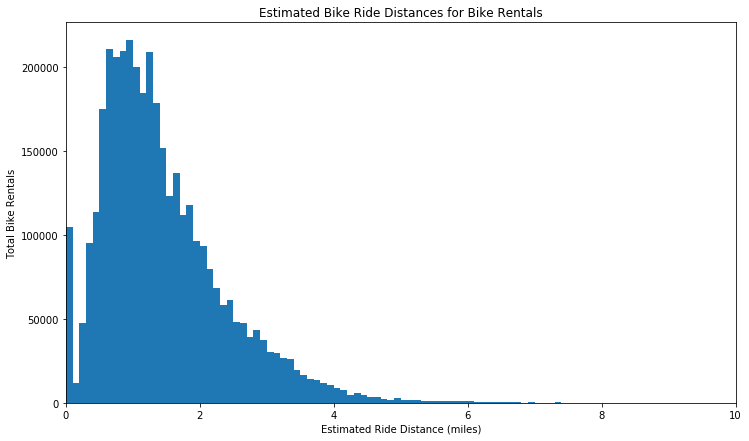

In [62]:
# Let's look at the distribution of estimated ride distance
# 95% of rides are less than 3.5 miles
# Again, given the vast majority of rides are less than 10 miles (99.99%), I've set a limit of 10 miles for readability
plt.figure(figsize = (12, 7))
bin_edges = np.arange(0, 10.1, .1)
plt.hist(data = bike_clean, x ='ride_dist_est', bins=bin_edges)
plt.xlim(0, 10)
plt.xlabel('Estimated Ride Distance (miles)')
plt.ylabel('Total Bike Rentals')
plt.title('Estimated Bike Ride Distances for Bike Rentals');

In [63]:
bike_clean.ride_dist_est.describe()

count    3.736962e+06
mean     1.444333e+00
std      9.324651e-01
min      0.000000e+00
25%      7.801494e-01
50%      1.237736e+00
75%      1.899740e+00
max      6.116361e+01
Name: ride_dist_est, dtype: float64

In [64]:
bike_norm.ride_dist_est.describe()

count    3.234020e+06
mean     1.396123e+00
std      7.968068e-01
min      0.000000e+00
25%      7.971399e-01
50%      1.232360e+00
75%      1.844494e+00
max      3.875491e+00
Name: ride_dist_est, dtype: float64

In [65]:
bike_clean.ride_dist_est.quantile(.8)

2.0971279923509365

**Analysis:**  
The average bike rental is approximately 1.44 miles long with 80% of rides being 2.1 miles or less.  I'm reporting on the 80th percentile as a general rule of thumb in reference to the 80/20 rule often used to give a general picture in business decisions.  For added color, 95% of rides are less than 3.26 miles and less than 1% of rides are longer than 4.35 miles.  This suggests bike rental stations should be no more than 1.44 miles apart.

### Total Bike Rentals ###

In [66]:
bike_clean.columns

Index(['duration_min', 'ride_dist_est', 'ride_year', 'ride_month', 'start_day',
       'end_day', 'start_hour', 'end_hour', 'start_station_name',
       'end_station_name', 'member_gender', 'member_age', 'user_type',
       'bike_share_for_all_trip', 'start_station_id', 'end_station_id',
       'duration_sec', 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'bike_id', 'member_birth_year', 'ride_dist',
       'start_srv_area', 'end_srv_area', 'age_group'],
      dtype='object')

In [67]:
bike_clean.start_day.unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

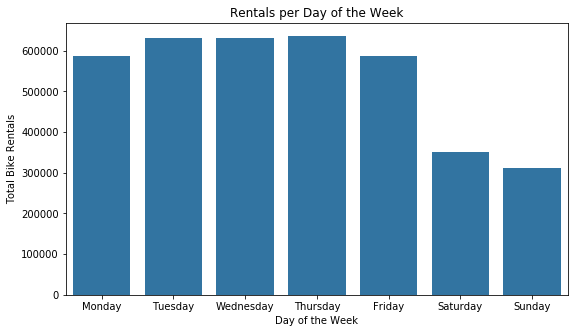

In [68]:
#Let's look at distribution of rides for day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = day_order )
bike_clean['start_day'] = bike_clean['start_day'].astype(ordered_cat)

plt.figure(figsize = (9, 5))
base_color = sns.color_palette()[0]
sns.countplot(data=bike_clean, x='start_day', color = base_color)
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Day of the Week');

**Analysis:**  
The majority of bike rentals occur on weekdays, particular Tuesday - Thursday.  This finding suggests people are renting the bikes for their work commutes.

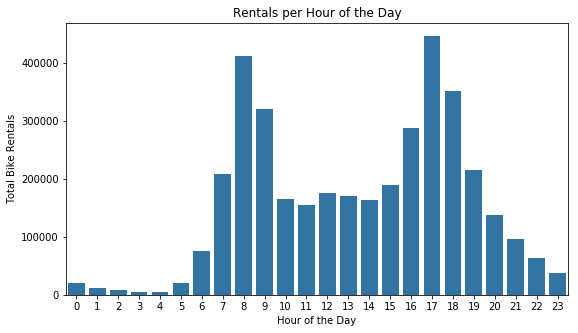

In [69]:
#Let's look at distribution of rides for hour of the day
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
             16, 17, 18, 19, 20, 21, 22, 23]

plt.figure(figsize = (9, 5))
base_color = sns.color_palette()[0]
sns.countplot(data=bike_clean, x='start_hour', color = base_color, order = hour_order )
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Hour of the Day');

**Analysis:**  
The majority of rides occur from 7-9am and 4-7pm, reinforcing the notion that bike rentals are being used for work commutes.

In [852]:
bike_clean.ride_month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

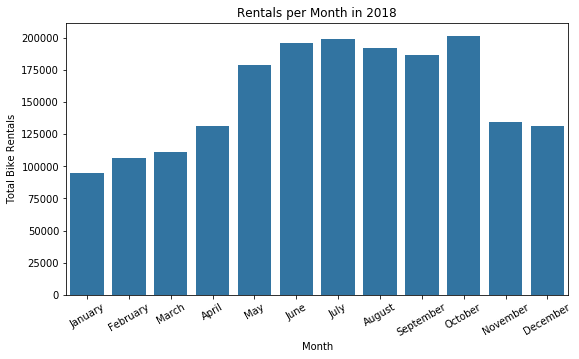

In [71]:
#Let's look at distribution of rides by month for the year of 2018 since we don't have the full 2019 year's data yet 

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = month_order )
bike_clean['ride_month'] = bike_clean['ride_month'].astype(ordered_cat)

bike_clean_2018 = bike_clean.loc[bike_clean.query('ride_year == 2018').index]

plt.figure(figsize = (9, 5))
base_color = sns.color_palette()[0]
sns.countplot(data=bike_clean_2018, x='ride_month', color = base_color)
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Month in 2018');

**Analysis:**  
As would be suspected, the warmer and drier months from May - October correspond to the heaviest periods of bike rentals, whereas the cold and wet months from January - March have the least bike rentals.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the
data.

### Gender of Rider ###

**Gender vs Total Rentals**

In [97]:
bike_clean.member_gender.unique()

[Male, NaN, Female, Other]
Categories (3, object): [Male, Female, Other]

In [98]:
# For analysis purposes, let's expand the definition of 'Other' to represent both 'not-identified' and 'Other'
bike_clean.loc[bike_clean.member_gender.isnull(), 'member_gender'] = 'Other'

In [99]:
# First let's compare percentage of bike rentals by gender
rent_gender = (bike_clean.member_gender.value_counts()/bike_clean.shape[0])*100
rent_gender = pd.DataFrame({'gender':rent_gender.index, 'perc_rentals':rent_gender.values})
rent_gender

,gender,perc_rentals
0,Male,68.043507
1,Female,22.422545
2,Other,9.533948


It appears that men are more than 3 times as likely to rent bikes than women.  Considering that at least historical census data (as of 2010) shows nearly equal ratio of men to women (http://www.bayareacensus.ca.gov/bayarea.htm), this suggests an opportunity to increase female ridership as well as recognition that marketing may be better spent on targeting male riders in terms of better return on investment.  (Side note, the census data doesn't speak to other demographic markers like single male/female ratio etc.)

In [100]:
gender = 'Male'
rent_gender.query('gender == @gender').perc_rentals.values[0]

68.0435069984656

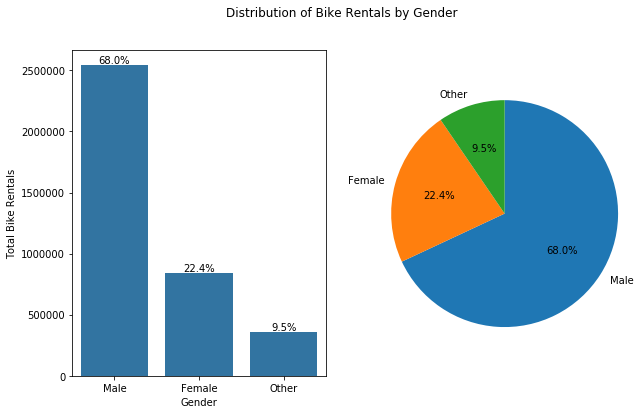

In [101]:
#Let's visualize this finding

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
col_order = ['Male', 'Female', 'Other']
sns.countplot(data = bike_clean, x='member_gender', color = base_color, order = col_order);

plt.ylabel('Total Bike Rentals')
plt.xlabel('Gender')
plt.suptitle('Distribution of Bike Rentals by Gender');

# add annotations
n_points = bike_clean.shape[0]
gender_counts = bike_clean['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+15000, pct_string, ha = 'center', color = 'black')
    
# Alternatively we can provide a pie chart visualization
plt.subplot(1,2,2)
gender_counts = bike_clean['member_gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False);
plt.axis('square');    

**Gender vs Rental Duration**

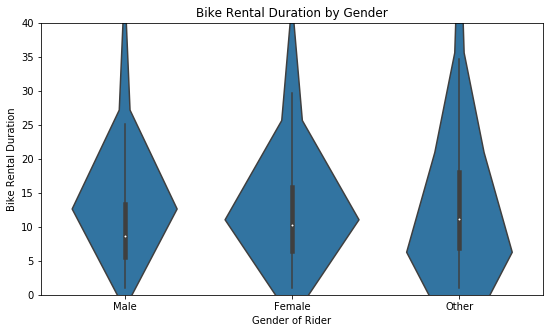

In [75]:
# First we'll try a violin plot of rental duration by gender
plt.figure(figsize = (9, 5))
base_color = sns.color_palette()[0]
col_order = ['Male', 'Female', 'Other']
sns.violinplot(data = bike_clean, x = 'member_gender', y = 'duration_min', color = base_color, order = col_order)
plt.xlabel('Gender of Rider')
plt.ylabel('Bike Rental Duration')
plt.title('Bike Rental Duration by Gender');
plt.ylim(0, 40);

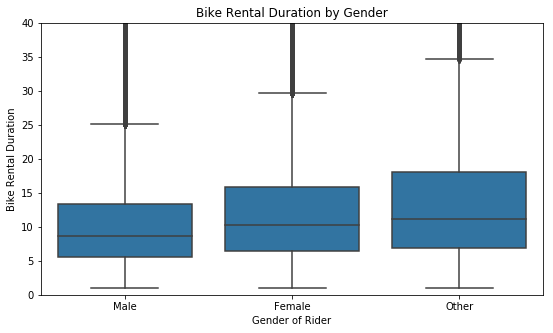

In [76]:
# Next, we'll try a box plot of rental duration by gender
plt.figure(figsize = (9, 5))
base_color = sns.color_palette()[0]
col_order = ['Male', 'Female', 'Other']
sns.boxplot(data = bike_clean, x = 'member_gender', y = 'duration_min', color = base_color, order = col_order)
plt.xlabel('Gender of Rider')
plt.ylabel('Bike Rental Duration')
plt.title('Bike Rental Duration by Gender');
plt.ylim(0, 40);

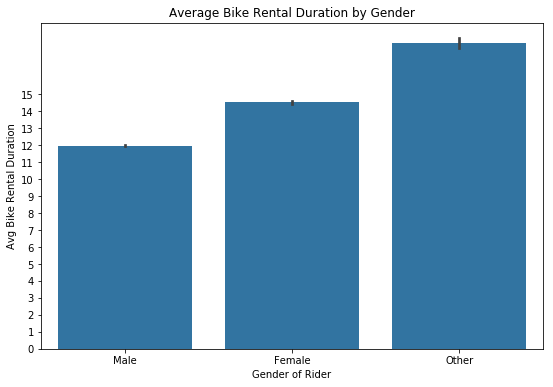

In [77]:
# Next, we'll try a bar plot of average rental duration by gender
plt.figure(figsize = (9, 6))
col_order = ['Male', 'Female', 'Other']
base_color = sns.color_palette()[0]
sns.barplot(data = bike_clean, x = 'member_gender', y = 'duration_min', color = base_color, order = col_order)
plt.xlabel('Gender of Rider')
plt.ylabel('Avg Bike Rental Duration')
plt.yticks(np.arange(0, 16, 1))
plt.title('Average Bike Rental Duration by Gender');

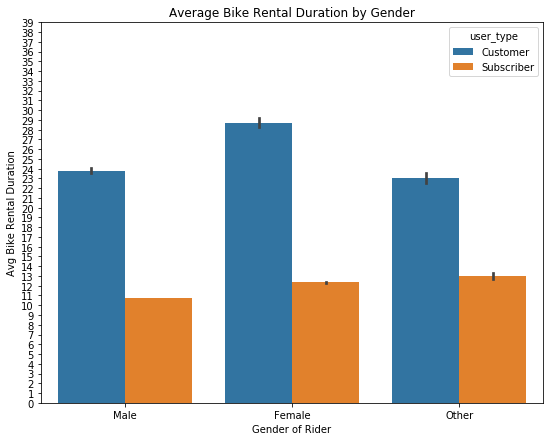

In [78]:
# This is skipping ahead to multivariate analysis, however let's see if this gender disparity in rental duration might 
# be due to subscribership percentage differences since subscribers get to ride 45 minutes for the same price
# We'll try a bar plot of average rental duration by gender and user type
plt.figure(figsize = (9, 7))
col_order = ['Male', 'Female', 'Other']
sns.barplot(data = bike_clean, x = 'member_gender', y = 'duration_min', hue='user_type', order = col_order)
plt.xlabel('Gender of Rider')
plt.ylabel('Avg Bike Rental Duration')
plt.yticks(np.arange(0, 40, 1))
plt.title('Average Bike Rental Duration by Gender');

In [79]:
bike_clean.user_type.isna().any()

False

In [82]:
bike_clean.groupby('member_gender').user_type.value_counts()

member_gender  user_type 
Female         Subscriber     726032
               Customer       111890
Male           Subscriber    2301410
               Customer       241350
Other          Customer        52145
               Subscriber      52028
Name: user_type, dtype: int64

In [83]:
female_sub_pct = 726032 / (726032 + 111890)*100
male_sub_pct = 2301410/ (2301410 + 241350)*100
other_sub_pct = 52028 / (52028 + 52145) * 100
print("females subscribership percentage comprises {0:.2f}, whereas male subscribership percentage comprises {1:.2f} and non-identified subscribership percentage comprises {2:.2f}".format(female_sub_pct, male_sub_pct, other_sub_pct))

females subscribership percentage comprises 86.65, whereas male subscribership percentage comprises 90.51 and non-identified subscribership percentage comprises 49.94


#The barplot tell the clearest picture that female riders on average having longer rental periods than men (~14 min vs ~12 min).  
It's worth exploring whether this is because they ride further distances than men.  Separately, those who did not identify their gender or otherwise identify as 'Other' (3% total population), ride the longest and have the widest distribution of rental durations.
Given that men have a higher percentage of subscribership, this difference in rental duration cannot be attributed to the pricing structure and the percentage of male vs female subscribers (subscribers can rent up to 45 minutes for the same price whereas non subscribers pay one price for rides up to 30 minutes only).

In [92]:
bike_clean.bike_share_for_all_trip.isna().any()

True

In [86]:
bike_clean.groupby('member_gender').bike_share_for_all_trip.value_counts()

member_gender  bike_share_for_all_trip
Female         No                          760368
               Yes                          72478
Male           No                         2295754
               Yes                         227121
Other          No                           95494
               Yes                           8223
Name: bike_share_for_all_trip, dtype: int64

In [87]:
female_sub_pct = 72478 / (72478 + 760368)*100
male_sub_pct = 227121/ (227121 + 2295754)*100
other_sub_pct = 8223 / (8223 + 95494) * 100
print("females bike_share_for_all_trip percentage comprises {0:.2f}, whereas male bike_share_for_all_trip percentage comprises {1:.2f} and non-identified bike_share_for_all_trip percentage comprises {2:.2f}".format(female_sub_pct, male_sub_pct, other_sub_pct))

females bike_share_for_all_trip percentage comprises 8.70, whereas male bike_share_for_all_trip percentage comprises 9.00 and non-identified bike_share_for_all_trip percentage comprises 7.93


In [88]:
bike_clean.query('bike_share_for_all_trip == "Yes"').shape[0]/bike_clean.shape[0]


0.08237386411743015

Only 8.24% of all rides were by low-income "bike_share_for_all_trip" membership.  
Furthermore, the division between men and women are roughly equal as well (~8.5-9%)
Hence, it's unlikely this is a factor as to why women tend to have longer ride durations than men

**Gender vs Ride Distance**

In [674]:
bike_clean.columns

Index(['duration_min', 'ride_dist_est', 'ride_month', 'start_day', 'end_day',
       'start_hour', 'end_hour', 'start_station_name', 'end_station_name',
       'member_gender', 'member_age', 'user_type', 'bike_share_for_all_trip',
       'start_station_id', 'end_station_id', 'duration_sec', 'start_time',
       'end_time', 'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'member_birth_year', 'ride_dist', 'start_srv_area', 'end_srv_area',
       'ride_year', 'age_group'],
      dtype='object')

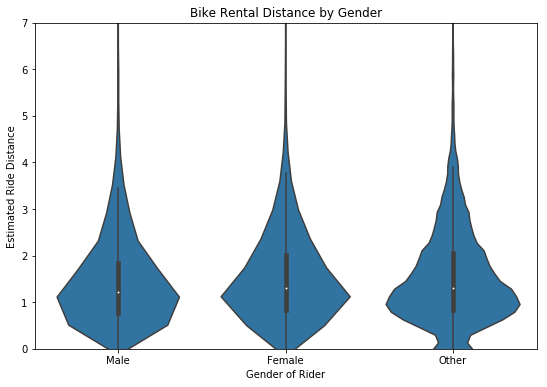

In [89]:
# Next, we'll try a violin plot of ride distance by gender
plt.figure(figsize = (9, 6))
base_color = sns.color_palette()[0]
col_order = ['Male', 'Female', 'Other']
sns.violinplot(data = bike_clean, x = 'member_gender', y = 'ride_dist_est', color = base_color, order = col_order)
plt.xlabel('Gender of Rider')
plt.ylabel('Estimated Ride Distance')
plt.title('Bike Rental Distance by Gender');
plt.ylim(0, 7);

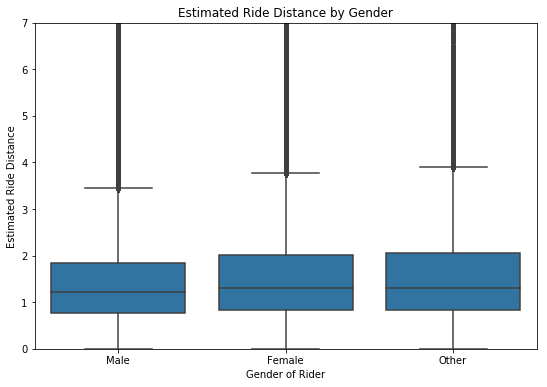

In [90]:
# Next, we'll try a box plot of rental distance by gender
plt.figure(figsize = (9, 6))
base_color = sns.color_palette()[0]
col_order = ['Male', 'Female', 'Other']
sns.boxplot(data = bike_clean, x = 'member_gender', y = 'ride_dist_est', color = base_color, order = col_order)
plt.xlabel('Gender of Rider')
plt.ylabel('Estimated Ride Distance')
plt.title('Estimated Ride Distance by Gender');
plt.ylim(0, 7);

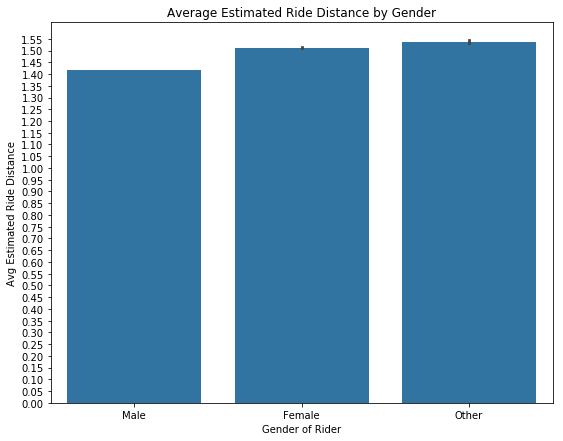

In [91]:
# Next, we'll try a bar plot of average estimated rental distance by gender
plt.figure(figsize = (9, 7))
base_color = sns.color_palette()[0]
col_order = ['Male', 'Female', 'Other']
sns.barplot(data = bike_clean, x = 'member_gender', y = 'ride_dist_est',color = base_color, order = col_order)
plt.xlabel('Gender of Rider')
plt.ylabel('Avg Estimated Ride Distance')
plt.yticks(np.arange(0, 1.6, .05))
plt.title('Average Estimated Ride Distance by Gender');

**Total Rides by Time Period**

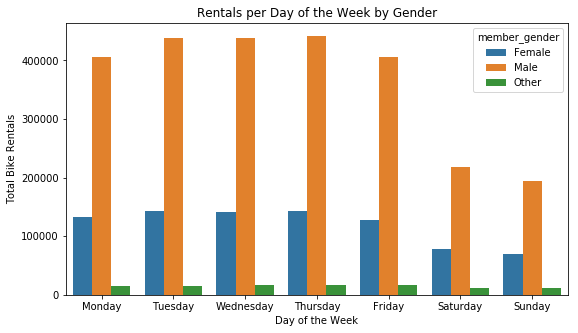

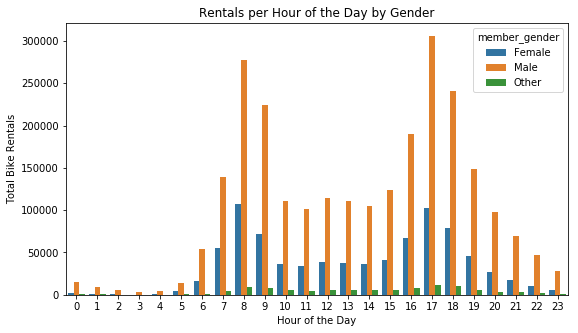

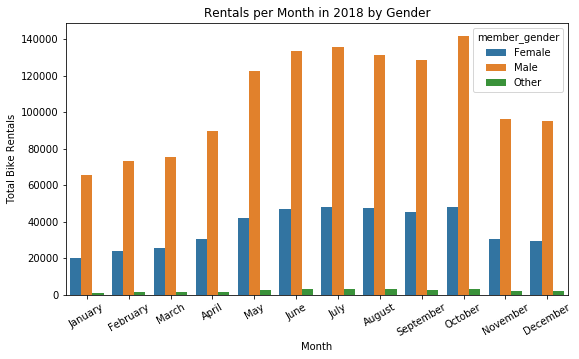

In [93]:
#Let's look at distribution of rides for day of the week by gender
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean, x='start_day', hue='member_gender')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Day of the Week by Gender');

#Let's look at distribution of rides for hour of the day by gender
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
             16, 17, 18, 19, 20, 21, 22, 23]

plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean, x='start_hour', hue='member_gender', order = hour_order )
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Hour of the Day by Gender');

#Let's look at distribution of rides by month for the year of 2018 since we don't have the full 2019 year's data yet 

plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean_2018, x='ride_month', hue='member_gender')
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Month in 2018 by Gender');

**Analysis**
In addition to having slightly longer rental periods than men, it appears women on average also ride slightly further than men (1.5 vs 1.4 miles respectively).  Perhaps this finding provides some additional rationale for addressing the opportunity to increase female ridership.  In terms of when women rent bikes (time of day and day of week), it largely follows the same pattern as men - they are heavy users on weekdays, especially during commute hours with an increase in usage during the warmer and drier months.

### Age of Rider ###

**Age vs Total Bike Rentals**

In [94]:
bike_clean['age_group'].value_counts()

25-34           1622389
35-44            821303
18-24            437630
45-54            367478
not_provided     299460
55+              188702
Name: age_group, dtype: int64

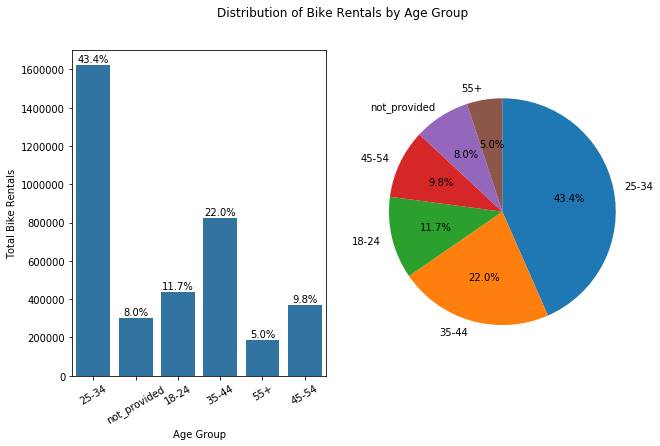

In [95]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.countplot(data = bike_clean, x='age_group', color = base_color);

plt.ylabel('Total Bike Rentals')
plt.xlabel('Age Group')
plt.suptitle('Distribution of Bike Rentals by Age Group')
plt.xticks(rotation = 30);

# add annotations
n_points = bike_clean.shape[0]
age_counts = bike_clean['age_group'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = age_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, count+15000, pct_string, ha = 'center', color = 'black')
    
# Alternatively we can provide a pie chart visualization
plt.subplot(1,2,2)
age_counts = bike_clean['age_group'].value_counts()
plt.pie(age_counts, labels = age_counts.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False);
plt.axis('square');

It appears that middle aged people comprise the vast majority of bike renters, with 25-34 year olds representing the largest group (43.4%) and 35-44 year olds representing the next largest group (22%).  Marketing efforts perhaps have the highest return on investment for these age groups whereas younger and older groups might represent opportunities for growth.

**Age Group vs Rental Duration**

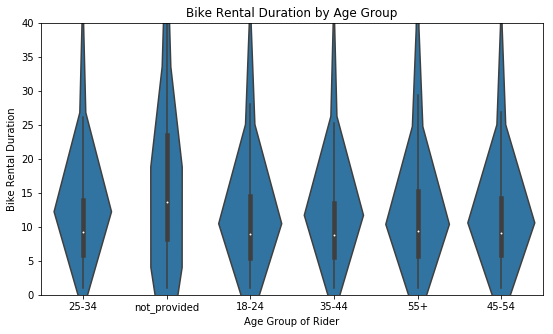

In [102]:
# First we'll try a violin plot of rental duration by age group
plt.figure(figsize = (9, 5))
base_color = sns.color_palette()[0]
sns.violinplot(data = bike_clean, x = 'age_group', y = 'duration_min', color = base_color)
plt.xlabel('Age Group of Rider')
plt.ylabel('Bike Rental Duration')
plt.title('Bike Rental Duration by Age Group');
plt.ylim(0, 40);

In [103]:
#It's hard to discern clear patterns from the violin plot

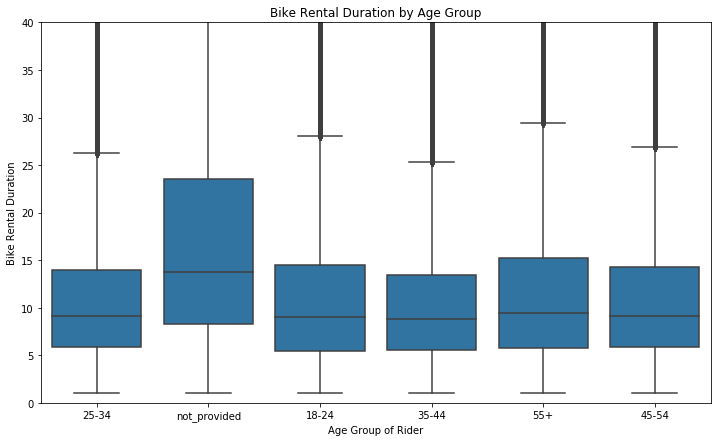

In [104]:
# Next, we'll try a box plot of rental duration by age group
plt.figure(figsize = (12, 7))
base_color = sns.color_palette()[0]
sns.boxplot(data = bike_clean, x = 'age_group', y = 'duration_min', color = base_color)
plt.xlabel('Age Group of Rider')
plt.ylabel('Bike Rental Duration')
plt.title('Bike Rental Duration by Age Group');
plt.ylim(0, 40);

''

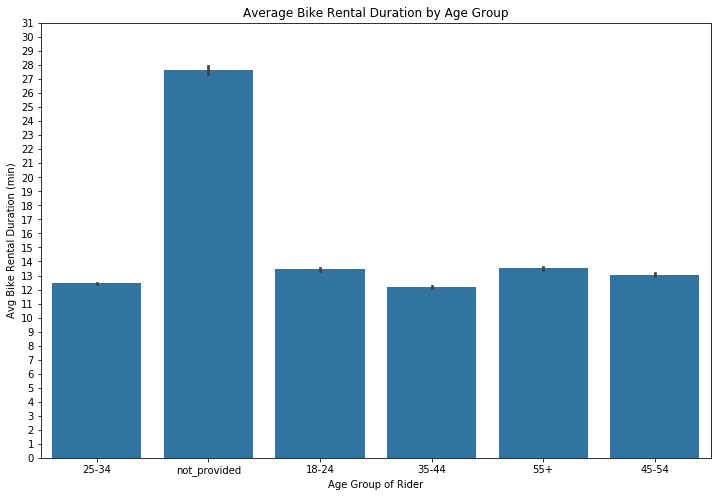

In [106]:
# Next, we'll try a bar plot of average rental duration by age group
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[0]

g=sns.barplot(data = bike_clean, x = 'age_group', y = 'duration_min', color = base_color)
plt.xlabel('Age Group of Rider')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Age Group');
plt.yticks(np.arange(0, 32, 1))
;

The bar plot above provides the clearest visual, in particular it reveals that the average rental duration for the youngest (18-24) and oldest riders (45-54 and 55+) are the longest (~13-14 min on average), , whereas the rental duration for the age groups of 25-34 and 35-44 are relatively shorter (~12-13 min on average).  Given that subscriber membership is actually highest for 25-34 (39%) and 35-44 (20%) year olds compared to other age groups, this observation cannot be attributed to the fact that members can ride longer (up to 45 minutes) with no extra charge.
If I were to hazard a guess, this difference is perhaps due to the higher likelihood that the youngest and oldest renters are riding slightly slower, further and/or perhaps being more likely to be renting for leisure than commute purposes assuming the youngest are students and the eldest are retired.  Those who do not provide their age ride the longest of all age groups, which perhaps corresponds to one time renters who are simply here on vacation etc (they have the lowest subscribership membership for all age groups at 1.9% only which makes sense if they are only here on vacation).

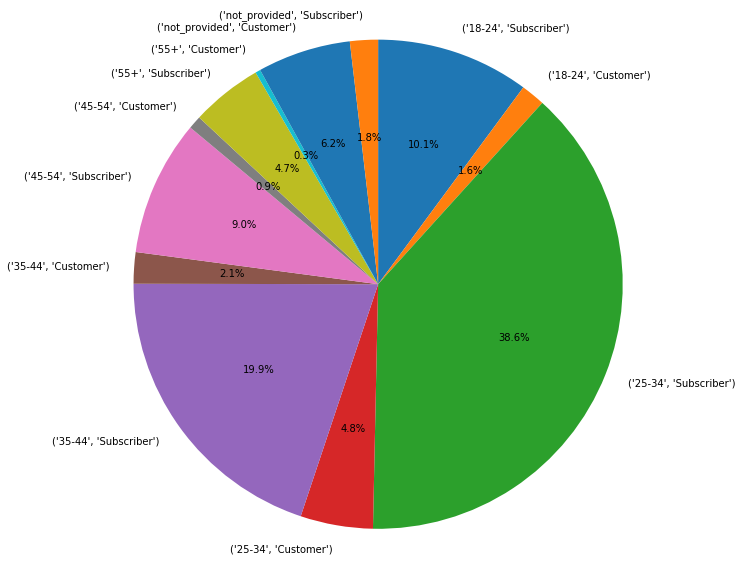

In [110]:
#quick check to see variation in subscribership amongst age groups
plt.figure(figsize=(10,10))
age_counts = bike_clean.groupby('age_group').user_type.value_counts()
plt.pie(age_counts, labels = age_counts.index, autopct='%1.1f%%'
        , startangle = 90,
        counterclock = False);
plt.axis('square');

In [111]:
bike_clean.groupby('age_group').user_type.value_counts()

age_group     user_type 
18-24         Subscriber     378058
              Customer        59572
25-34         Subscriber    1443437
              Customer       178952
35-44         Subscriber     743836
              Customer        77467
45-54         Subscriber     334919
              Customer        32559
55+           Subscriber     176188
              Customer        12514
not_provided  Customer       230345
              Subscriber      69115
Name: user_type, dtype: int64

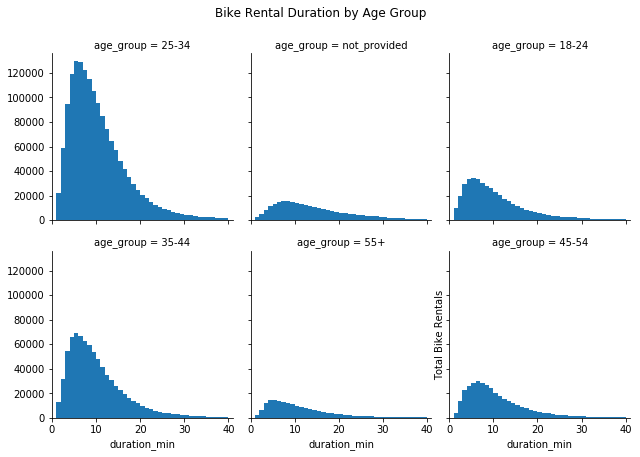

In [112]:
# Alternatively, we can do a Facet Grid
bin_edges = np.arange(0, 41, 1)
g = sns.FacetGrid(data = bike_clean, col='age_group', col_wrap = 3)
g.map(plt.hist, 'duration_min', bins = bin_edges)
plt.xlim(0, 41);
plt.suptitle('Bike Rental Duration by Age Group', y=1.05)
plt.ylabel('Total Bike Rentals');

**Age Group vs Ride Distance**

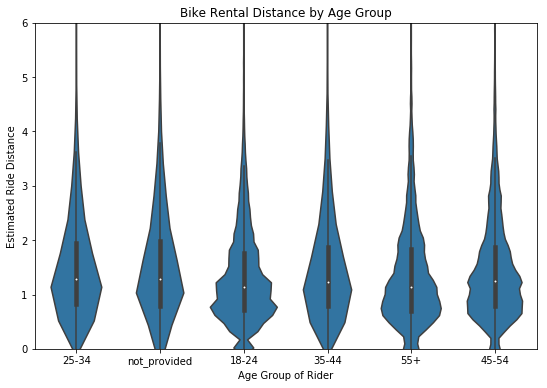

In [113]:
# Next, we'll try a violin plot of ride distance by age group
plt.figure(figsize = (9, 6))
base_color = sns.color_palette()[0]
sns.violinplot(data = bike_clean, x = 'age_group', y = 'ride_dist_est', color = base_color)
plt.xlabel('Age Group of Rider')
plt.ylabel('Estimated Ride Distance')
plt.title('Bike Rental Distance by Age Group');
plt.ylim(0, 6);

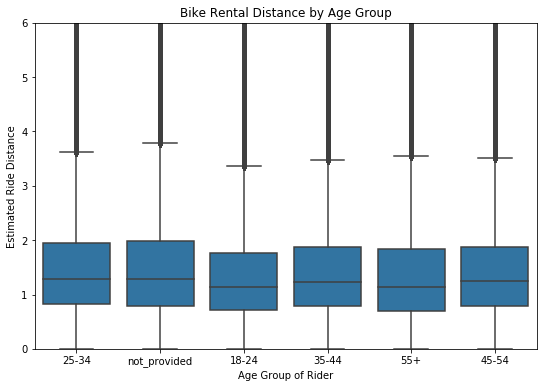

In [114]:
# Next, we'll try a box plot of ride distance by age group
plt.figure(figsize = (9, 6))
base_color = sns.color_palette()[0]
sns.boxplot(data = bike_clean, x = 'age_group', y = 'ride_dist_est', color = base_color)
plt.xlabel('Age Group of Rider')
plt.ylabel('Estimated Ride Distance')
plt.title('Bike Rental Distance by Age Group');
plt.ylim(0, 6);

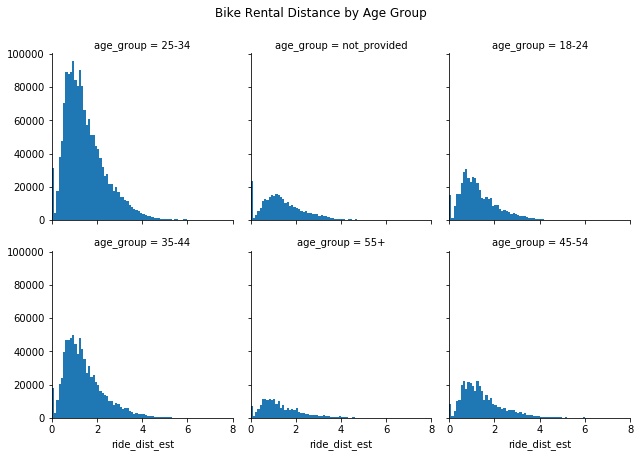

In [115]:
# Alternatively, we can do a Facet Grid
bin_edges = np.arange(0, 8.1, .1)
g = sns.FacetGrid(data = bike_clean, col='age_group', col_wrap = 3)
g.map(plt.hist, 'ride_dist_est', bins = bin_edges,)
plt.xlim(0, 8)
plt.suptitle('Bike Rental Distance by Age Group', y=1.05);

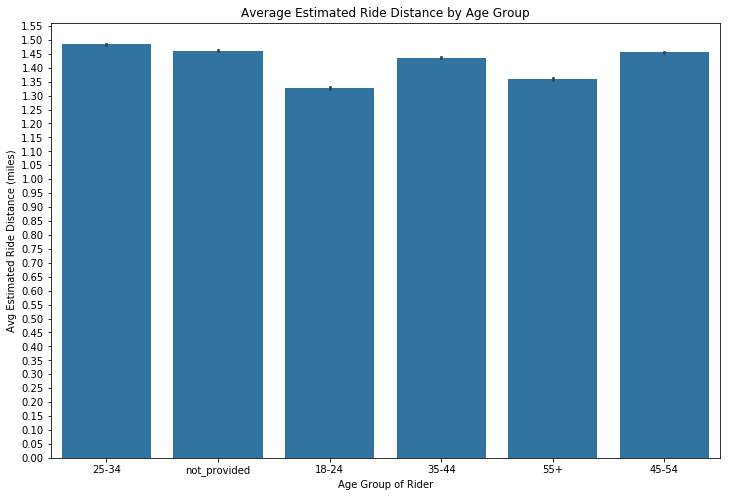

In [116]:
# Next, we'll try a bar plot of average estimated rental distance by age group
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[0]
g = sns.barplot(data = bike_clean, x = 'age_group', y = 'ride_dist_est',color = base_color)
plt.xlabel('Age Group of Rider')
plt.ylabel('Avg Estimated Ride Distance (miles)')
plt.yticks(np.arange(0, 1.6, .05))
plt.title('Average Estimated Ride Distance by Age Group');

Surprisingly, we find that that the same age groups which have longer rental durations are in fact riding slightly shorter estimated distances on average.  This reinforces the earlier suspicion that the youngest and oldest riders are taking more leisurely rides - taking more stops, riding relatively slower, enjoying the view etc. - as opposed to rushed commutes to work etc.  As for those who do not provide their age, despite having the longest rental durations they do not ride further distances than other age groups which similarly reinforces the earlier hypothesis that these are one time renters who are simply here on vacation and enjoying the sights and sounds of the bay area and who are also not as familiar navigating their way around or otherwise intentionally taking more of a circuitous route as part of their exploration.

**Total Rides by Time Period**

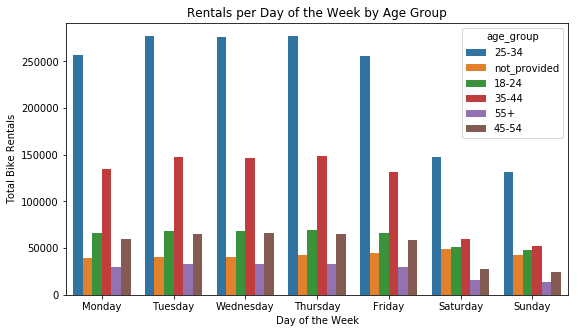

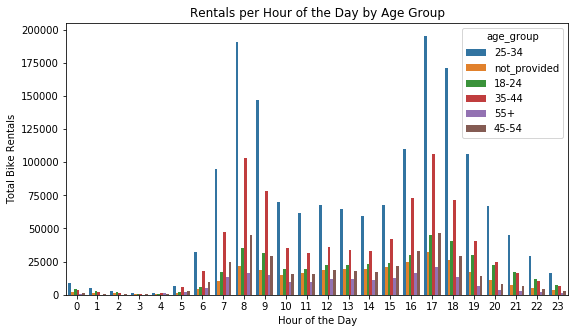

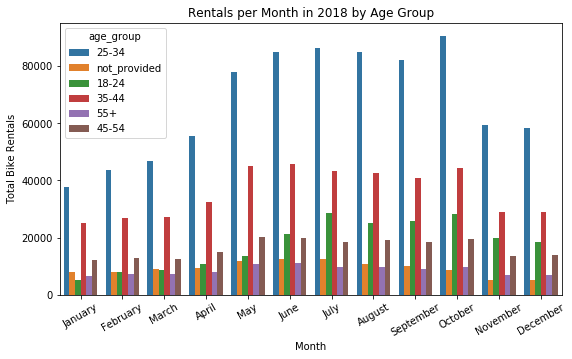

In [117]:
#Let's look at distribution of rides for day of the week by Age Group
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean, x='start_day', hue='age_group')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Day of the Week by Age Group');

#Let's look at distribution of rides for hour of the day by Age Group
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
             16, 17, 18, 19, 20, 21, 22, 23]

plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean, x='start_hour', hue='age_group', order = hour_order )
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Hour of the Day by Age Group');

#Let's look at distribution of rides by month for the year of 2018 since we don't have the full 2019 year's data yet 

plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean_2018, x='ride_month', hue='age_group')
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Month in 2018 by Age Group');

Upon analyzing when the different age groups rent bikes, it appears all except those who do not provide an age tend to ride more on the weekdays and during commute hours.  This suggests that the younger (18-24) and older (45-54, 55+) are similarly renting bikes for commuting (to work, internships, school etc.), but perhaps they are simply slightly slower riders -- paying closer attention to traffic regulations, enjoying their ride, or making more stops.

### User Type ###

**Total Bike Rentals**

In [118]:
bike_clean.user_type.value_counts()

Subscriber    3145553
Customer       591409
Name: user_type, dtype: int64

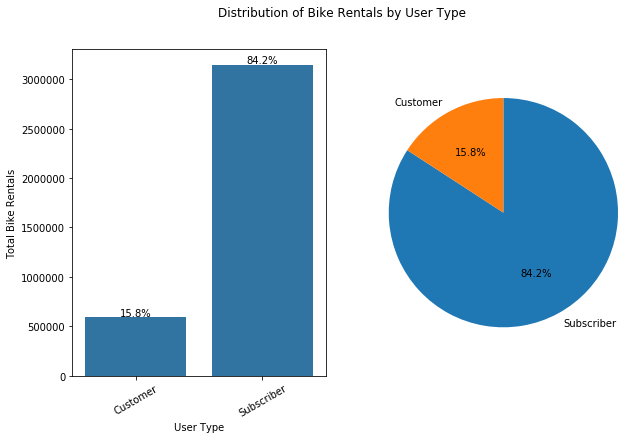

In [119]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.countplot(data = bike_clean, x='user_type', color = base_color);

plt.ylabel('Total Bike Rentals')
plt.xlabel('User Type')
plt.suptitle('Distribution of Bike Rentals by User Type')
plt.xticks(rotation = 30);

# add annotations
n_points = bike_clean.shape[0]
user_counts = bike_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, count+15000, pct_string, ha = 'center', color = 'black')
    
# Alternatively we can provide a pie chart visualization
plt.subplot(1,2,2)
user_counts = bike_clean['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False);
plt.axis('square');

Here we find that the vast majority (~84%) of bike rentals are to subscribing members.  This suggests subscribers are taking advantage of their unlimited access to 45-min rides that is included with their membership.

**Rental Duration**

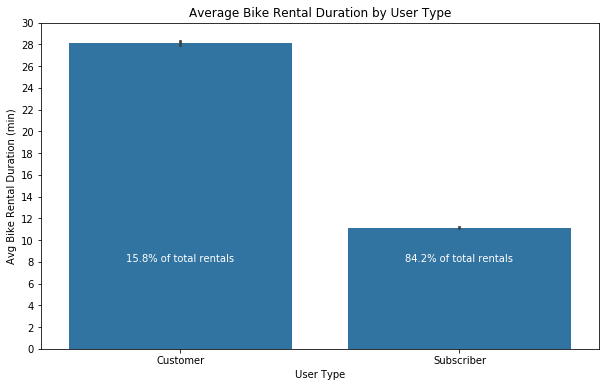

In [120]:
# Next, we'll try a bar plot of average rental duration by user type
plt.figure(figsize = (10, 6))
base_color = sns.color_palette()[0]

g=sns.barplot(data = bike_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by User Type');
plt.yticks(np.arange(0, 31, 2));

# add annotations
n_points = bike_clean.shape[0]
user_counts = bike_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}% of total rentals'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, 8, pct_string, ha = 'center', color = 'white');

It appears non-subscribing users (aka 'customers') are more likely to rent for much longer periods (~28 min on average versus ~11 minutes for subscribing users).  Given rentals to non-subscribing 'customers' comprise far fewer rentals in total, it's likely due to the fact that these are one-time leisurely rides such as those by tourists etc. 

**Ride Distance**

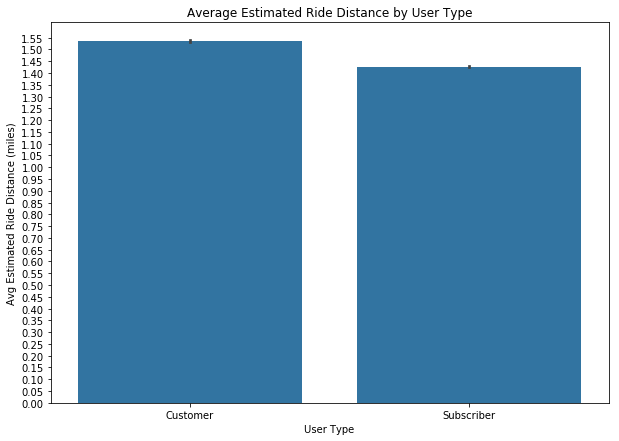

In [121]:
# Next, we'll try a bar plot of average estimated rental distance by age group
plt.figure(figsize = (10, 7))
base_color = sns.color_palette()[0]
g = sns.barplot(data = bike_clean, x = 'user_type', y = 'ride_dist_est',color = base_color)
plt.xlabel('User Type')
plt.ylabel('Avg Estimated Ride Distance (miles)')
plt.yticks(np.arange(0, 1.6, .05))
plt.title('Average Estimated Ride Distance by User Type');

Here, I'm finding that non-subscribing customers ride only a very small distance further on average (estimated 1.52 miles vs 1.42 miles for subscribing members) despite averaging ~2.5x as long of rental durations.  This again reinforces the earlier suspicion that such riders are taking more leisurely rides - taking more stops, riding relatively slower, enjoying the view etc. - as opposed to rushed commutes to work etc.  In addition, this finding reinforces the earlier hypothesis that these rentals are for one time renters who are simply here on vacation and enjoying the sights and sounds of the bay area and who are also not as familiar navigating their way around or otherwise intentionally taking more of a circuitous route as part of their exploration.

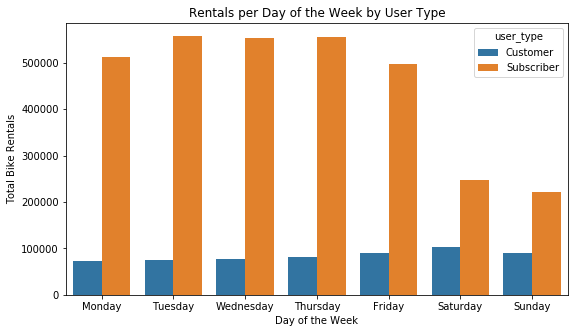

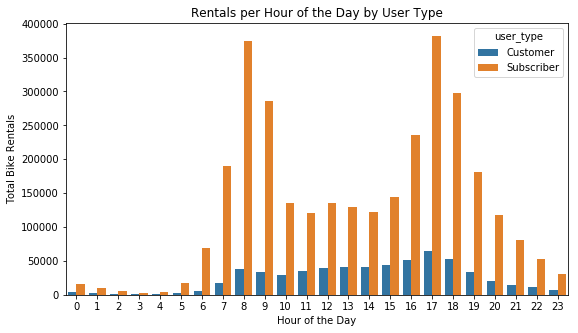

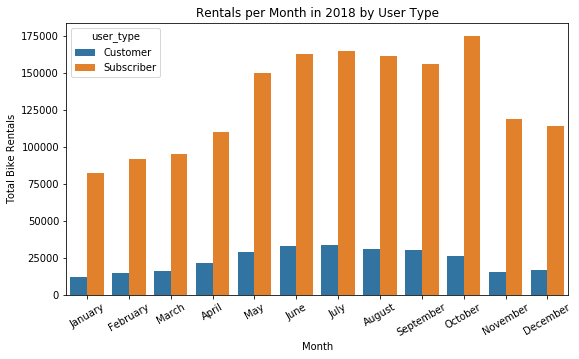

In [122]:
#Let's look at distribution of rides for day of the week by user type
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean, x='start_day', hue='user_type')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Day of the Week by User Type');

#Let's look at distribution of rides for hour of the day by user type
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
             16, 17, 18, 19, 20, 21, 22, 23]

plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean, x='start_hour', hue='user_type', order = hour_order )
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Hour of the Day by User Type');

#Let's look at distribution of rides by month for the year of 2018 since we don't have the full 2019 year's data yet 
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean_2018, x='ride_month', hue='user_type')
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Month in 2018 by User Type');

**Analysis**
Yet again, we find further evidence supporting our theory that non subscribing customers are vacationing tourists -- such customers tend to rent more during the weekends and afternoons as opposed to subscribers who rent the most on weekdays with a concentration during morning and late afternoon/early evening commute hours.  Given these two user types have somewhat different profiles in terms of when they rent bikes (hours and days not a direct overlap), it makes even more sense to target such customers for growth as it would not cannibalize too much if any into or impact the experience for subscribing customers.  If Lyft were to increase ridership amongst such customers, there should still be plenty of bikes available for rent during weekday commute hours (perhaps less so in the weekday evenings).

### Rental Service Area ##

**Total Bike Rentals**

In [124]:
bike_clean['start_srv_area'].value_counts()

San Francisco    2859076
East Bay          694343
San Jose          183543
Name: start_srv_area, dtype: int64

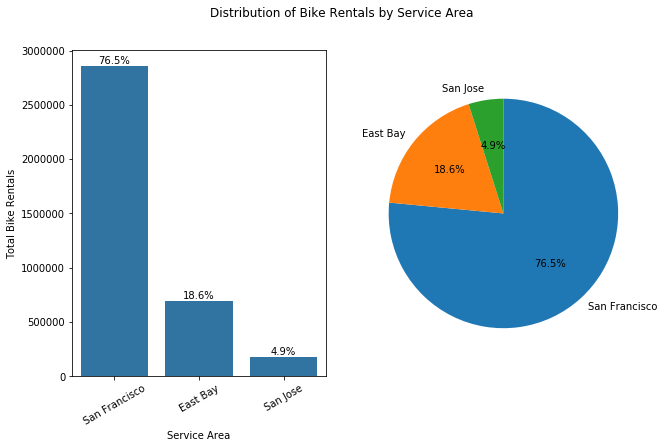

In [125]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.countplot(data = bike_clean, x='start_srv_area', color = base_color);

plt.ylabel('Total Bike Rentals')
plt.xlabel('Service Area')
plt.suptitle('Distribution of Bike Rentals by Service Area')
plt.xticks(rotation = 30);

# add annotations
n_points = bike_clean.shape[0]
rental_counts = bike_clean['start_srv_area'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = rental_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, count+15000, pct_string, ha = 'center', color = 'black')
    
# Alternatively we can provide a pie chart visualization
plt.subplot(1,2,2)
rental_counts = bike_clean['start_srv_area'].value_counts()
plt.pie(rental_counts, labels = rental_counts.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False);
plt.axis('square');

It appears San Francisco accounts for the vast majority of bike rentals (76.5%) with the East Bay in a distant 2nd at 18.6% and San Jose last at 4.9%

In [126]:
# Let's see the breakdown for 2018 only
bike_clean[bike_clean.ride_year==2018].start_srv_area.value_counts()/bike_clean[bike_clean.ride_year==2019].shape[0]

San Francisco    0.766477
East Bay         0.181676
San Jose         0.046765
Name: start_srv_area, dtype: float64

In [127]:
# Now we can compare that breakdown against 2019
bike_clean[bike_clean.ride_year==2019].start_srv_area.value_counts()/bike_clean[bike_clean.ride_year==2019].shape[0]

San Francisco    0.759795
East Bay         0.188988
San Jose         0.051217
Name: start_srv_area, dtype: float64

It looks like the distribution of bike rentals hasn't changed much year to year (a change of less than 1% for San Francisco and East Bay), however San Jose has seen a slight uptick of nearly 5% compared to the year prior.

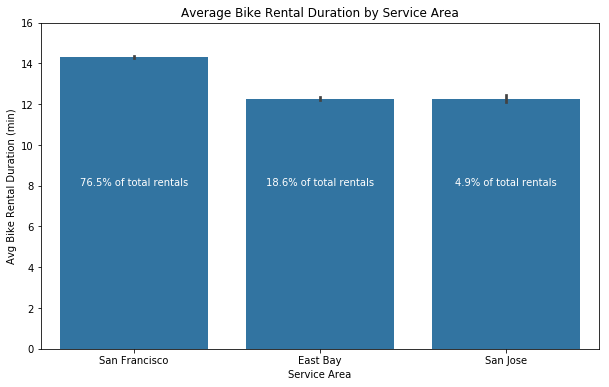

In [128]:
# Next, we'll try a bar plot of average rental duration by Service Area
plt.figure(figsize = (10, 6))
base_color = sns.color_palette()[0]

g=sns.barplot(data = bike_clean, x = 'start_srv_area', y = 'duration_min', color = base_color)
plt.xlabel('Service Area')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Service Area');
plt.yticks(np.arange(0, 17, 2));

# add annotations
n_points = bike_clean.shape[0]
rental_counts = bike_clean['start_srv_area'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = rental_counts[label.get_text()]
    pct_string = '{:0.1f}% of total rentals'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, 8, pct_string, ha = 'center', color = 'white');

It appears San Francisco rentals are longest in duration.  This could perhaps be attributed to the fact that there are more tourists visiting San Francisco and hence renting bikes for leisurely rides.  It's hard to really know the exact reason without having more info including info about the topography of the bike rental stations in each service area etc. (e.g. their average distance from one another etc.)

**Ride Distance**

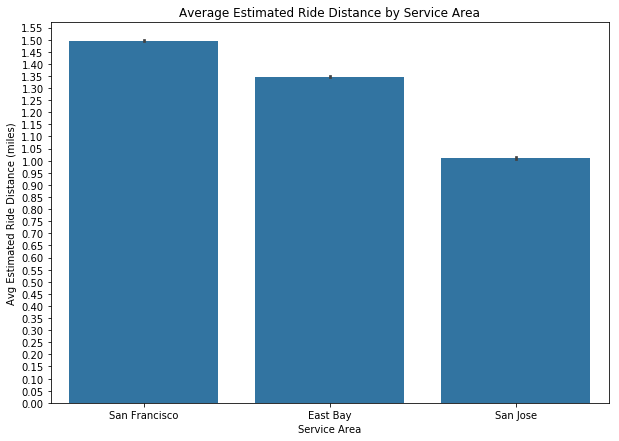

In [129]:
# Next, we'll try a bar plot of average estimated rental distance by Service Agrea
plt.figure(figsize = (10, 7))
base_color = sns.color_palette()[0]
g = sns.barplot(data = bike_clean, x = 'start_srv_area', y = 'ride_dist_est',color = base_color)
plt.xlabel('Service Area')
plt.ylabel('Avg Estimated Ride Distance (miles)')
plt.yticks(np.arange(0, 1.6, .05))
plt.title('Average Estimated Ride Distance by Service Area');

It appears San Francisco rentals are longest in traveled distance as well.  This could perhaps be attributed to the fact that there are more tourists visiting San Francisco and hence renting bikes for exploring the city.  It's hard to really know the exact reason without having more info including info about the topography of the bike rental stations in each service area etc. (e.g. their average distance from one another etc.)

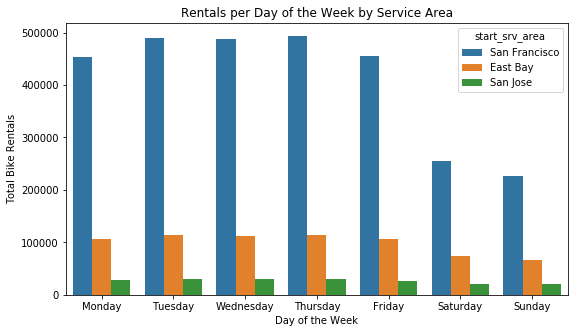

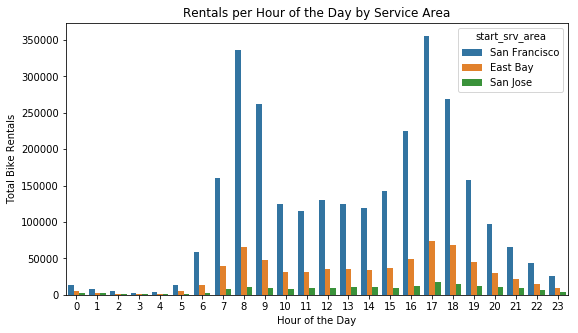

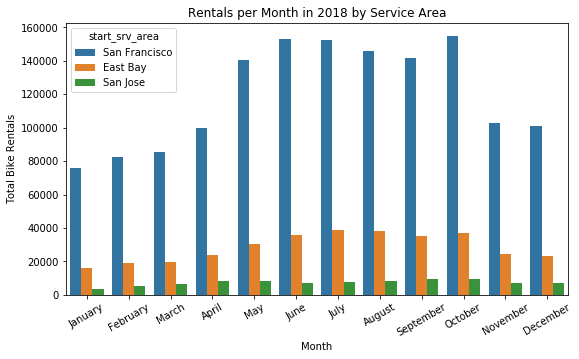

In [130]:
#Let's look at distribution of rides for day of the week by service area
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean, x='start_day', hue='start_srv_area')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Day of the Week by Service Area');

#Let's look at distribution of rides for hour of the day by service area
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
             16, 17, 18, 19, 20, 21, 22, 23]

plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean, x='start_hour', hue='start_srv_area', order = hour_order )
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Hour of the Day by Service Area');

#Let's look at distribution of rides by month for the year of 2018 since we don't have the full 2019 year's data yet 
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean_2018, x='ride_month', hue='start_srv_area')
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Month in 2018 by Service Area');

The different service areas all exhibit a similar pattern in terms of what days of the week and times of day rentals take place with heavy concentration on weekday commute hours.

### Ford vs Lyft ###

In [131]:
bike_clean_2018.ride_month.value_counts()

October      201458
July         199222
June         195968
August       192162
September    186217
May          179125
November     134135
December     131363
April        131169
March        111382
February     106718
January       94802
Name: ride_month, dtype: int64

In [132]:
#Let's do a comparison between operations that were branded as Ford vs those branded as Lyft
#Ford operated the bike rental service in 2018 and then Lyft rebranded it as a Lyft operation around July 2019
# see article for approx dates: 
#https://www.sfchronicle.com/business/article/Lyft-s-electric-Bay-Wheels-bikes-back-in-San-14108790.php#photo-17883477
compare_months = ['July', 'August', 'September']
bike_ford = bike_clean.query('ride_year == 2018') 
bike_ford = bike_ford[bike_ford.ride_month.isin(compare_months)]
bike_lyft = bike_clean.query('ride_year == 2019') 
bike_lyft = bike_lyft[bike_lyft.ride_month.isin(compare_months)]
bike_clean_compare = pd.concat([bike_ford, bike_lyft], ignore_index=True, sort=False)

In [133]:
bike_clean_compare['ride_year'].value_counts()

2019    628421
2018    577601
Name: ride_year, dtype: int64

In [134]:
pct_diff = 100*(bike_clean_compare['ride_year'].value_counts()[2019]-bike_clean_compare['ride_year'].value_counts()[2018])/bike_clean_compare['ride_year'].value_counts()[2018]
pct_diff

8.798461221500656

In [224]:
change_lyft = (628421 - 577601)/577601 * 100
change_lyft

8.798461221500656

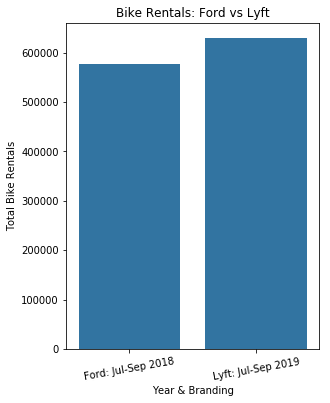

In [225]:
# Now let's compare, starting with total bike rentals
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.countplot(data = bike_clean_compare, x='ride_year', color = base_color);

plt.ylabel('Total Bike Rentals')
plt.xlabel('Year & Branding')
plt.title('Bike Rentals: Ford vs Lyft')
#plt.suptitle('Distribution of Bike Rentals Summer 2018 vs 2019 (Ford vs Lyft)')
plt.xticks(locs, ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019'], rotation=10);

It looks like 2019 July-Sep had a measurable uptick compared to 2018 (62,8421 versus 57,7601 or an increase of 8.80%).  Although this increase looks promising, it's still early and I suspect we need more data (e.g. future 2019 months) to really know the full impact of transitioning from Ford to Lyft operations in terms of increased ridership.

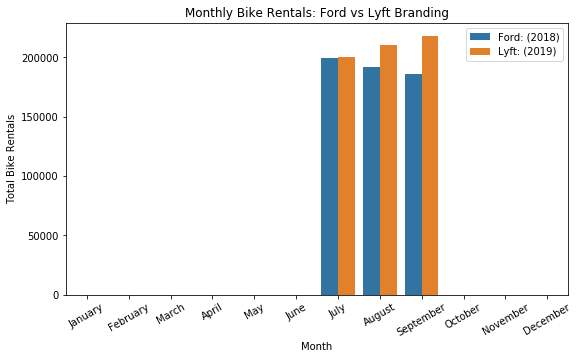

In [137]:
#Let's look at distribution of rides by month for the overlapping months between 2018 and 2019
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean_compare, x='ride_month', hue='ride_year')
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Monthly Bike Rentals: Ford vs Lyft Branding')
plt.legend(loc='upper right',labels=('Ford: (2018)', 'Lyft: (2019)'));

There does appear to be a measurable uptick in ridership, especially in August and September compared to last year, however given it's only three months of data, it's a little early to know the full impact of Lyft's changes on total ridership.  This uptick could be at least partially attributable to a temporary novelty factor for customers (discovering new bike share option integrated into Lyft app) or other factors such as expansion of bike rental stations versus an actual change implemented by Lyft to improve and increase awareness of the customer bike rental experience (e.g. using Lyft's app versus old Ford App etc.)

**Statistical Significance of our observation**
Let's see if we can apply bootstrapping plus hypothesis testing to determine our p-value and confirm whether the change in total bike ridership (i.e. total bike rentals) of 8.8% between when Ford and Lyft operated the bike share program is indeed statistically significant.

Assuming 𝑝𝑜𝑙𝑑  and 𝑝𝑛𝑒𝑤 represent bike rentals between Ford (old) and Lyft (new):

> Null Hypothesis **$(H_{0}): p_{new} <= p_{old}$**

> Alternative Hypothesis **$(H_{1}): p_{new} > p_{old}$**

In [138]:
cnt_ford = bike_clean_compare.query('ride_year == 2018').shape[0]
cnt_lyft = bike_clean_compare.query('ride_year == 2019').shape[0]
obs_diff = (cnt_lyft - cnt_ford)/cnt_ford
obs_diff

0.08798461221500656

In [232]:
#observed statistic is an increase of 8.80%:
diffs = []
for _ in range(1000):
    b_samp = bike_clean_compare.sample(bike_clean_compare.shape[0], replace=True)
    bike_ford = b_samp.query('ride_year == 2018')
    bike_lyft = b_samp.query('ride_year == 2019')
    cnt_ford = bike_ford.shape[0]
    cnt_lyft = bike_lyft.shape[0]
    pct_diff = (cnt_lyft - cnt_ford)/cnt_ford
    diffs.append(pct_diff)

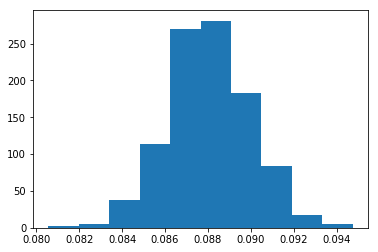

In [233]:
plt.hist(diffs);

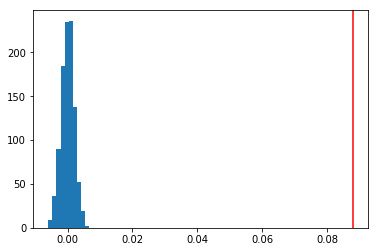

In [234]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)
plt.hist(null_vals);
plt.axvline(x=obs_diff, color = 'red');

In [235]:
(null_vals>obs_diff).mean()

0.0

**Conclusion:**  
With a p-value less than .01, it seems unlikely that our observed statistic is from the null hypothesis.  Hence we can reject our hypothesis and conclude that Lyft's new branding and rental experience is indeed increasing bike ridership compared to Ford.  Note, in consideration of computing resources we only used a sampling of 1,000 (versus say 10,000), but given the very lower p-value, it seems pretty clear there is a stastically significant change in ridership with Lyft compared to last year.

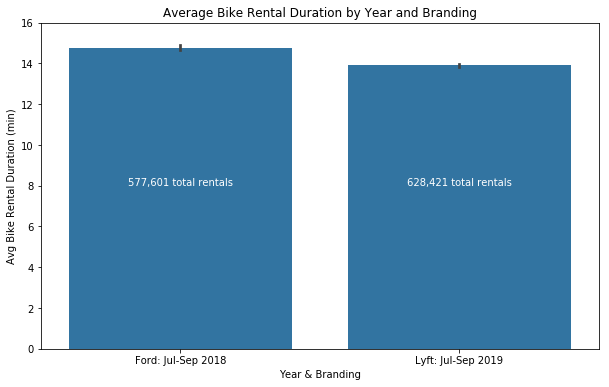

In [230]:
# Next, we'll try a bar plot of average rental duration by Year and Branding
plt.figure(figsize = (10, 6))
base_color = sns.color_palette()[0]

g=sns.barplot(data = bike_clean_compare, x = 'ride_year', y = 'duration_min', color = base_color)
plt.xlabel('Year & Branding')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Year and Branding');
plt.yticks(np.arange(0, 17, 2));

# add annotations to include total rentals
n_points = bike_clean_compare.shape[0]
rental_counts = bike_clean_compare['ride_year'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = rental_counts[int(label.get_text())]
    rental_string = '{:,} total rentals'.format(count)
    # print the annotation just above the top of the bar
    plt.text(loc, 8, rental_string, ha = 'center', color = 'white');

plt.xticks(locs, ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019']);

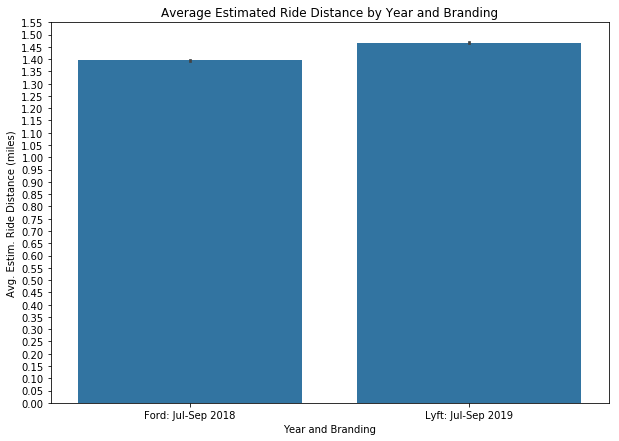

In [231]:
# Next, we'll try a bar plot of average estimated rental distance by Year and Branding
plt.figure(figsize = (10, 7))
base_color = sns.color_palette()[0]
g = sns.barplot(data = bike_clean_compare, x = 'ride_year', y = 'ride_dist_est',color = base_color)
plt.xlabel('Year and Branding')
plt.ylabel('Avg. Estim. Ride Distance (miles)')
plt.yticks(np.arange(0, 1.6, .05))
plt.xticks(locs, labels = ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019'])
plt.title('Average Estimated Ride Distance by Year and Branding');

It appears that so far Lyft rentals on average are slightly shorter in duration than that of Ford's for comparable months in the prior year (~14 min vs ~15 min), yet slightly longer in estimated average ride distance (~1.45 miles vs ~1.40 miles).  As these differences are rather small and the population size is only for 2 months of data, it's hard to say whether they're statistically significant as of yet.  Upon further evidence of such a trend, we can start to then hypothesize on the cause (e.g. perhaps Lyft's app provides better built-in navigation tools allowing for more efficient rides or otherwise attracts more locals as opposed to vacationing tourists etc.)

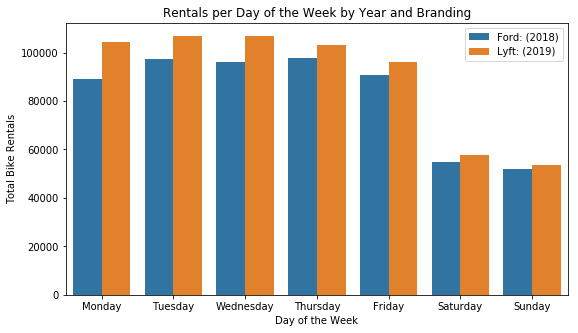

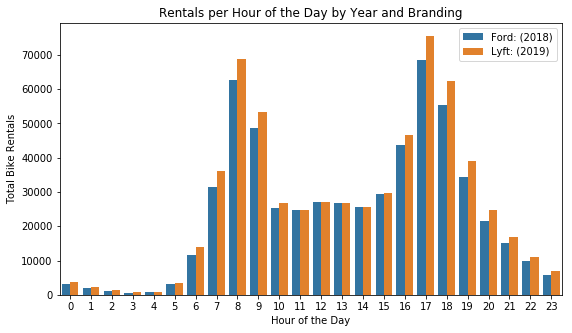

In [145]:
#Let's look at distribution of rides for day of the week by year and branding
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean_compare, x='start_day', hue='ride_year')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Day of the Week by Year and Branding');
plt.legend(loc='upper right',labels=('Ford: (2018)', 'Lyft: (2019)'));

#Let's look at distribution of rides for hour of the day by year and branding
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
             16, 17, 18, 19, 20, 21, 22, 23]
plt.figure(figsize = (9, 5))
sns.countplot(data=bike_clean_compare, x='start_hour', hue='ride_year', order = hour_order )
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Hour of the Day by Year and Branding');
plt.legend(loc='upper right',labels=('Ford: (2018)', 'Lyft: (2019)'));

**Analysis**  
It appears Lyft operations has increased bike ridership for all days of the week and times of the day in 2019 compared to Ford operations the previous year.

## Multivariate Exploration

> Here I'll create plots of three or more variables to investigate the data even
further.

### User Type vs Gender vs Total Rentals / Rental Duration / Ride Distance ###

**Total Rentals**

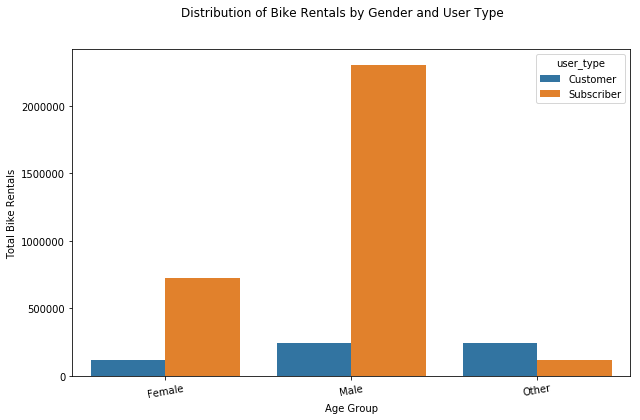

In [146]:
plt.figure(figsize=(10,6))
base_color = sns.color_palette()[0]
sns.countplot(data = bike_clean, x='member_gender', hue = 'user_type');

plt.ylabel('Total Bike Rentals')
plt.xlabel('Age Group')
plt.suptitle('Distribution of Bike Rentals by Gender and User Type')
plt.xticks(rotation = 10);

**Ride Duration**

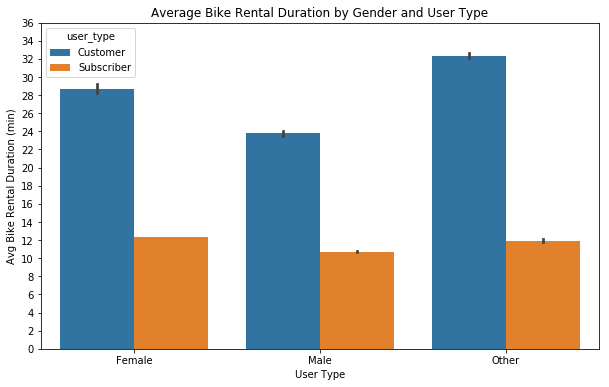

In [147]:
plt.figure(figsize = (10, 6))

g=sns.barplot(data = bike_clean, x = 'member_gender', y = 'duration_min', hue = 'user_type')
plt.xlabel('User Type')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Gender and User Type');
plt.yticks(np.arange(0, 37, 2));

Non-subscribing female customers tend to have the longer average rental durations (~29 min) compared to men (~24 min), meanwhile customers who do not identify their gender have the longest average rental durations of ~32 minutes.  In contrast, subscribers do not differ that much in ride duration.

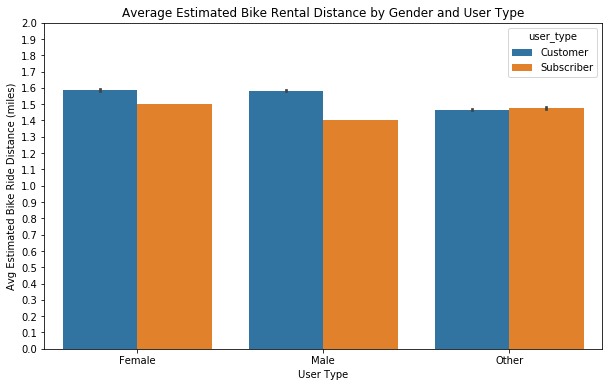

In [148]:
# Next, we'll try a bar plot of average estimated rental distance by Age Group and User Type

plt.figure(figsize = (10, 6))

g=sns.barplot(data = bike_clean, x = 'member_gender', y = 'ride_dist_est', hue = 'user_type')
plt.xlabel('User Type')
plt.ylabel('Avg Estimated Bike Ride Distance (miles)')
plt.title('Average Estimated Bike Rental Distance by Gender and User Type');
plt.yticks(np.arange(0, 2.1, .1));

Overall, there doesn't appear to be a large difference in ride distance between men and women.

### User Type vs Age vs Total Rentals / Rental Duration / Ride Distance ###


**Total Rentals**

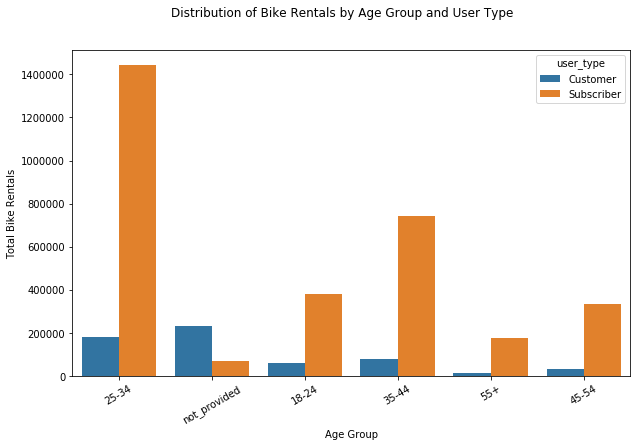

In [149]:
plt.figure(figsize=(10,6))
base_color = sns.color_palette()[0]
sns.countplot(data = bike_clean, x='age_group', hue = 'user_type');

plt.ylabel('Total Bike Rentals')
plt.xlabel('Age Group')
plt.suptitle('Distribution of Bike Rentals by Age Group and User Type')
plt.xticks(rotation = 30);

**Analysis:**  It appears a disproportionate number of non-subscribing customers do not provide their age whereas most subscribers do.  This would make sense as such customers are likely less frequent users or even one time users whom would get less value from establishing a user profile for repeat rentals.
In addition we see a very high number of 25-34 year old subscribers and non-subscribers compared to other groups.

**Rental Duration**

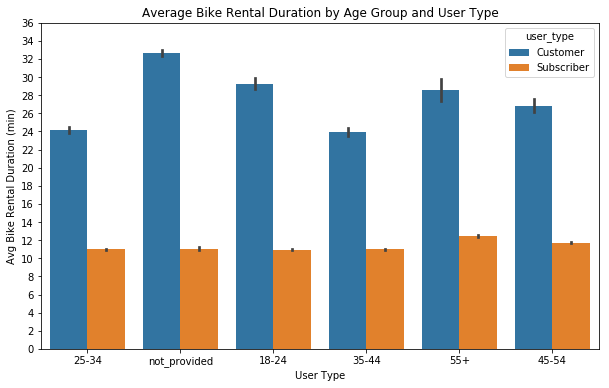

In [150]:
plt.figure(figsize = (10, 6))

g=sns.barplot(data = bike_clean, x = 'age_group', y = 'duration_min', hue = 'user_type')
plt.xlabel('User Type')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Age Group and User Type');
plt.yticks(np.arange(0, 37, 2));

**Analysis:**  As per earlier analysis, rental durations are longest for non-subscribing customers, especially those who do not provide their age (averaging 33 minutes).  Such non-subscribing customers have larger variations in their rental durations for each age group, with the youngest and oldest riders renting relatively longer on average than middle aged riders. Meanwhile, we find that subscribers' rental durations do not vary that greatly regardless of age group.

**Ride Distance**

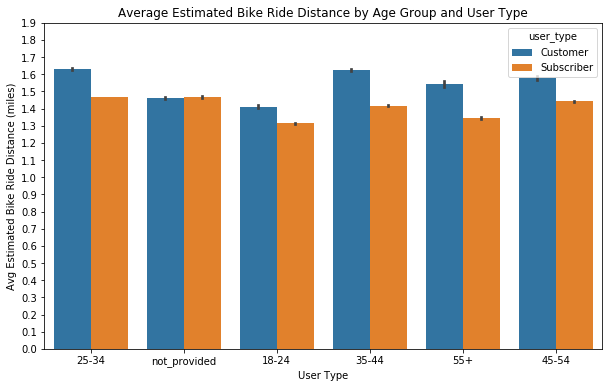

In [151]:
# Next, we'll try a bar plot of average estimated rental distance by Age Group and User Type

plt.figure(figsize = (10, 6))

g=sns.barplot(data = bike_clean, x = 'age_group', y = 'ride_dist_est', hue = 'user_type')
plt.xlabel('User Type')
plt.ylabel('Avg Estimated Bike Ride Distance (miles)')
plt.title('Average Estimated Bike Ride Distance by Age Group and User Type');
plt.yticks(np.arange(0, 2, .1));

**Analysis:** The oldest and youngest riders tend to ride relatively shorter distances than middle aged renters, especially for non-subscribing customers.  This contrasts with the fact that these same customers tend to have the longest rental periods on average -- this all suggests that such customers have a higher percentage of people riding for leisure purposes such as vacation tourism rather than commute purposes.  These customers are taking more circuitous routes and at a slower pace, enjoying the ride itself.

## Gender vs Age vs Total Rentals/Rental Duration/Ride Distance ##

**Total Rentals**

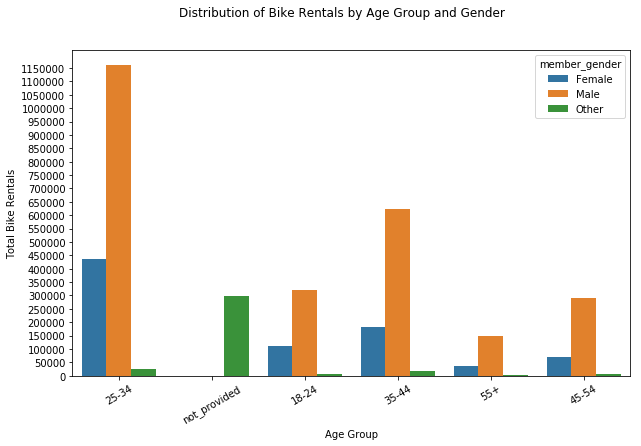

In [153]:
plt.figure(figsize=(10,6))
base_color = sns.color_palette()[0]
sns.countplot(data = bike_clean, x='age_group', hue = 'member_gender');

plt.ylabel('Total Bike Rentals')
plt.xlabel('Age Group')
plt.suptitle('Distribution of Bike Rentals by Age Group and Gender')
plt.xticks(rotation = 30)
plt.yticks(np.arange(0, 1200000, 50000));

Regardless of age group, it appears males are much more likely to rent bikes than women - as high as almost 4 times more rentals for some age groups (i.e. 35-44 and 45-54).

In [154]:
bike_clean.groupby('age_group').member_gender.value_counts()/bike_clean.shape[0] * 100

age_group     member_gender
18-24         Male              8.562891
              Female            2.993474
              Other             0.154484
25-34         Male             31.066144
              Female           11.716603
              Other             0.631904
35-44         Male             16.637686
              Female            4.847681
              Other             0.492459
45-54         Male              7.795958
              Female            1.871708
              Other             0.165937
55+           Male              3.980533
              Female            0.983687
              Other             0.085390
not_provided  Other             8.003774
              Female            0.009393
              Male              0.000294
Name: member_gender, dtype: float64

**Rental Duration**

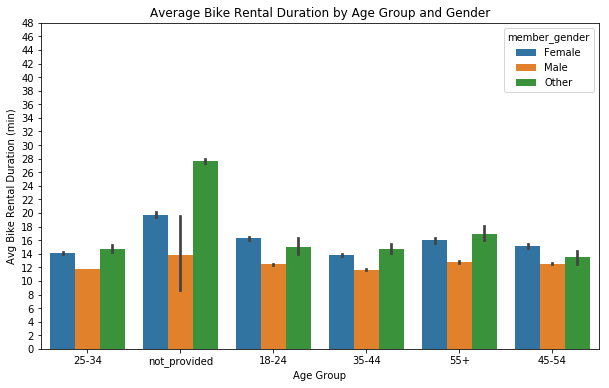

In [155]:
plt.figure(figsize = (10, 6))

g=sns.barplot(data = bike_clean, x = 'age_group', y = 'duration_min', hue = 'member_gender')
plt.xlabel('Age Group')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Age Group and Gender');
plt.yticks(np.arange(0, 50, 2));

Despite renting much less frequently than men, for all age groups, women tend to have slightly longer rental durations than men.

**Ride Distance**

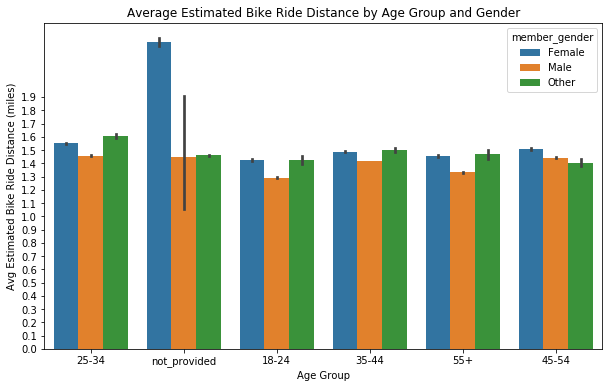

In [156]:
# Next, we'll try a bar plot of average estimated rental distance by Age Group and User Type
plt.figure(figsize = (10, 6))
g=sns.barplot(data = bike_clean, x = 'age_group', y = 'ride_dist_est', hue = 'member_gender')
plt.xlabel('Age Group')
plt.ylabel('Avg Estimated Bike Ride Distance (miles)')
plt.title('Average Estimated Bike Ride Distance by Age Group and Gender');
plt.yticks(np.arange(0, 2, .1));

Despite women renting much less frequently than men, they tend to ride slightly longer distances on average than men for all age groups.  This is consistent with the fact that women also tend to rent for slightly longer durations on average than men for all age groups.

## Company vs User Type vs Total Rentals/Rental Duration/Ride Distance##

**Total Rentals**

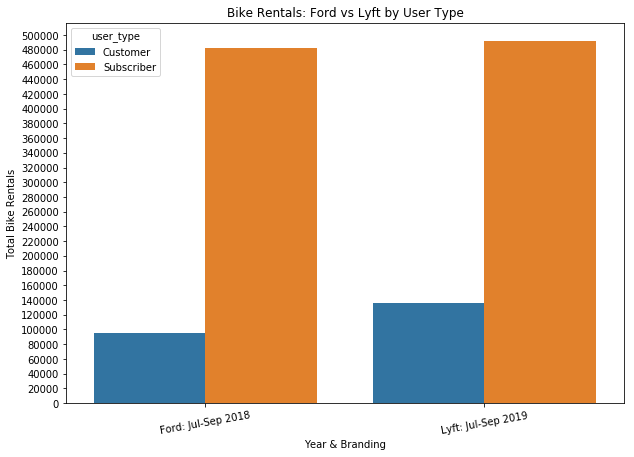

In [222]:
# Now let's compare, starting with total bike rentals
plt.figure(figsize=(10,7))
sns.countplot(data = bike_clean_compare, x='ride_year', hue = 'user_type');

plt.ylabel('Total Bike Rentals')
plt.xlabel('Year & Branding')
plt.title('Bike Rentals: Ford vs Lyft by User Type')
locs, labels = plt.xticks() # get the current tick locations and labels
#plt.suptitle('Distribution of Bike Rentals Summer 2018 vs 2019 (Ford vs Lyft)')
plt.xticks(locs, ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019'], rotation=10)
plt.yticks(np.arange(0, 510000, 20000));

Whereas the number of rentals by subscribers increased slightly between Ford and Lyft's operations, it does appear that Lyft was able to attract many more non-subscribing customers (perhaps first-time riders).

**Rental Duration**

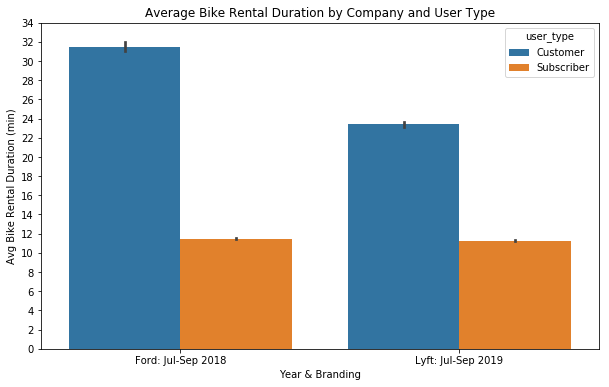

In [218]:
# Next, we'll try a bar plot of average rental duration by Company and User type
plt.figure(figsize = (10, 6))
g=sns.barplot(data = bike_clean_compare, x = 'ride_year', y = 'duration_min', hue='user_type')
plt.xlabel('Year & Branding')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Company and User Type');
plt.yticks(np.arange(0, 36, 2));

# # add annotations to include total rentals
# n_points = bike_clean_compare.shape[0]
# rental_counts = bike_clean_compare['ride_year'].value_counts()
# locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
# for loc, label in zip(locs, labels):
#     # get the text property for the label to get the correct count
#     count = rental_counts[int(label.get_text())]
#     rental_string = '{:,} total rentals'.format(count)
#     # print the annotation just above the top of the bar
#     plt.text(loc, 8, rental_string, ha = 'center', color = 'white');

plt.xticks(locs, ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019']);

Even though the number of non-subscribing customers increased when Lyft began sole operation of the bike share program, the average duration of their rentals decreased measurably from ~31 minutes to ~24 minutes.  Because a single ride is the same price for up to 30 minutes, it's difficult to say whether the changes in ridership increased or decreased the overall revenue. (greater ridership but slighlty less revenue per rental).  In addition, it's not clear how many of these non-subscribing customers purchase a day pass (for unlimited 30-min rentals) versus a single ride pass (for up to 30 minutes) each of which charge a $3/15-min surcharge beyond single usages beyond 30 minutes.

**Ride Distance**

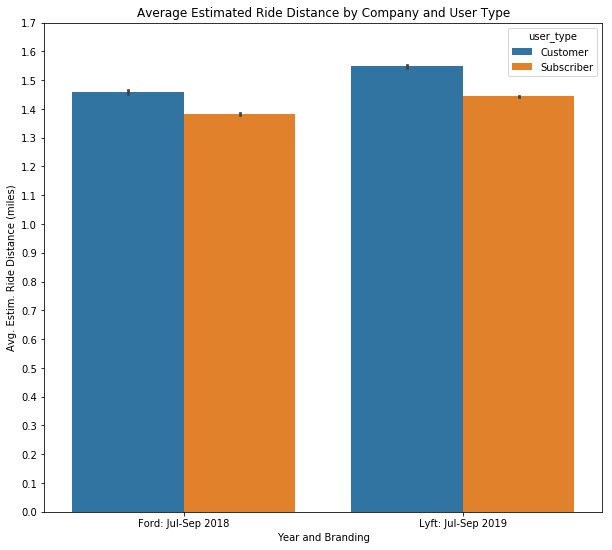

In [217]:
# Next, we'll try a bar plot of average estimated rental distance by Year and Branding
plt.figure(figsize = (10, 9))
g = sns.barplot(data = bike_clean_compare, x = 'ride_year', y = 'ride_dist_est', hue = 'user_type')
plt.xlabel('Year and Branding')
plt.ylabel('Avg. Estim. Ride Distance (miles)')
plt.yticks(np.arange(0, 1.8, .1))
plt.xticks(locs, labels = ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019'])
plt.title('Average Estimated Ride Distance by Company and User Type');

Unexpectedy, despite riding several minutes less on average with Lyft than Ford, non-subscribing customers are actually riding slightly further estimated distances on average.  My guess is this is because customers were riding slower and in more circuitous routes with Ford than with Lyft.  

## Company vs Gender vs Total Rentals/Rental Duration/Ride Distance##

**Total Rentals**

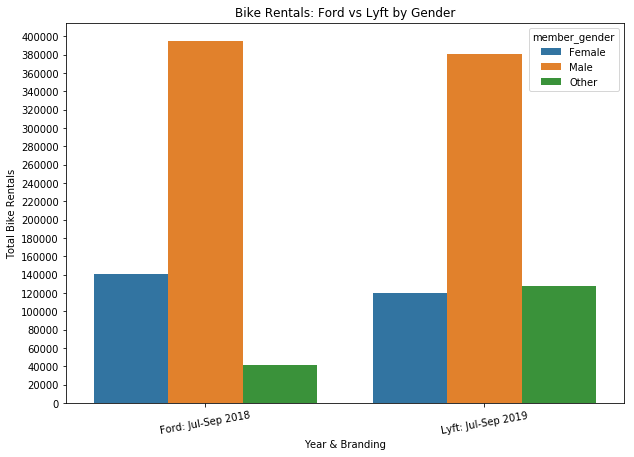

In [223]:
# Now let's compare, starting with total bike rentals
plt.figure(figsize=(10,7))
sns.countplot(data = bike_clean_compare, x='ride_year', hue = 'member_gender');

plt.ylabel('Total Bike Rentals')
plt.xlabel('Year & Branding')
plt.title('Bike Rentals: Ford vs Lyft by Gender')
locs, labels = plt.xticks() # get the current tick locations and labels
#plt.suptitle('Distribution of Bike Rentals Summer 2018 vs 2019 (Ford vs Lyft)')
plt.xticks(locs, ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019'], rotation=10)
plt.yticks(np.arange(0, 410000, 20000));

It looks like the increase in ridership from Ford to Lyft operation is solely attributable to customers who either don't provide their gender or otherwise identify as 'Other' -- again largely comprising non-subscribing customers.

**Rental Duration**

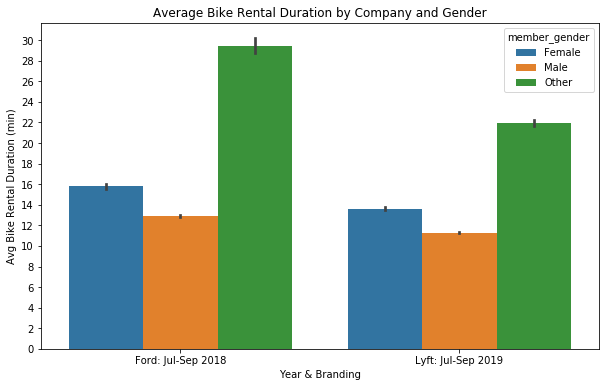

In [227]:
# Next, we'll try a bar plot of average rental duration by Company and User type
plt.figure(figsize = (10, 6))
g=sns.barplot(data = bike_clean_compare, x = 'ride_year', y = 'duration_min', hue='member_gender')
plt.xlabel('Year & Branding')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Company and Gender');
plt.yticks(np.arange(0, 32, 2));

# # add annotations to include total rentals
# n_points = bike_clean_compare.shape[0]
# rental_counts = bike_clean_compare['ride_year'].value_counts()
# locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
# for loc, label in zip(locs, labels):
#     # get the text property for the label to get the correct count
#     count = rental_counts[int(label.get_text())]
#     rental_string = '{:,} total rentals'.format(count)
#     # print the annotation just above the top of the bar
#     plt.text(loc, 8, rental_string, ha = 'center', color = 'white');

plt.xticks(locs, ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019']);

For all gender identification groups, rentals were for shorter periods under Lyft than with Ford the previous year.  For both companies, rentals were longer on average for women than men, and longest for those who either didn't provide their gender or identify as 'other'.

**Ride Distance**

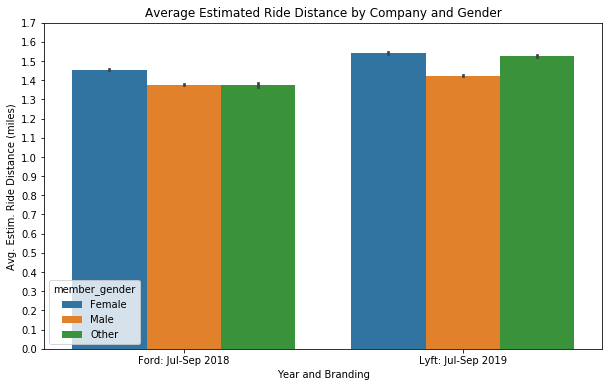

In [228]:
# Next, we'll try a bar plot of average estimated ride distance by Year and Branding
plt.figure(figsize = (10, 6))
g = sns.barplot(data = bike_clean_compare, x = 'ride_year', y = 'ride_dist_est', hue = 'member_gender')
plt.xlabel('Year and Branding')
plt.ylabel('Avg. Estim. Ride Distance (miles)')
plt.yticks(np.arange(0, 1.8, .1))
plt.xticks(locs, labels = ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019'])
plt.title('Average Estimated Ride Distance by Company and Gender');

The average estimated ride distances are slightly longer for all gender groups with Lyft than with Ford, this is in contrast to the fact that their rental periods are in fact on average slightly shorter with Lyft than with Ford.

## Company vs Age Group vs Total Rentals/Rental Duration/Ride Distance##

**Total Rentals**

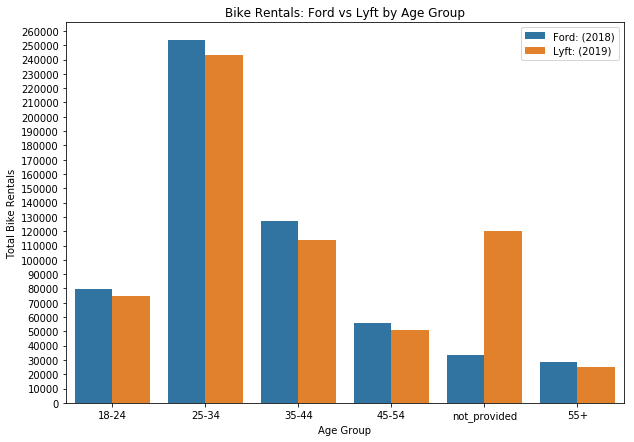

In [211]:
# Now let's compare, starting with total bike rentals
plt.figure(figsize=(10,7))
sns.countplot(data = bike_clean_compare, x='age_group', hue = 'ride_year');

plt.ylabel('Total Bike Rentals')
plt.xlabel('Age Group')
#plt.xlabel('Year & Branding')
plt.title('Bike Rentals: Ford vs Lyft by Age Group')
locs, labels = plt.xticks() # get the current tick locations and labels
#plt.suptitle('Distribution of Bike Rentals Summer 2018 vs 2019 (Ford vs Lyft)')
#plt.xticks(locs, ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019'], rotation=10)
plt.yticks(np.arange(0, 270000, 10000))
plt.legend(loc='upper right',labels=('Ford: (2018)', 'Lyft: (2019)'));

It appears, the growth in Lyft's ridership does not have metrics on age group.  This is a similar finding to the fact that same growth in ridership doesn't have metrics on gender or otherwise the users identified as 'other'.

**Rental Duration**

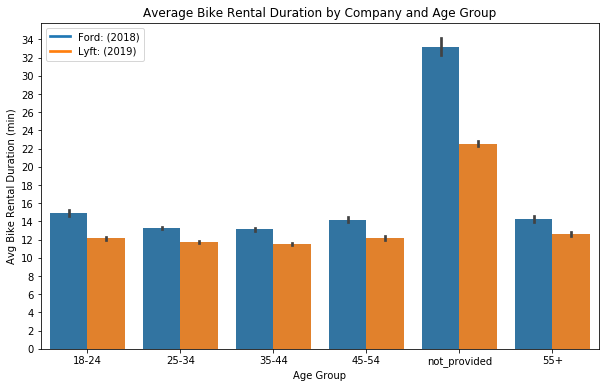

In [164]:
# Next, we'll try a bar plot of average rental duration by Company and Age Group
plt.figure(figsize = (10, 6))
g=sns.barplot(data = bike_clean_compare, x = 'age_group', y = 'duration_min', hue='ride_year')
plt.xlabel('Age Group')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Company and Age Group');
plt.yticks(np.arange(0, 35, 2));
plt.legend(loc='upper left',labels=('Ford: (2018)', 'Lyft: (2019)'))
ford_color = sns.color_palette()[0]
lyft_color = sns.color_palette()[1]
leg = g.get_legend()
leg.legendHandles[0].set_color(ford_color)
leg.legendHandles[1].set_color(lyft_color);

**Ride Distance**

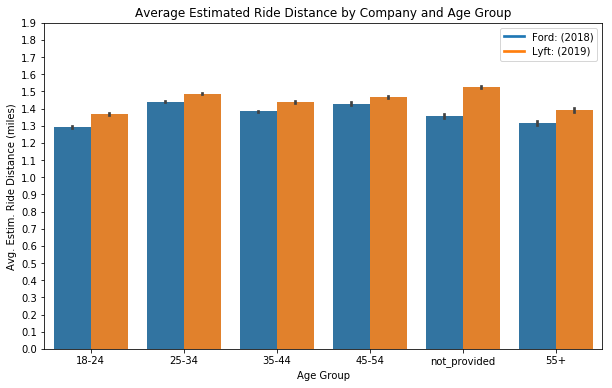

In [165]:
# Next, we'll try a bar plot of average estimated rental distance by Year and Branding
plt.figure(figsize = (10, 6))
g = sns.barplot(data = bike_clean_compare, x = 'age_group', y = 'ride_dist_est', hue = 'ride_year')
plt.xlabel('Age Group')
plt.ylabel('Avg. Estim. Ride Distance (miles)')
plt.yticks(np.arange(0, 2.0, .1))
plt.title('Average Estimated Ride Distance by Company and Age Group')
ford_color = sns.color_palette()[0]
lyft_color = sns.color_palette()[1]
g.legend(loc='upper right',labels=('Ford: (2018)', 'Lyft: (2019)'))
leg = g.get_legend()
leg.legendHandles[0].set_color(ford_color)
leg.legendHandles[1].set_color(lyft_color);

In [166]:
bike_clean.columns

Index(['duration_min', 'ride_dist_est', 'ride_year', 'ride_month', 'start_day',
       'end_day', 'start_hour', 'end_hour', 'start_station_name',
       'end_station_name', 'member_gender', 'member_age', 'user_type',
       'bike_share_for_all_trip', 'start_station_id', 'end_station_id',
       'duration_sec', 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'bike_id', 'member_birth_year', 'ride_dist',
       'start_srv_area', 'end_srv_area', 'age_group'],
      dtype='object')

Average rental durations were longer for all age groups under Ford than Lyft, however the average estimated ride distance was further under Lyft than Ford for all age groups.  This is inline with what we witnessed when analyzing the different gender groups -- all genders rode further distances on average under Lyft despite riding for shorter durations.

## Company vs Service Area vs Total Rentals/ Rental Duration/ Ride Distance ##

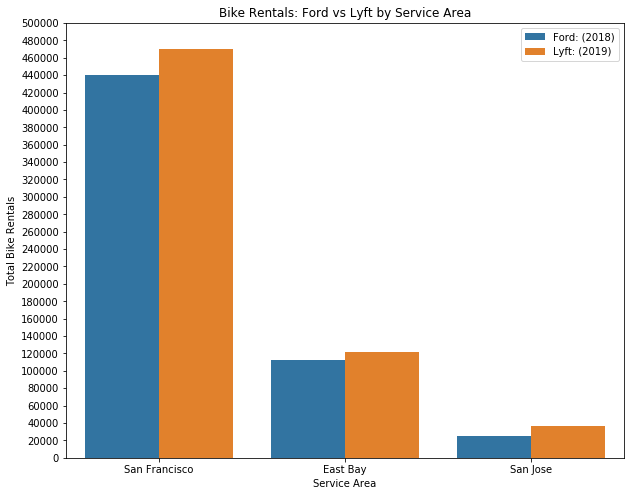

In [207]:
# Now let's compare, starting with total bike rentals
plt.figure(figsize=(10,8))
sns.countplot(data = bike_clean_compare, x='start_srv_area', hue = 'ride_year');
plt.ylabel('Total Bike Rentals')
plt.xlabel('Service Area')
#plt.xlabel('Year & Branding')
plt.title('Bike Rentals: Ford vs Lyft by Service Area')
locs, labels = plt.xticks() # get the current tick locations and labels
#plt.suptitle('Distribution of Bike Rentals Summer 2018 vs 2019 (Ford vs Lyft)')
#plt.xticks(locs, ['Ford: Jul-Sep 2018', 'Lyft: Jul-Sep 2019'], rotation=10)
plt.yticks(np.arange(0, 520000, 20000))
plt.legend(loc='upper right',labels=('Ford: (2018)', 'Lyft: (2019)'));

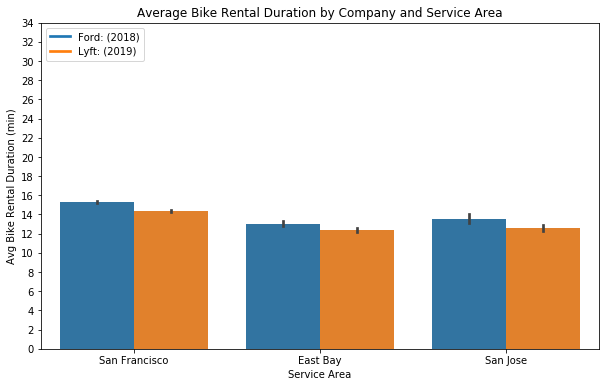

In [168]:
# Next, we'll try a bar plot of average rental duration by Company and Age Group
plt.figure(figsize = (10, 6))
g=sns.barplot(data = bike_clean_compare, x = 'start_srv_area', y = 'duration_min', hue='ride_year')
plt.xlabel('Service Area')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Company and Service Area');
plt.yticks(np.arange(0, 35, 2));
plt.legend(loc='upper left',labels=('Ford: (2018)', 'Lyft: (2019)'))
ford_color = sns.color_palette()[0]
lyft_color = sns.color_palette()[1]
leg = g.get_legend()
leg.legendHandles[0].set_color(ford_color)
leg.legendHandles[1].set_color(lyft_color);

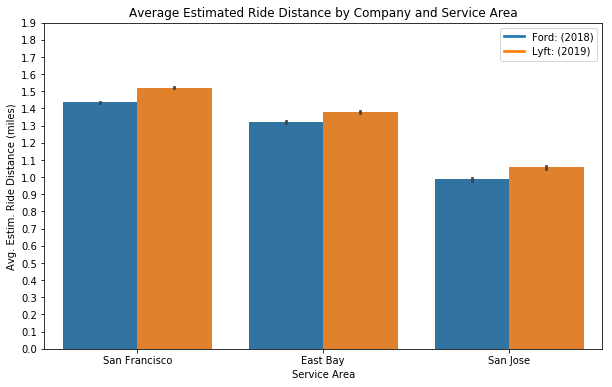

In [169]:
# Next, we'll try a bar plot of average estimated rental distance by Year and Branding
plt.figure(figsize = (10, 6))
g = sns.barplot(data = bike_clean_compare, x = 'start_srv_area', y = 'ride_dist_est', hue = 'ride_year')
plt.xlabel('Service Area')
plt.ylabel('Avg. Estim. Ride Distance (miles)')
plt.yticks(np.arange(0, 2.0, .1))
plt.title('Average Estimated Ride Distance by Company and Service Area')
ford_color = sns.color_palette()[0]
lyft_color = sns.color_palette()[1]
g.legend(loc='upper right',labels=('Ford: (2018)', 'Lyft: (2019)'))
leg = g.get_legend()
leg.legendHandles[0].set_color(ford_color)
leg.legendHandles[1].set_color(lyft_color);

In [170]:
bike_clean.columns

Index(['duration_min', 'ride_dist_est', 'ride_year', 'ride_month', 'start_day',
       'end_day', 'start_hour', 'end_hour', 'start_station_name',
       'end_station_name', 'member_gender', 'member_age', 'user_type',
       'bike_share_for_all_trip', 'start_station_id', 'end_station_id',
       'duration_sec', 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'bike_id', 'member_birth_year', 'ride_dist',
       'start_srv_area', 'end_srv_area', 'age_group'],
      dtype='object')

In [171]:
bike_clean.duration_min.quantile(.98)

48.11666666666667

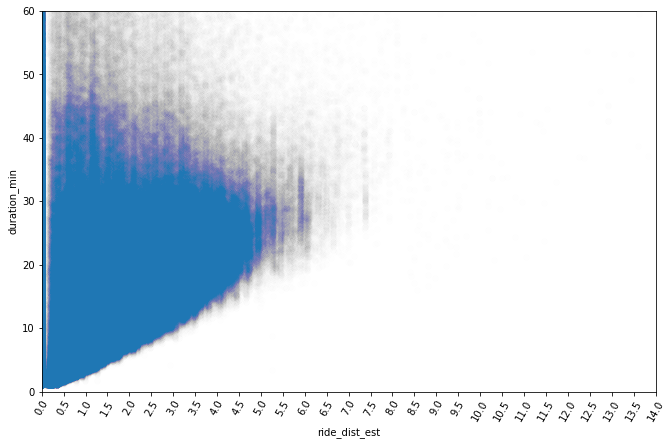

In [204]:
plt.figure(figsize = (11, 7))
sns.regplot(data=bike_clean, y ='duration_min', x = 'ride_dist_est', fit_reg = False, scatter_kws = {'alpha' : 1/200})
plt.xticks(np.arange(0,14.5, 0.5), rotation = 60)
plt.xlim(0, 14)
plt.ylim(0, 60);

As expected, there is a positive correlation between ride distance and the duration of the rental, that said it doesn't look like ride distance is the sole factor in determining rental duration given there are plenty of rentals that are for very short distances but very long durations.

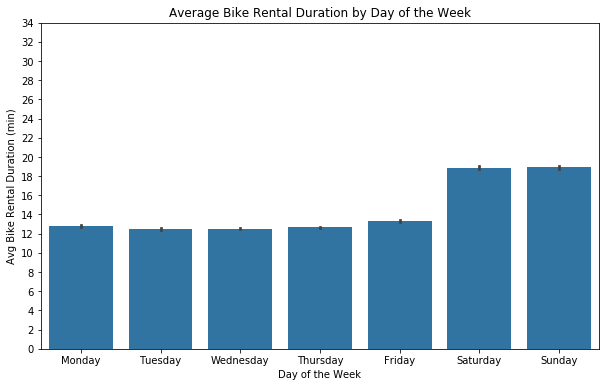

In [172]:
# Next, we'll try a bar plot of average rental duration by day of the week
plt.figure(figsize = (10, 6))
base_color = sns.color_palette()[0]
g=sns.barplot(data = bike_clean, x = 'start_day', y = 'duration_min', color=base_color)
plt.xlabel('Day of the Week')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Day of the Week');
plt.yticks(np.arange(0, 35, 2));

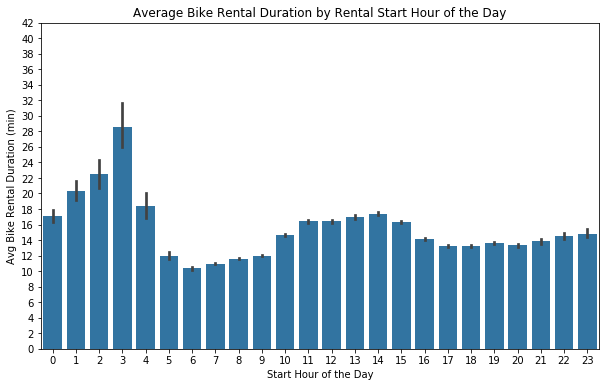

In [173]:
# Next, we'll try a bar plot of average rental duration by day of the week
plt.figure(figsize = (10, 6))
base_color = sns.color_palette()[0]
g=sns.barplot(data = bike_clean, x = 'start_hour', y = 'duration_min', color=base_color)
plt.xlabel('Start Hour of the Day')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by Rental Start Hour of the Day');
plt.yticks(np.arange(0, 44, 2));

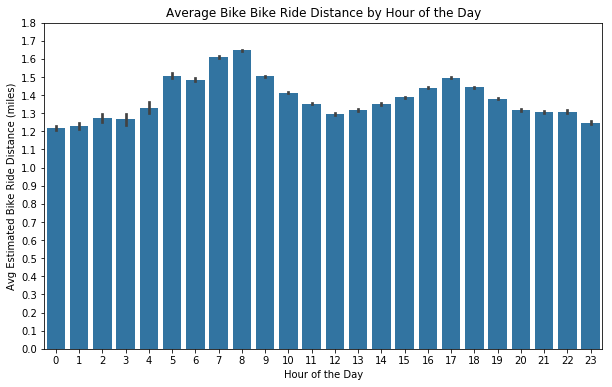

In [174]:
# Next, we'll try a bar plot of average rental duration by day of the week
plt.figure(figsize = (10, 6))
base_color = sns.color_palette()[0]
g=sns.barplot(data = bike_clean, x = 'start_hour', y = 'ride_dist_est', color=base_color)
plt.xlabel('Hour of the Day')
plt.ylabel('Avg Estimated Bike Ride Distance (miles)')
plt.title('Average Bike Bike Ride Distance by Hour of the Day');
plt.yticks(np.arange(0, 1.9, .1));

In [175]:
bike_twilight = bike_clean.query('start_hour >= 0 and start_hour <= 4')

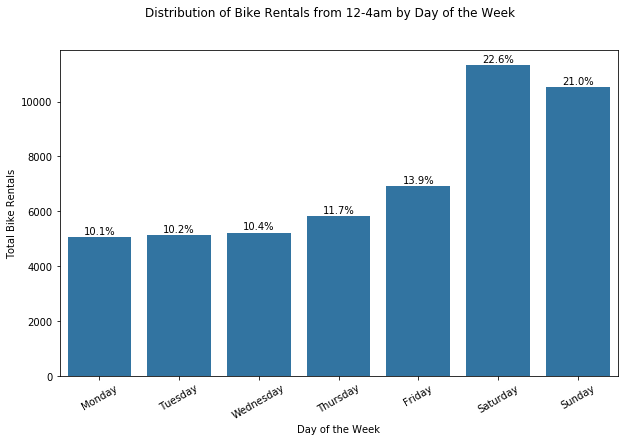

In [176]:
plt.figure(figsize=(10,6))
base_color = sns.color_palette()[0]
sns.countplot(data = bike_twilight, x='start_day', color = base_color);

plt.ylabel('Total Bike Rentals')
plt.xlabel('Day of the Week')
plt.suptitle('Distribution of Bike Rentals from 12-4am by Day of the Week')
plt.xticks(rotation = 30);

# add annotations
n_points = bike_twilight.shape[0]
day_counts = bike_twilight['start_day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, count+100, pct_string, ha = 'center', color = 'black')

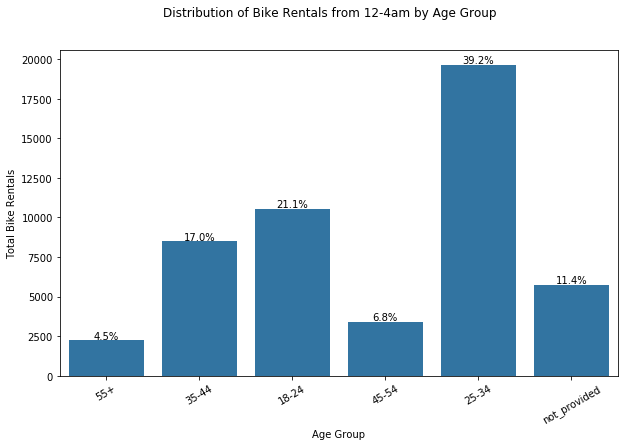

In [177]:
plt.figure(figsize=(10,6))
base_color = sns.color_palette()[0]
sns.countplot(data = bike_twilight, x='age_group', color = base_color);

plt.ylabel('Total Bike Rentals')
plt.xlabel('Age Group')
plt.suptitle('Distribution of Bike Rentals from 12-4am by Age Group')
plt.xticks(rotation = 30);

# add annotations
n_points = bike_twilight.shape[0]
age_counts = bike_twilight['age_group'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = age_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, count+100, pct_string, ha = 'center', color = 'black')

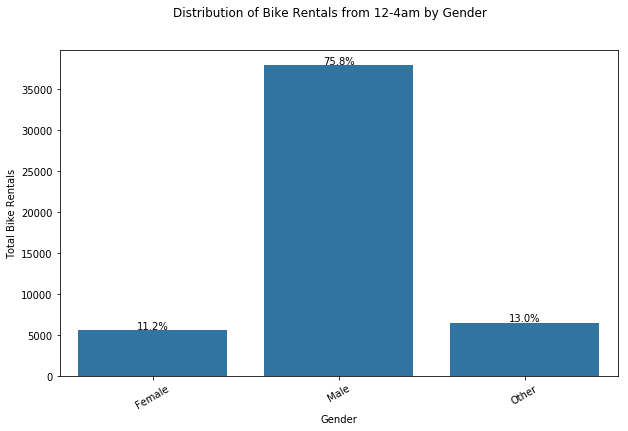

In [178]:
plt.figure(figsize=(10,6))
base_color = sns.color_palette()[0]
sns.countplot(data = bike_twilight, x='member_gender', color = base_color);

plt.ylabel('Total Bike Rentals')
plt.xlabel('Gender')
plt.suptitle('Distribution of Bike Rentals from 12-4am by Gender')
plt.xticks(rotation = 30);

# add annotations
n_points = bike_twilight.shape[0]
gender_counts = bike_twilight['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, count+100, pct_string, ha = 'center', color = 'black')

Something interesting is happening during the early hours of the morning (between 12-4am).  These times represent the longest rental durations on average, yet these same hours of the day also correspond to the shortest average ride distances.  This was a curious phenomenon I felt worthy of exploring further to better understand what exactly is happening with Lyft Bike rentals during these hours.  
Looking closer at the data, it appears the majority of such late night rentals are in fact occuring on Thursday, Friday, and Saturday late nights, so perhaps these rentals correspond to people riding home after a late night out of drinking and hence the riders are taking their time due to both the low visibility at night and possible impairment from alcohol consumption.  Further corroborating my theory is the fact that the large majority (61%) of such late night rentals are by customers between the ages of 18-34 (~61%) and 78% if we expand to that age group to 18-44 years olds -- the prime years for late night outings.  In addition, we find the vast majority (~77%) of such rentals are by males, which makes some sense as it's probably not as safe for women to be cycling around in the middle of the night.

It may be worth exploring this trend further in terms of perhaps directing such customers to instead take alternate means of transportation (e.g. Lyft car rides) so as to avoid potential CUI convictions (Cycling Under the Influence), for which if you are under 21 you may have your driver's license revoked for a year.

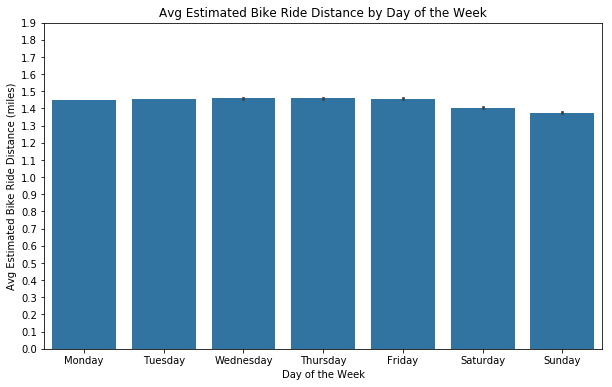

In [179]:
# Next, we'll try a bar plot of average rental duration by day of the week
plt.figure(figsize = (10, 6))
base_color = sns.color_palette()[0]
g=sns.barplot(data = bike_clean, x = 'start_day', y = 'ride_dist_est', color=base_color)
plt.xlabel('Day of the Week')
plt.ylabel('Avg Estimated Bike Ride Distance (miles)')
plt.title('Avg Estimated Bike Ride Distance by Day of the Week');
plt.yticks(np.arange(0, 2, .1));

As might be expected, rentals on weekends are on average longer in duration.  At the same time however, weekend bike rentals appear to be on average slightly shorter in distance.

### Trends over time ###

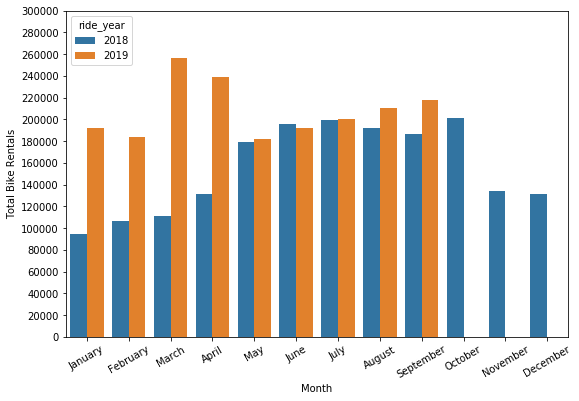

In [180]:
#Let's analyze ridership growth for the last 21 months
plt.figure(figsize = (9, 6))
sns.countplot(data=bike_clean, x='ride_month', hue='ride_year')# color=base_color)
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.yticks(np.arange(0, 320000, 20000));

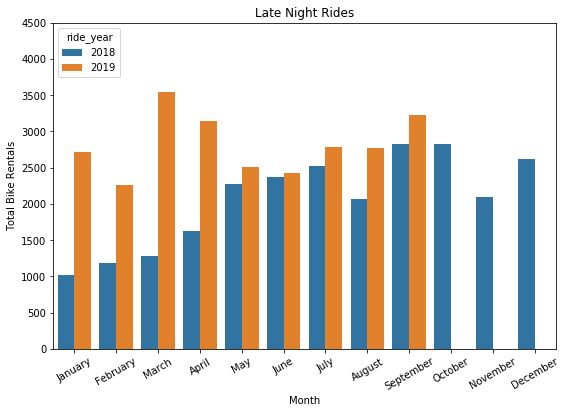

In [181]:
# Now let's analyze ridership growth for late night rides over the last 21 months
#It appears late night riding has increased every calendar month year over year
plt.figure(figsize = (9, 6))
sns.countplot(data=bike_twilight, x='ride_month', hue='ride_year')# color=base_color)
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.yticks(np.arange(0, 5000, 500))
plt.title('Late Night Rides');

In [183]:
#We'll create a dataframe for only the overlapping months between 2018-2019 for a true year-over-year comparison
overlap_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
bike_yoy = bike_clean[bike_clean.ride_month.isin(overlap_months)]
bike_yoy.reset_index(inplace=True, drop = True)

In [184]:
sample_2 = np.random.choice(bike_yoy.shape[0], 50000, replace=False)
bike_yoy_sample = bike_yoy.loc[sample_2, :]
bike_yoy_sample.reset_index(inplace=True, drop = True)

In [185]:
bike_yoy_sample.ride_month.isnull().any()

False

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


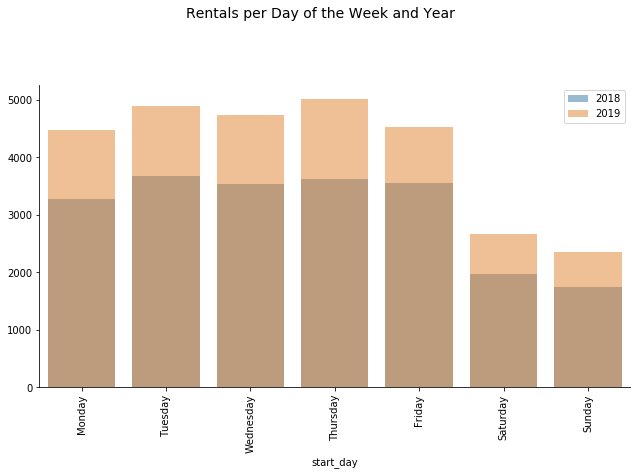

In [186]:
# Let's break down that year-over-year growth by day of the week
g = sns.FacetGrid(data = bike_yoy_sample, hue = 'ride_year', height=6, aspect = 6/4)
g.map(sns.countplot, 'start_day', alpha = .5)
g.set_xticklabels(rotation=90)
#g.add_legend()
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Rentals per Day of the Week and Year', size=14);
#plt.yticks(np.arange(0, 230000, 10000));
#plt.title('Rentals per Month and Year by Gender', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


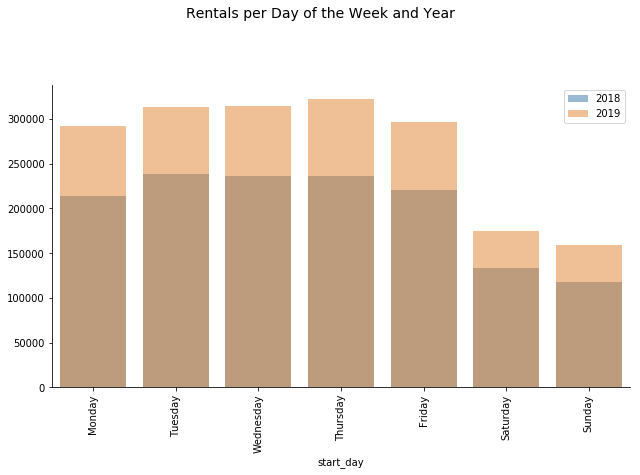

In [187]:
# Let's break down that year-over-year growth by day of the week
g = sns.FacetGrid(data = bike_yoy, hue = 'ride_year', height=6, aspect = 6/4)
g.map(sns.countplot, 'start_day', alpha = .5)
g.set_xticklabels(rotation=90)
#g.add_legend()
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Rentals per Day of the Week and Year', size=14);
#plt.yticks(np.arange(0, 230000, 10000));
#plt.title('Rentals per Month and Year by Gender', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


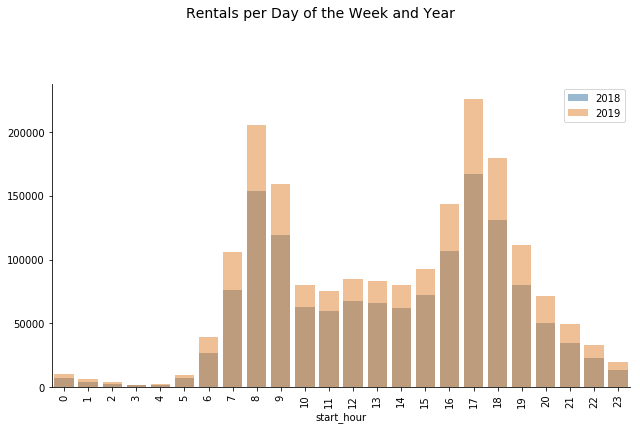

In [188]:
# Let's break down that year-over-year growth by hour of the day
g = sns.FacetGrid(data = bike_yoy, hue = 'ride_year', height=6, aspect = 6/4)
g.map(sns.countplot, 'start_hour', alpha = .5)
g.set_xticklabels(rotation=90)
#g.add_legend()
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Rentals per Day of the Week and Year', size=14);
#plt.yticks(np.arange(0, 230000, 10000));
#plt.title('Rentals per Month and Year by Gender', size=14);

For overlapping months between 2018 and 2019, it looks like ridership has grown the most for commuters as exhibited by the most marked growth of bike rentals on workdays and during commute hours.

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


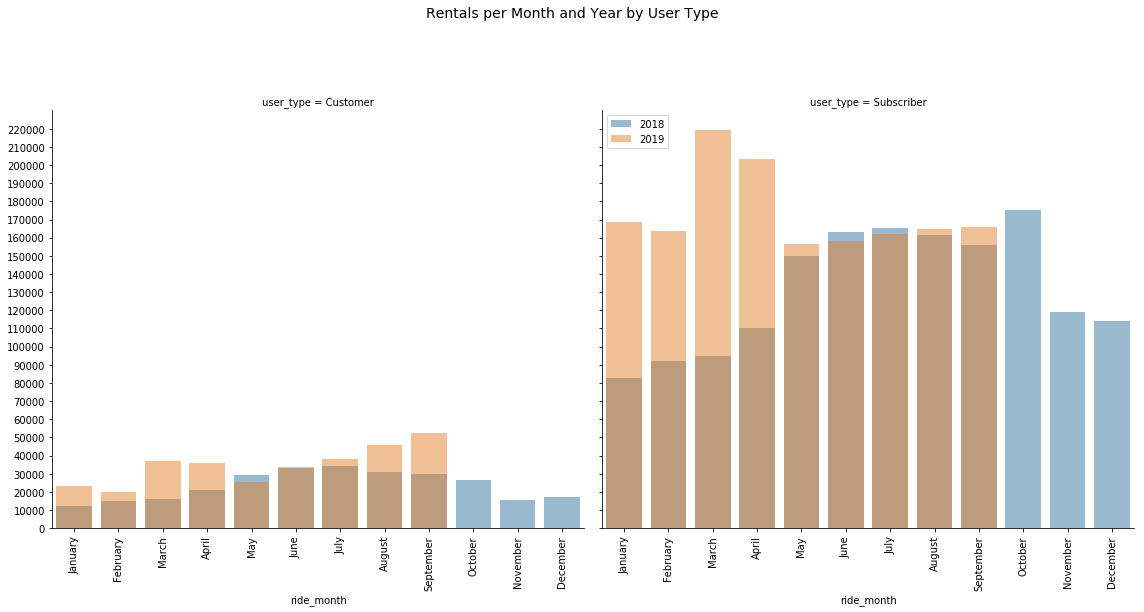

In [203]:
# Let's break down that year-over-year growth by User Type:
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='user_type', height=8, aspect = 6/6)
g.map(sns.countplot, 'ride_month', alpha = .5)
g.set_xticklabels(rotation=90)
#g.add_legend()
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Rentals per Month and Year by User Type', size=14)
plt.yticks(np.arange(0, 230000, 10000));
#plt.title('Rentals per Month and Year by Gender', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


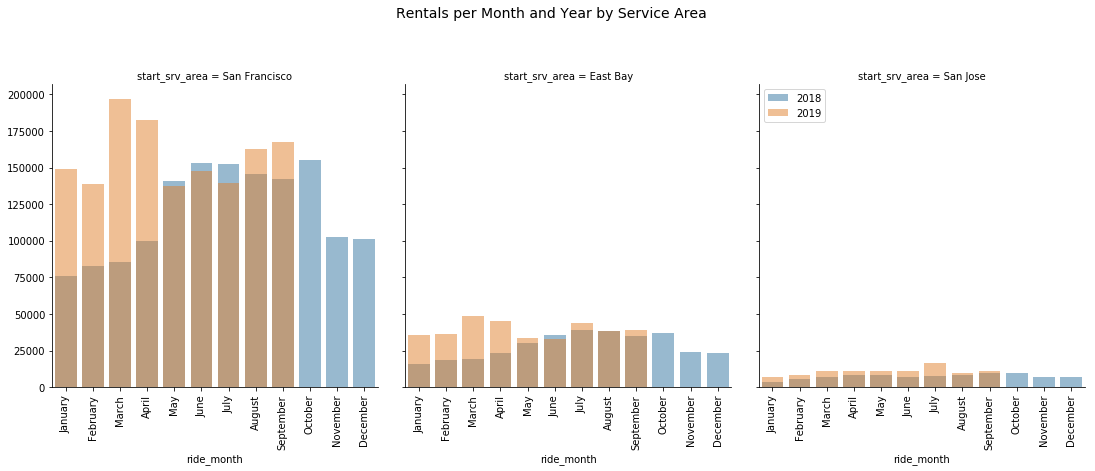

In [191]:
# Next we'll look at Service Area 
# The vast majority of rentals are returned in the same service area (hefty charge if not) so can just use starting service area
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='start_srv_area', col_wrap = 3, height=6, aspect = 6/7)
g.map(sns.countplot, 'ride_month', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Rentals per Month and Year by Service Area', size=14);

It appears the lack of ebikes in late April to early June primarily affected San Francisco, which makes sense given there are relatively many more hills in San Francisco which might require an electric assisted bike to traverse

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


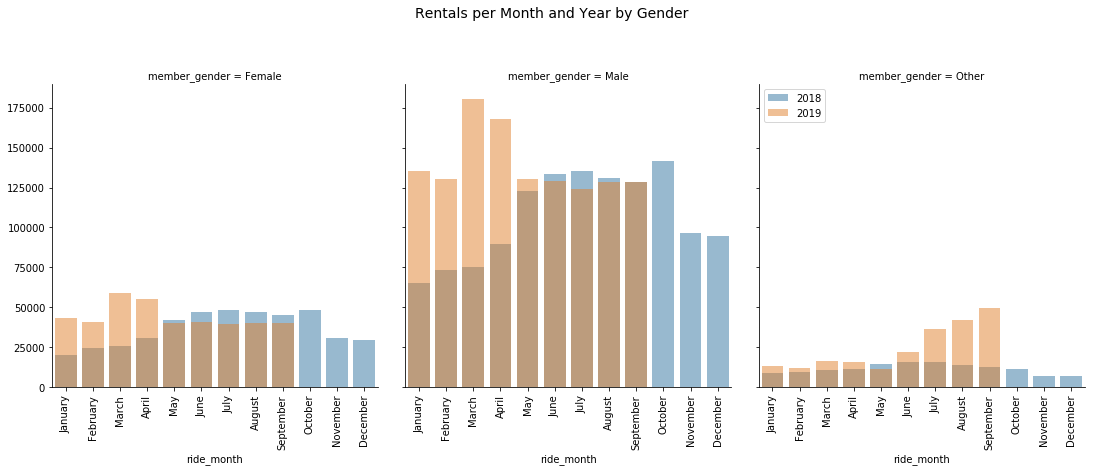

In [192]:
#Next we'll look at Gender
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='member_gender', col_wrap = 3, height=6, aspect = 6/7)
g.map(sns.countplot, 'ride_month', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Rentals per Month and Year by Gender', size=14);
#plt.title('Rentals per Month and Year by Gender', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


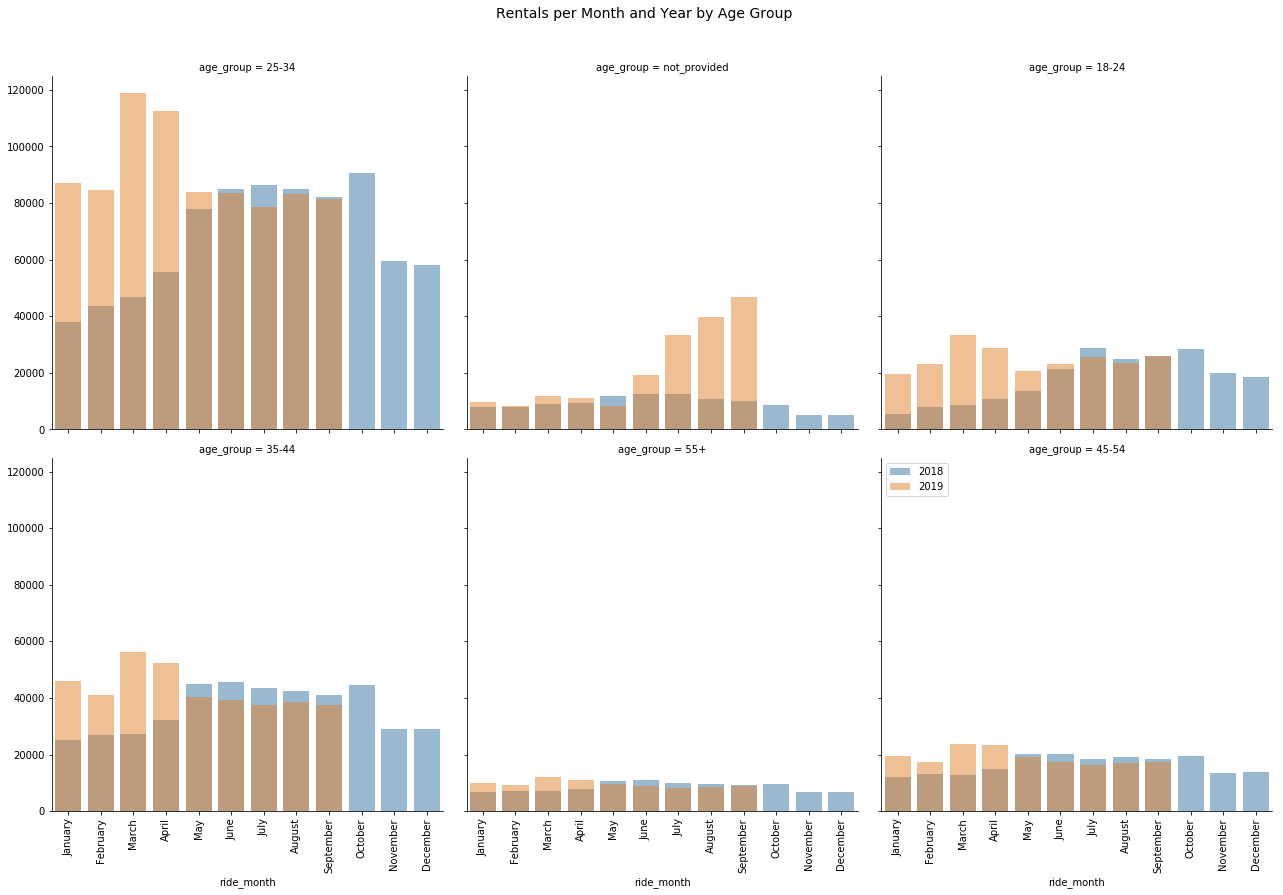

In [193]:
#Next we'll look at Age Group
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='age_group', col_wrap = 3, height=6, aspect = 6/6)
g.map(sns.countplot, 'ride_month', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.suptitle('Rentals per Month and Year by Age Group', size=14)
g.fig.subplots_adjust(top=.9)

**Rental Durations**

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


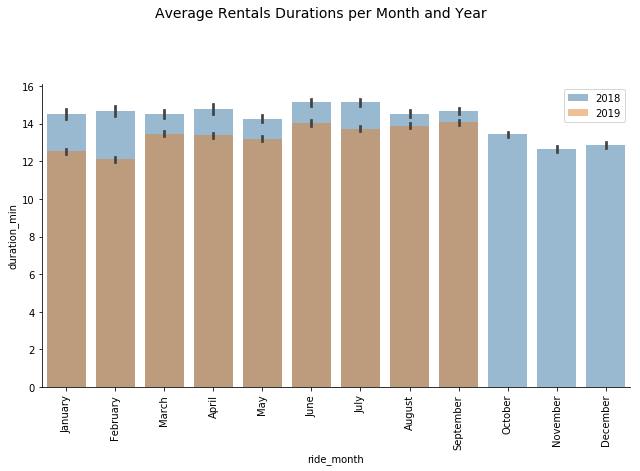

In [194]:
#Let's analyze the trend in average rental durations for the last 20 months
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', height=6, aspect = 9/6)
g.map(sns.barplot, 'ride_month', 'duration_min', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Average Rentals Durations per Month and Year', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


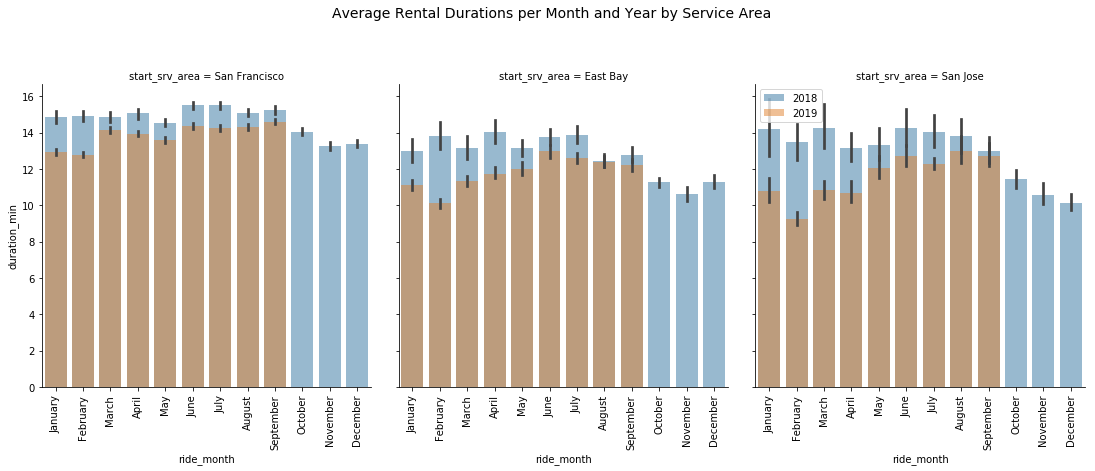

In [195]:
#Let's breakdown the trend in average rental durations by a 3rd variable, starting with Service Area
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='start_srv_area', col_wrap = 3, height=6, aspect = 6/7)
g.map(sns.barplot, 'ride_month', 'duration_min', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Average Rental Durations per Month and Year by Service Area', size=14);

Across all service territories it appears rental durations have decreased over the last year.

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


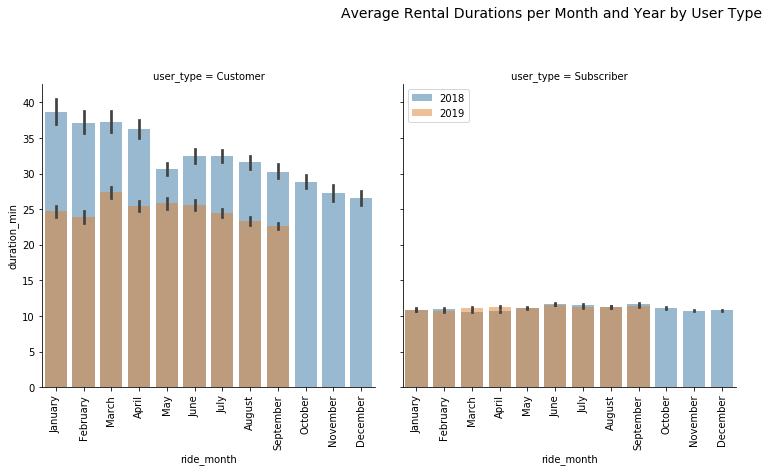

In [196]:
#Let's breakdown the trend in average rental durations by user_type
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='user_type', col_wrap = 3, height=6, aspect = 6/7)
g.map(sns.barplot, 'ride_month', 'duration_min', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Average Rental Durations per Month and Year by User Type', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


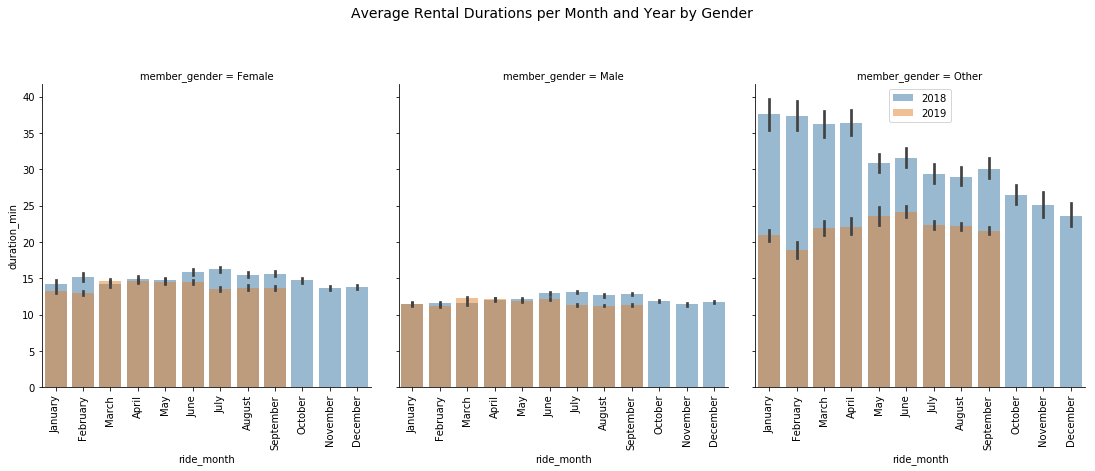

In [197]:
#Let's breakdown the trend in average rental durations by Gender
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='member_gender', col_wrap = 3, height=6, aspect = 6/7)
g.map(sns.barplot, 'ride_month', 'duration_min', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Average Rental Durations per Month and Year by Gender', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


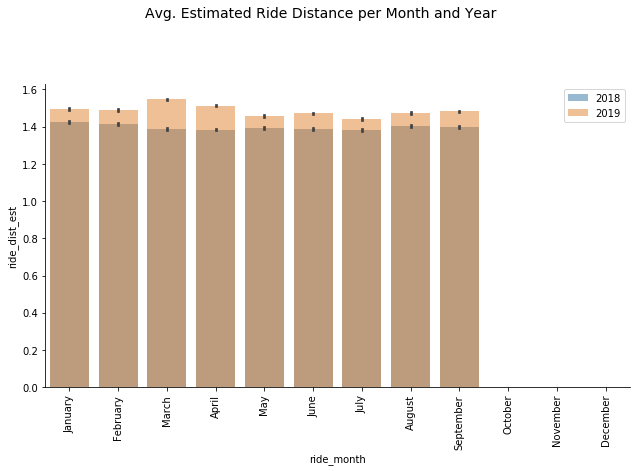

In [198]:
g = sns.FacetGrid(data = bike_yoy, hue = 'ride_year', height=6, aspect = 9/6)
g.map(sns.barplot, 'ride_month', 'ride_dist_est', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Avg. Estimated Ride Distance per Month and Year', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


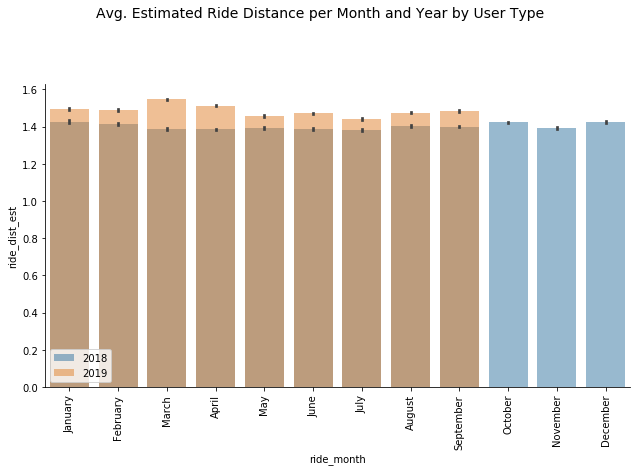

In [199]:
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', height=6, aspect = 9/6)
g.map(sns.barplot, 'ride_month', 'ride_dist_est', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Avg. Estimated Ride Distance per Month and Year by User Type', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


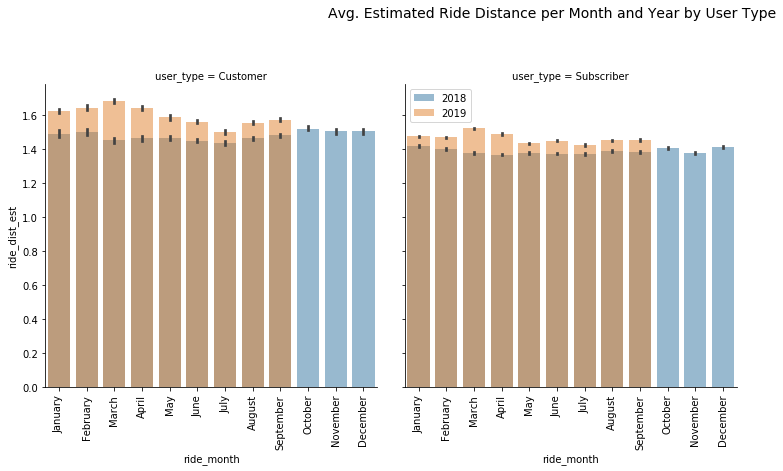

In [200]:
#Let's break that trend down by User Type
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='user_type', col_wrap = 3, height=6, aspect = 6/7)
g.map(sns.barplot, 'ride_month', 'ride_dist_est', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Avg. Estimated Ride Distance per Month and Year by User Type', size=14);

/Users/jerryyip/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


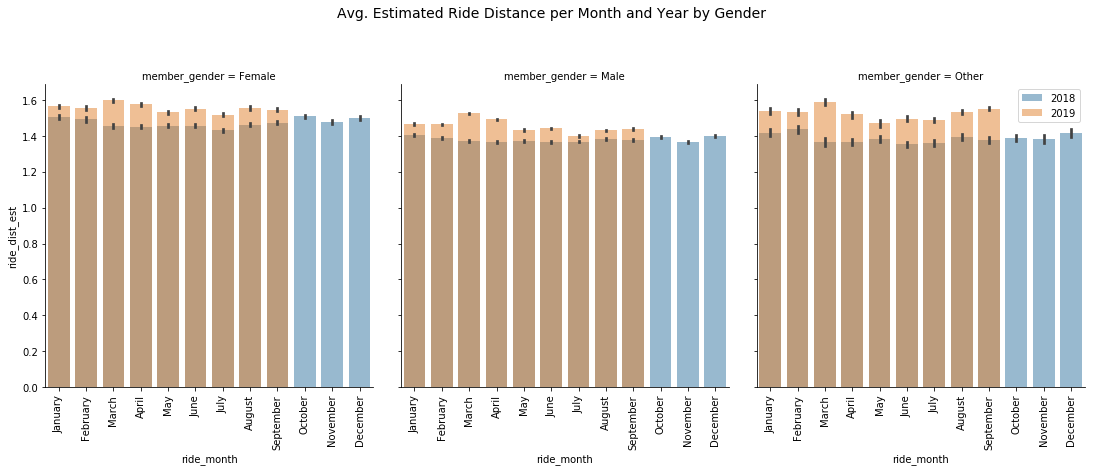

In [201]:
# Next we'll analyze the trend broken down by Gender
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='member_gender', col_wrap = 3, height=6, aspect = 6/7)
g.map(sns.barplot, 'ride_month', 'ride_dist_est', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Avg. Estimated Ride Distance per Month and Year by Gender', size=14);

Year over year average estimated ride distance increased while average ride duration decreased suggesting more use of ebikes and better navigation by riders (perhaps due to better bike paths, increased use of bike navigation apps, and more familiarity with location of bike rental stations etc.).

Year over year, rentals by subscribers and non-subscribing customers has increased for each calendar month prior to May.  In June (at the beginning of the transition to Lyft branded 'Bay Wheels' bikes) subscriber ridership dipped slightly through July, but returned higher than the year prior in August.  In contrast, for non-subscribing customers, ridership increased every single month year over year except for the month of May where it dipped slightly compared to the year prior.

With the exception of June, it looks like total ridership has increased year over year between 2018 to 2019 for each calendar month and service area, especially in San Francisco and the East Bay.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!